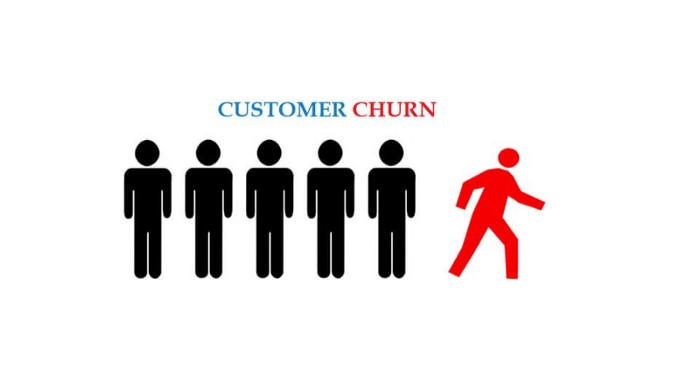

<b> Telecom Churn Case Study </b>

<b>Author:</b> Binoy George & Rama Mishra

<div class="alert alert-block alert-info">

# Assignment Summary:
    
## Problem Statement:-
In the telecom industry, customers are able to choose from multiple service providers and actively switch from one operator to another. In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition.

 

For many incumbent operators, retaining high profitable customers is the number one business goal.

 

**Buisness Objective:-** To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

 

**Our Objective:-** In this project, we will analyse customer-level data of a leading telecom firm, build predictive models to identify customers at high risk of churn and identify the main indicators of churn.
    
  
    
</div>

<div class="alert alert-block alert-success">

### The steps are broadly:
1. Reading and understanding the data
    - shape(99999 rows and 226 columns), info, describe, duplicate values check
2. Cleaning the data
    - 2.1) Identifying the categorical and numerical variables.
        - 2.1.1) Identifying the categorical variables and treating them.
                - Features whose missing value is higher , drop them
        - 2.1.2) Identifying the important numerical variables which can be imputed with zero.
                - a) recharge amount 
                - b) Minutes of usage - voice calls columns
        - 2.1.3) Identifying the variables having more than 50% missing values and dropping it
    - 2.2) Preprocess data (convert columns to appropriate formats, handle missing values, etc.)
        - 2.2.1) Converting columns to appropriate formats
                - object datatype columns , fill missing values with its mode and convert into date type
        - 2.2.2) Handling missing values of rets of the features 
                - numerical columns are there and missing values are filled with median 
3. Data preparation
    - 3.1) Derive new features
            - total_rech_data_amt_x ,
    - 3.2) Filter high-value customers
    - 3.3) Tag churners and remove attributes of the churn phase
            - 3.3.1) Tag churners
            - 3.3.2) Remove attributes of the churn phase
    - 3.4) Check the columns with unique values and drop such columns
            - drop date columns too
    - 3.5) Feature Engineering (Derive some new feautres from the existing columns)
            - b) Tenure Analysis for Customers

4. Visualization of data
    - correlation
    - 4.1) Univariate Analysis
    - 4.2) Multivariate Analysis
            - Visualising Numerical - Numerical Variables
            - Visualising Numerical - Categorical Variables
    - 4.3) Conducting appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).
            - 4.3.1) Exploring ARPU
            - 4.3.2)Exploring RECHARGES
            - 4.3.3) Exploring MOU
            - 4.3.4) Scatetr Plots
                    - Scatter plot between Total recharge number and Average revenue per use
                    - Scatter plot between Tenure and Average revenue per use
            - 4.3.5) Subplots 
                    - Avg. incoming calls  V/S  Month
                    - Avg. outgoing call  V/S Month
                    - Avg. recharge  V/S Month

5. preparation of data for modelling
    - 5.1) Checking for Outliers and treat them 
            - drop columns whose contain only values as zero 
    - 5.2) Splitting the Data into X & y
    - 5.3) Test-Train Split
    - 5.4)  Feature Scaling
    - 5.5) Looking at Correlations
    - 5.6) Checking for Class imbalance in Train & Test and treating it
            - using SMOTE
6. Modelling
        Model 1: Logistic Regression 
        Model 2: Decision Tree
            - Model 2.1: Decision Tree  (Default Hyperparameters)
            - Model 2.2: Decision Tree  (Hyperparameter Tuning)
        Model 3: Random Forest
            - Model 3.1: Random Forest (Default Hyperparameters)
            - Model 3.2: Random Forest (Hyperparameters Tuning)
7. Final Conclusion
8. Recommendation of strategies to manage customer churn based on our observations.
 
</div>

### Step 1: Reading and understanding the Data

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
# Lets import the required libraries and packages
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Lets Supress unnecessary warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [4]:
# Lets import and read the dataset
telecom = pd.read_csv('telecom_churn_data.csv')
telecom

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
1         7001865778        109             0.0             0.0   
2         7001625959        109             0.0             0.0   
3         7001204172        109             0.0             0.0   
4         7000142493        109             0.0             0.0   
...              ...        ...             ...             ...   
99994     7001548952        109             0.0             0.0   
99995     7000607688        109             0.0             0.0   
99996     7000087541        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   
99998     7001905007        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0            6/30/2014            7/31/2014   
1                 0.0            6/30/2014            7/31/2014   
2                 0.0            6/30/2014            7/31/2014   
3                 0.0            6/30/2014            7/31/2014   
4                 0.0            6/30/2014            7/31/2014   
...               ...                  ...                  ...   
99994             0.0            6/30/2014            7/31/2014   
99995             0.0            6/30/2014            7/31/2014   
99996             0.0            6/30/2014            7/31/2014   
99997             0.0            6/30/2014            7/31/2014   
99998             0.0            6/30/2014            7/31/2014   

      last_date_of_month_8 last_date_of_month_9   arpu_6   arpu_7   arpu_8  \
0                8/31/2014            9/30/2014  197.385  214.816  213.803   
1                8/31/2014            9/30/2014   34.047  355.074  268.321   
2                8/31/2014            9/30/2014  167.690  189.058  210.226   
3                8/31/2014            9/30/2014  221.338  251.102  508.054   
4                8/31/2014            9/30/2014  261.636  309.876  238.174   
...                    ...                  ...      ...      ...      ...   
99994            8/31/2014            9/30/2014   18.471   69.161   57.530   
99995            8/31/2014            9/30/2014  112.201   77.811   79.081   
99996            8/31/2014            9/30/2014  229.187    0.000    0.000   
99997            8/31/2014            9/30/2014  322.991  303.386  606.817   
99998            8/31/2014            9/30/2014  687.065    0.000    0.000   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.100          NaN          NaN         0.00          NaN   
1       86.285        24.11        78.68         7.68        18.34   
2      290.714        11.54        55.24        37.26        74.81   
3      389.500        99.91        54.39       310.98       241.71   
4      163.426        50.31       149.44        83.89        58.78   
...        ...          ...          ...          ...          ...   
99994   29.950         5.40         3.36         5.91         0.00   
99995  140.835        29.26        18.13        16.06        49.49   
99996    0.000         1.11          NaN          NaN          NaN   
99997  731.010         0.00         0.00         0.00         0.00   
99998    0.000        84.34          NaN          NaN          NaN   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0               NaN           NaN          0.00           NaN            NaN   
1             15.74         99.84        304.76         53.76            0.0   
2            143.33        220.59        208.36        118.91            0.0   
3            123.31        109.01         71.68        113.54            0.0   
4             76.96         91.88        124.26         45.81            0.0   
...             ...           ...           ...           ...            ...   
99994         15.19         54.46         52.79         27.

In [5]:
# Lets see the head of our dataset
telecom.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6   arpu_7   arpu_8   arpu_9  onnet_mou_6  \
0            9/30/2014  197.385  214.816  213.803   21.100          NaN   
1            9/30/2014   34.047  355.074  268.321   86.285        24.11   
2            9/30/2014  167.690  189.058  210.226  290.714        11.54   
3            9/30/2014  221.338  251.102  508.054  389.500        99.91   
4            9/30/2014  261.636  309.876  238.174  163.426        50.31   

   onnet_mou_7  onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  \
0          NaN         0.00          NaN           NaN           NaN   
1        78.68         7.68        18.34         15.74         99.84   
2        55.24        37.26        74.81        143.33        220.59   
3        54.39       310.98       241.71        123.31        109.01   
4       149.44        83.89        58.78         76.96         91.88   

   offnet_mou_8  offnet_mou_9  roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  \
0          0.00           NaN            NaN            NaN           0.00   
1        304.76         53.76            0.0           0.00           0.00   
2        208.36        118.91            0.0           0.00           0.00   
3         71.68        113.54            0.0          54.86          44.38   
4        124.26         45.81            0.0           0.00           0.00   

   roam_ic_mou_9  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  roam_og_mou_9  \
0            NaN            NaN            NaN           0.00            NaN   
1           0.00            0.0           0.00           0.00           0.00   
2          38.49            0.0           0.00           0.00          70.94   
3           0.00            0.0          28.09          39.04           0.00   
4           0.00            0.0           0.00           0.00           0.00   

   loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2t_mou_9  \
0               NaN               NaN              0.00               NaN   
1             23.88             74.56              7.68             18.34   
2              7.19             28.74             13.58             14.39   
3             73.68             34.81             10.61             15.49   
4             50.31            149.44             83.89             58.78   

   loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2m_mou_9  \
0               NaN               NaN              0.00               NaN   
1             11.51             75.94            291.86             53.76   
2             29.34             16.86             38.46             28.16   
3            107.43             83.21             22.46             65.46   
4             67.64             91.88            124.26             37.89   

   loc_og_t2f_mou_6  loc_og_t2f_mou_7  loc_og_t2f_mou_8  loc_og_t2f_mou_9  \
0               NaN               NaN              0.00               NaN   
1              0.00              0.00              0.00              0.00   
2             24.11             21.79             15.61             22.24   
3              1.91              0.65              

In [6]:
# Lets check the info to see the types of the feature variables and the null values present
telecom.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
mobile_number               int64
circle_id                   int64
loc_og_t2o_mou              float64
std_og_t2o_mou              float64
loc_ic_t2o_mou              float64
last_date_of_month_6        object
last_date_of_month_7        object
last_date_of_month_8        object
last_date_of_month_9        object
arpu_6                      float64
arpu_7                      float64
arpu_8                      float64
arpu_9                      float64
onnet_mou_6                 float64
onnet_mou_7                 float64
onnet_mou_8                 float64
onnet_mou_9                 float64
offnet_mou_6                float64
offnet_mou_7                float64
offnet_mou_8                float64
offnet_mou_9                float64
roam_ic_mou_6               float64
roam_ic_mou_7               float64
roam_ic_mou_8               float64
roam_ic_mou_9               float6

<div class="alert alert-block alert-info">   

#### Inference:- There are 99999 rows and 226 columns in the data. Lot of the columns are numeric type, but we need to inspect which are the categorical columns.
</div>

In [7]:
# Lets check the summary of the dataset
telecom.describe(include='all')

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
count    9.999900e+04    99999.0         98981.0         98981.0   
unique            NaN        NaN             NaN             NaN   
top               NaN        NaN             NaN             NaN   
freq              NaN        NaN             NaN             NaN   
mean     7.001207e+09      109.0             0.0             0.0   
std      6.956694e+05        0.0             0.0             0.0   
min      7.000000e+09      109.0             0.0             0.0   
25%      7.000606e+09      109.0             0.0             0.0   
50%      7.001205e+09      109.0             0.0             0.0   
75%      7.001812e+09      109.0             0.0             0.0   
max      7.002411e+09      109.0             0.0             0.0   

        loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
count          98981.0                99999                99398   
unique             NaN                    1                    1   
top                NaN            6/30/2014            7/31/2014   
freq               NaN                99999                99398   
mean               0.0                  NaN                  NaN   
std                0.0                  NaN                  NaN   
min                0.0                  NaN                  NaN   
25%                0.0                  NaN                  NaN   
50%                0.0                  NaN                  NaN   
75%                0.0                  NaN                  NaN   
max                0.0                  NaN                  NaN   

       last_date_of_month_8 last_date_of_month_9        arpu_6        arpu_7  \
count                 98899                98340  99999.000000  99999.000000   
unique                    1                    1           NaN           NaN   
top               8/31/2014            9/30/2014           NaN           NaN   
freq                  98899                98340           NaN           NaN   
mean                    NaN                  NaN    282.987358    278.536648   
std                     NaN                  NaN    328.439770    338.156291   
min                     NaN                  NaN  -2258.709000  -2014.045000   
25%                     NaN                  NaN     93.411500     86.980500   
50%                     NaN                  NaN    197.704000    191.640000   
75%                     NaN                  NaN    371.060000    365.344500   
max                     NaN                  NaN  27731.088000  35145.834000   

              arpu_8        arpu_9   onnet_mou_6   onnet_mou_7   onnet_mou_8  \
count   99999.000000  99999.000000  96062.000000  96140.000000  94621.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      279.154731    261.645069    132.395875    133.670805    133.018098   
std       344.474791    341.998630    297.207406    308.794148    308.951589   
min      -945.808000  -1899.505000      0.000000      0.000000      0.000000   
25%        84.126000     62.685000      7.380000      6.660000      6.460000   
50%       192.080000    176.849000     34.310000     32.330000     32.360000   
75%       369.370500    353.466500    118.740000    115.595000    115.860000   
max     33543.624000  38805.617000   7376.710000   8157.780000  10752.560000   

         onnet_mou_9  offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  \
count   92254.000000  96062.000000  96140.000000  94621.000000  92254.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean      130.302327    197.935577    197.045133    

#### Now lets check if the dataset has any duplicates.

In [8]:
# checking duplicates
sum(telecom.duplicated(subset = 'mobile_number')) == 0

True

In [9]:
# Lets check the dimensions of the dataset
telecom.shape

(99999, 226)

In [10]:
telecom.drop_duplicates()
telecom.shape

(99999, 226)

<div class="alert alert-block alert-info">   

#### Inference:- No duplicate values
</div>

### Step 2: Cleaning the data

In [11]:
# Lets check the null values present in the dataset
print(round(100*(telecom.isnull().sum()/len(telecom.index)), 2).sort_values(ascending = False))

count_rech_2g_6             74.85
date_of_last_rech_data_6    74.85
count_rech_3g_6             74.85
av_rech_amt_data_6          74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
arpu_3g_6                   74.85
arpu_2g_6                   74.85
night_pck_user_6            74.85
fb_user_6                   74.85
arpu_3g_7                   74.43
count_rech_2g_7             74.43
fb_user_7                   74.43
count_rech_3g_7             74.43
arpu_2g_7                   74.43
av_rech_amt_data_7          74.43
max_rech_data_7             74.43
night_pck_user_7            74.43
total_rech_data_7           74.43
date_of_last_rech_data_7    74.43
night_pck_user_9            74.08
date_of_last_rech_data_9    74.08
fb_user_9                   74.08
arpu_2g_9                   74.08
max_rech_data_9             74.08
arpu_3g_9                   74.08
total_rech_data_9           74.08
av_rech_amt_data_9          74.08
count_rech_3g_9             74.08
count_rech_2g_

In [12]:
# Identifying if any column exists with only null values
telecom.isnull().all(axis=0).any()

False

In [13]:
# Lets again check the dimensions of the dataset
telecom.shape

(99999, 226)

### 2.1) Identifying the categorical and numerical variables.¶

In [14]:
# create column name list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6',
             'last_date_of_month_7',
             'last_date_of_month_8',
             'last_date_of_month_9',
             'date_of_last_rech_6',
             'date_of_last_rech_7',
             'date_of_last_rech_8',
             'date_of_last_rech_9',
             'date_of_last_rech_data_6',
             'date_of_last_rech_data_7',
             'date_of_last_rech_data_8',
             'date_of_last_rech_data_9'
            ]

cat_cols =  ['night_pck_user_6',
             'night_pck_user_7',
             'night_pck_user_8',
             'night_pck_user_9',
             'fb_user_6',
             'fb_user_7',
             'fb_user_8',
             'fb_user_9'
            ]

num_cols = [column for column in telecom.columns if column not in id_cols + date_cols + cat_cols]

# print the number of columns in each list
print("#ID cols: %d\n#Date cols:%d\n#Numeric cols:%d\n#Category cols:%d" % (len(id_cols), len(date_cols), len(num_cols), len(cat_cols)))

# check if we have missed any column or not
print(len(id_cols) + len(date_cols) + len(num_cols) + len(cat_cols) == telecom.shape[1])

#ID cols: 2
#Date cols:12
#Numeric cols:204
#Category cols:8
True


### 2.1.1) Identifying the categorical variables and treating them.¶

In [15]:
for i in telecom.columns:
    if telecom[i].nunique() == 2:
        print("\nColumn",i,"is a categorical variable, since it has", telecom[i].nunique(),"unique value")
        #print("Dropping the column",i)
        #telecom_hv_cust.drop(i,axis=1,inplace = True)

# Lets again check the dimensions of the dataset        
#print("\nDimension of the updated dataset:",telecom_hv_cust.shape)


Column night_pck_user_6 is a categorical variable, since it has 2 unique value

Column night_pck_user_7 is a categorical variable, since it has 2 unique value

Column night_pck_user_8 is a categorical variable, since it has 2 unique value

Column night_pck_user_9 is a categorical variable, since it has 2 unique value

Column fb_user_6 is a categorical variable, since it has 2 unique value

Column fb_user_7 is a categorical variable, since it has 2 unique value

Column fb_user_8 is a categorical variable, since it has 2 unique value

Column fb_user_9 is a categorical variable, since it has 2 unique value


In [16]:
# Lets check the missing values in percentage
(telecom[cat_cols].isnull().sum()*100/telecom[cat_cols].shape[0]).sort_values(ascending = False)

fb_user_6           74.846748
night_pck_user_6    74.846748
fb_user_7           74.428744
night_pck_user_7    74.428744
fb_user_9           74.077741
night_pck_user_9    74.077741
fb_user_8           73.660737
night_pck_user_8    73.660737
dtype: float64

In [17]:
# Lets check the mode
telecom[cat_cols].mode()

night_pck_user_6  night_pck_user_7  night_pck_user_8  night_pck_user_9  \
0               0.0               0.0               0.0               0.0   

   fb_user_6  fb_user_7  fb_user_8  fb_user_9  
0        1.0        1.0        1.0        1.0

<div class="alert alert-block alert-info">   

#### Inference:- We will delete the categorical variables, as it is having high missing values in it.
</div>

In [18]:
#telecom.drop(telecom[cat_cols])
telecom.drop(cat_cols, axis=1, inplace=True)
telecom.shape

(99999, 218)

### 2.1.2) Identifying the important numerical variables which can be imputed with zero.

### a) Recharge columns

In [19]:
# Let us first extract list of columns containing recharge amount, recharge data
rech_cols =  telecom.columns[telecom.columns.str.contains('rech_amt|rech_data')]
rech_cols

Index(['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8',
       'total_rech_amt_9', 'max_rech_amt_6', 'max_rech_amt_7',
       'max_rech_amt_8', 'max_rech_amt_9', 'date_of_last_rech_data_6',
       'date_of_last_rech_data_7', 'date_of_last_rech_data_8',
       'date_of_last_rech_data_9', 'total_rech_data_6', 'total_rech_data_7',
       'total_rech_data_8', 'total_rech_data_9', 'max_rech_data_6',
       'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
       'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8',
       'av_rech_amt_data_9'],
      dtype='object')

In [20]:
# lets check the null values present in the rech_cols
round(100*(telecom[rech_cols].isnull().sum()/len(telecom[rech_cols].index)), 2).sort_values(
                                                                    ascending =False)

av_rech_amt_data_6          74.85
date_of_last_rech_data_6    74.85
max_rech_data_6             74.85
total_rech_data_6           74.85
total_rech_data_7           74.43
av_rech_amt_data_7          74.43
date_of_last_rech_data_7    74.43
max_rech_data_7             74.43
av_rech_amt_data_9          74.08
date_of_last_rech_data_9    74.08
total_rech_data_9           74.08
max_rech_data_9             74.08
total_rech_data_8           73.66
av_rech_amt_data_8          73.66
date_of_last_rech_data_8    73.66
max_rech_data_8             73.66
max_rech_amt_9               0.00
max_rech_amt_8               0.00
max_rech_amt_7               0.00
max_rech_amt_6               0.00
total_rech_amt_9             0.00
total_rech_amt_8             0.00
total_rech_amt_7             0.00
total_rech_amt_6             0.00
dtype: float64

In [21]:
# create a list of recharge columns where we will impute missing values with zeroes

zero_impute = ['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
            'max_rech_data_6','max_rech_data_7','max_rech_data_8','max_rech_data_9',
            'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9']        

In [22]:
telecom[zero_impute].describe()

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170       126.393392       126.729459       125.717301   
std             2.516339       108.477235       109.765267       109.437851   
min             1.000000         1.000000         1.000000         1.000000   
25%             1.000000        25.000000        25.000000        25.000000   
50%             2.000000       145.000000       145.000000       145.000000   
75%             3.000000       177.000000       177.000000       179.000000   
max            84.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count      25922.00000        25153.000000        25571.000000   
mean         124.94144          192.600982          200.981292   
std          111.36376          192.646318          196.791224   
min            1.00000            1.000000            0.500000   
25%           25.00000           82.000000           92.000000   
50%          145.00000          154.000000          154.000000   
75%          179.00000          252.000000          252.000000   
max         1555.00000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  
count        26339.000000        25922.000000  
mean           197.526489          192.734315  
std            191.301305          188.400286  
min              0.500000            1.000000  
25%             87.000000           69.000000  
50%            154.000000          164.000000  
75%            252.000000          252.000000  
max           4076.000000         4061.000000

<div class="alert alert-block alert-info">   

#### Inference: In the recharge variables where minumum value is 1, we can impute missing values with zeroes since it means customer didn't recharge their number that month.

In [23]:
# Lets check the missing values in percentage

print("Missing value ratio:\n")
(telecom[zero_impute].isnull().sum()*100/len(telecom)).sort_values(ascending = False)

Missing value ratio:



av_rech_amt_data_6    74.846748
max_rech_data_6       74.846748
total_rech_data_6     74.846748
av_rech_amt_data_7    74.428744
max_rech_data_7       74.428744
total_rech_data_7     74.428744
av_rech_amt_data_9    74.077741
max_rech_data_9       74.077741
total_rech_data_9     74.077741
av_rech_amt_data_8    73.660737
max_rech_data_8       73.660737
total_rech_data_8     73.660737
dtype: float64

In [24]:
#impute missing values with 0

telecom[zero_impute] = telecom[zero_impute].apply(lambda x: x.fillna(0))

In [25]:
# now, let's make sure values are imputed correctly

print("Missing value ratio:\n")
print(telecom[zero_impute].isnull().sum()*100/len(telecom.shape))

# summary
print("\n\nSummary statistics\n")
print(telecom[zero_impute].describe(include='all'))

Missing value ratio:

total_rech_data_6     0.0
total_rech_data_7     0.0
total_rech_data_8     0.0
total_rech_data_9     0.0
max_rech_data_6       0.0
max_rech_data_7       0.0
max_rech_data_8       0.0
max_rech_data_9       0.0
av_rech_amt_data_6    0.0
av_rech_amt_data_7    0.0
av_rech_amt_data_8    0.0
av_rech_amt_data_9    0.0
dtype: float64


Summary statistics

       total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       99999.000000       99999.000000       99999.000000   
mean            0.619726           0.681837           0.698517   
std             1.760541           1.924382           1.963417   
min             0.000000           0.000000           0.000000   
25%             0.000000           0.000000           0.000000   
50%             0.000000           0.000000           0.000000   
75%             1.000000           1.000000           1.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  max_rech

In [26]:
# Lets again check the dimensions of the dataset
telecom.shape

(99999, 218)

In [27]:
# lets check the null values present in the dataset
(telecom.isnull().sum()*100/len(telecom)).sort_values(ascending = False)    

count_rech_3g_6             74.846748
count_rech_2g_6             74.846748
arpu_2g_6                   74.846748
arpu_3g_6                   74.846748
date_of_last_rech_data_6    74.846748
date_of_last_rech_data_7    74.428744
arpu_2g_7                   74.428744
arpu_3g_7                   74.428744
count_rech_2g_7             74.428744
count_rech_3g_7             74.428744
arpu_2g_9                   74.077741
arpu_3g_9                   74.077741
count_rech_3g_9             74.077741
count_rech_2g_9             74.077741
date_of_last_rech_data_9    74.077741
date_of_last_rech_data_8    73.660737
arpu_3g_8                   73.660737
count_rech_3g_8             73.660737
arpu_2g_8                   73.660737
count_rech_2g_8             73.660737
std_ic_t2o_mou_9             7.745077
std_ic_t2m_mou_9             7.745077
std_ic_t2f_mou_9             7.745077
loc_og_t2t_mou_9             7.745077
std_ic_mou_9                 7.745077
std_og_t2m_mou_9             7.745077
loc_og_t2m_m

### b) Minutes of usage - voice calls columns

In [28]:
# create a list of mou columns where we will impute missing values with zeroes

mou_cols = telecom.columns[telecom.columns.str.contains('mou')]
mou_cols

Index(['loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'onnet_mou_9', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8',
       ...
       'total_ic_mou_8', 'total_ic_mou_9', 'spl_ic_mou_6', 'spl_ic_mou_7',
       'spl_ic_mou_8', 'spl_ic_mou_9', 'isd_ic_mou_6', 'isd_ic_mou_7',
       'isd_ic_mou_8', 'isd_ic_mou_9'],
      dtype='object', length=119)

In [29]:
# Lets check the missing values in percentage

print("Missing value ratio:\n")
(telecom[mou_cols].isnull().sum()*100/len(telecom)).sort_values(ascending = False)    

Missing value ratio:



isd_ic_mou_9        7.745077
loc_og_t2c_mou_9    7.745077
loc_og_t2t_mou_9    7.745077
std_ic_t2t_mou_9    7.745077
loc_og_t2m_mou_9    7.745077
loc_ic_mou_9        7.745077
loc_ic_t2f_mou_9    7.745077
loc_og_t2f_mou_9    7.745077
loc_ic_t2m_mou_9    7.745077
loc_ic_t2t_mou_9    7.745077
std_ic_t2f_mou_9    7.745077
loc_og_mou_9        7.745077
std_og_t2t_mou_9    7.745077
spl_og_mou_9        7.745077
isd_og_mou_9        7.745077
std_og_t2m_mou_9    7.745077
std_og_mou_9        7.745077
std_og_t2c_mou_9    7.745077
std_ic_t2m_mou_9    7.745077
std_og_t2f_mou_9    7.745077
roam_og_mou_9       7.745077
roam_ic_mou_9       7.745077
offnet_mou_9        7.745077
std_ic_mou_9        7.745077
spl_ic_mou_9        7.745077
std_ic_t2o_mou_9    7.745077
onnet_mou_9         7.745077
loc_ic_t2t_mou_8    5.378054
loc_og_mou_8        5.378054
offnet_mou_8        5.378054
std_og_t2t_mou_8    5.378054
spl_og_mou_8        5.378054
std_og_t2m_mou_8    5.378054
loc_og_t2c_mou_8    5.378054
spl_ic_mou_8  

<div class="alert alert-block alert-info">   

#### Inference: For all minutes of usage columns the maximum missing % is 7.75 , means in these case the customer has not used at all, that particular call type, thus we can fill the missing values with zero

In [30]:
# replacing missing values by 0 for minutes of usage variables

telecom[mou_cols] = telecom[mou_cols].apply(lambda x: x.fillna(0))

In [31]:
# now, let's make sure values are imputed correctly

print("Missing value ratio:\n")
(telecom[mou_cols].isnull().sum()*100/len(telecom)).sort_values(ascending = False)    

Missing value ratio:



isd_ic_mou_9        0.0
std_og_t2m_mou_6    0.0
loc_og_t2c_mou_6    0.0
loc_og_t2c_mou_7    0.0
loc_og_t2c_mou_8    0.0
loc_og_t2c_mou_9    0.0
loc_og_mou_6        0.0
loc_og_mou_7        0.0
loc_og_mou_8        0.0
loc_og_mou_9        0.0
std_og_t2t_mou_6    0.0
std_og_t2t_mou_7    0.0
std_og_t2t_mou_8    0.0
std_og_t2t_mou_9    0.0
std_og_t2m_mou_7    0.0
loc_og_t2f_mou_8    0.0
std_og_t2m_mou_8    0.0
std_og_t2m_mou_9    0.0
std_og_t2f_mou_6    0.0
std_og_t2f_mou_7    0.0
std_og_t2f_mou_8    0.0
std_og_t2f_mou_9    0.0
std_og_t2c_mou_6    0.0
std_og_t2c_mou_7    0.0
std_og_t2c_mou_8    0.0
std_og_t2c_mou_9    0.0
std_og_mou_6        0.0
std_og_mou_7        0.0
loc_og_t2f_mou_9    0.0
loc_og_t2f_mou_7    0.0
std_og_mou_9        0.0
roam_ic_mou_8       0.0
std_og_t2o_mou      0.0
loc_ic_t2o_mou      0.0
onnet_mou_6         0.0
onnet_mou_7         0.0
onnet_mou_8         0.0
onnet_mou_9         0.0
offnet_mou_6        0.0
offnet_mou_7        0.0
offnet_mou_8        0.0
offnet_mou_9    

In [32]:
# Lets again check the dimensions of the dataset
telecom.shape

(99999, 218)

In [33]:
# lets check the null values present in the dataset
(telecom.isnull().sum()*100/len(telecom)).sort_values(ascending = False) 

arpu_2g_6                   74.846748
arpu_3g_6                   74.846748
count_rech_3g_6             74.846748
date_of_last_rech_data_6    74.846748
count_rech_2g_6             74.846748
arpu_3g_7                   74.428744
arpu_2g_7                   74.428744
count_rech_3g_7             74.428744
date_of_last_rech_data_7    74.428744
count_rech_2g_7             74.428744
count_rech_3g_9             74.077741
date_of_last_rech_data_9    74.077741
count_rech_2g_9             74.077741
arpu_3g_9                   74.077741
arpu_2g_9                   74.077741
arpu_3g_8                   73.660737
count_rech_3g_8             73.660737
date_of_last_rech_data_8    73.660737
arpu_2g_8                   73.660737
count_rech_2g_8             73.660737
ic_others_9                  7.745077
og_others_9                  7.745077
og_others_8                  5.378054
ic_others_8                  5.378054
date_of_last_rech_9          4.760048
og_others_6                  3.937039
ic_others_6 

### 2.1.3) Identifying the variables having more than 50% missing values and dropping it

In [34]:
# we will drop the columns having more than 50% NA values 

telecom= telecom.drop(telecom.loc[:,list(round(100*(telecom.isnull().sum()
                                                             /len(telecom.index)),2)>50)].columns,1)
# Lets again check the dimensions of the dataset
telecom.shape

(99999, 198)

In [35]:
# lets check the null values present in the dataset
(telecom.isnull().sum()*100/len(telecom)).sort_values(ascending = False) 

og_others_9             7.745077
ic_others_9             7.745077
og_others_8             5.378054
ic_others_8             5.378054
date_of_last_rech_9     4.760048
og_others_6             3.937039
ic_others_6             3.937039
ic_others_7             3.859039
og_others_7             3.859039
date_of_last_rech_8     3.622036
date_of_last_rech_7     1.767018
last_date_of_month_9    1.659017
date_of_last_rech_6     1.607016
last_date_of_month_8    1.100011
last_date_of_month_7    0.601006
std_og_t2f_mou_7        0.000000
std_og_t2f_mou_9        0.000000
std_og_t2c_mou_6        0.000000
std_og_t2c_mou_7        0.000000
std_og_t2c_mou_8        0.000000
std_og_t2c_mou_9        0.000000
std_og_t2f_mou_8        0.000000
sep_vbc_3g              0.000000
std_og_t2f_mou_6        0.000000
std_og_t2m_mou_9        0.000000
std_og_mou_7            0.000000
std_og_t2m_mou_8        0.000000
std_og_t2m_mou_7        0.000000
std_og_t2m_mou_6        0.000000
std_og_t2t_mou_9        0.000000
std_og_mou

### 2.2) Preprocess data (convert columns to appropriate formats, handle missing values, etc.)

### 2.2.1) Converting columns to appropriate formats

In [36]:
# lets check for columns that can be changed to integers, floats or date types
date_col_data = telecom.select_dtypes('object').columns
date_col_data = date_col_data.tolist()
date_col_data

['last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'date_of_last_rech_6',
 'date_of_last_rech_7',
 'date_of_last_rech_8',
 'date_of_last_rech_9']

In [37]:
telecom[date_col_data].describe()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
count                 99999                99398                98899   
unique                    1                    1                    1   
top               6/30/2014            7/31/2014            8/31/2014   
freq                  99999                99398                98899   

       last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
count                 98340               98392               98232   
unique                    1                  30                  31   
top               9/30/2014           6/30/2014           7/31/2014   
freq                  98340               16960               17288   

       date_of_last_rech_8 date_of_last_rech_9  
count                96377               95239  
unique                  31                  30  
top              8/31/2014           9/29/2014  
freq                 14706               22623

In [38]:
# lets check the null values present in the object_col_data
print("Missing value ratio:\n")
(telecom[date_col_data].isnull().sum()*100/len(telecom)).sort_values(ascending = False)   

Missing value ratio:



date_of_last_rech_9     4.760048
date_of_last_rech_8     3.622036
date_of_last_rech_7     1.767018
last_date_of_month_9    1.659017
date_of_last_rech_6     1.607016
last_date_of_month_8    1.100011
last_date_of_month_7    0.601006
last_date_of_month_6    0.000000
dtype: float64

<div class="alert alert-block alert-info">   

#### Inference:- The above columns are dates columns, thus we can fill the missing values with mode

In [39]:
for col in date_col_data:
    telecom[col].fillna((telecom[col].mode()[0]), inplace=True)

In [40]:
# now, let's make sure values are imputed correctly

print("Missing value ratio:\n")
(telecom[date_col_data].isnull().sum()*100/len(telecom)).sort_values(ascending = False)   

Missing value ratio:



date_of_last_rech_9     0.0
date_of_last_rech_8     0.0
date_of_last_rech_7     0.0
date_of_last_rech_6     0.0
last_date_of_month_9    0.0
last_date_of_month_8    0.0
last_date_of_month_7    0.0
last_date_of_month_6    0.0
dtype: float64

In [41]:
telecom[date_col_data].describe()

last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
count                 99999                99999                99999   
unique                    1                    1                    1   
top               6/30/2014            7/31/2014            8/31/2014   
freq                  99999                99999                99999   

       last_date_of_month_9 date_of_last_rech_6 date_of_last_rech_7  \
count                 99999               99999               99999   
unique                    1                  30                  31   
top               9/30/2014           6/30/2014           7/31/2014   
freq                  99999               18567               19055   

       date_of_last_rech_8 date_of_last_rech_9  
count                99999               99999  
unique                  31                  30  
top              8/31/2014           9/29/2014  
freq                 18328               27383

<div class="alert alert-block alert-info">  
    
#### Inference: All the above columns can be converted to date type

In [42]:
# converting to datetime format

for col in date_col_data:
    telecom[col] = pd.to_datetime(telecom[col])

telecom.shape 

(99999, 198)

In [43]:
# Again checking the format of the data
telecom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 198 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](8), float64(155), int64(35)
memory usage: 151.1 MB


### 2.2.2) Handling missing values

In [44]:
# lets check the null values present in the dataset
(telecom.isnull().sum()*100/len(telecom)).sort_values(ascending = False) 

ic_others_9             7.745077
og_others_9             7.745077
ic_others_8             5.378054
og_others_8             5.378054
ic_others_6             3.937039
og_others_6             3.937039
og_others_7             3.859039
ic_others_7             3.859039
std_og_t2c_mou_6        0.000000
std_og_mou_8            0.000000
std_og_mou_7            0.000000
std_og_mou_6            0.000000
std_og_t2c_mou_9        0.000000
std_og_t2c_mou_8        0.000000
std_og_t2c_mou_7        0.000000
sep_vbc_3g              0.000000
std_og_t2f_mou_9        0.000000
isd_og_mou_6            0.000000
std_og_t2f_mou_8        0.000000
std_og_t2f_mou_7        0.000000
std_og_t2f_mou_6        0.000000
std_og_t2m_mou_9        0.000000
std_og_t2m_mou_8        0.000000
std_og_t2m_mou_7        0.000000
std_og_t2m_mou_6        0.000000
std_og_t2t_mou_9        0.000000
std_og_mou_9            0.000000
isd_og_mou_8            0.000000
isd_og_mou_7            0.000000
std_og_t2t_mou_7        0.000000
loc_ic_t2f

In [45]:
missing_cols = telecom.columns[telecom.isnull().sum()>0]
missing_cols

Index(['og_others_6', 'og_others_7', 'og_others_8', 'og_others_9',
       'ic_others_6', 'ic_others_7', 'ic_others_8', 'ic_others_9'],
      dtype='object')

In [46]:
telecom[missing_cols].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 8 columns):
og_others_6    96062 non-null float64
og_others_7    96140 non-null float64
og_others_8    94621 non-null float64
og_others_9    92254 non-null float64
ic_others_6    96062 non-null float64
ic_others_7    96140 non-null float64
ic_others_8    94621 non-null float64
ic_others_9    92254 non-null float64
dtypes: float64(8)
memory usage: 6.1 MB


<div class="alert alert-block alert-info">  
    
#### Inference:- The above columns are numerical columns, thus we can fill the missing values with median column value.

In [47]:
missing_cols = telecom.columns[telecom.isnull().sum()>0]
for col in missing_cols:
    telecom[col].fillna((telecom[col].median()), inplace=True)

In [48]:
# lets check the null values present in the dataset
(telecom.isnull().sum()*100/len(telecom)).sort_values(ascending = False)

sep_vbc_3g              0.0
spl_og_mou_6            0.0
isd_og_mou_8            0.0
isd_og_mou_7            0.0
isd_og_mou_6            0.0
std_og_mou_9            0.0
std_og_mou_8            0.0
std_og_mou_7            0.0
std_og_mou_6            0.0
std_og_t2c_mou_9        0.0
std_og_t2c_mou_8        0.0
std_og_t2c_mou_7        0.0
std_og_t2c_mou_6        0.0
std_og_t2f_mou_9        0.0
std_og_t2f_mou_8        0.0
std_og_t2f_mou_7        0.0
std_og_t2f_mou_6        0.0
std_og_t2m_mou_9        0.0
std_og_t2m_mou_8        0.0
std_og_t2m_mou_7        0.0
std_og_t2m_mou_6        0.0
std_og_t2t_mou_9        0.0
std_og_t2t_mou_8        0.0
isd_og_mou_9            0.0
spl_og_mou_7            0.0
std_og_t2t_mou_6        0.0
spl_og_mou_8            0.0
loc_ic_t2f_mou_9        0.0
loc_ic_t2f_mou_8        0.0
loc_ic_t2f_mou_7        0.0
loc_ic_t2f_mou_6        0.0
loc_ic_t2m_mou_9        0.0
loc_ic_t2m_mou_8        0.0
loc_ic_t2m_mou_7        0.0
loc_ic_t2m_mou_6        0.0
loc_ic_t2t_mou_9    

In [49]:
telecom.shape

(99999, 198)

<div class="alert alert-block alert-info">


**In churn prediction, we assume that there are three phases of customer lifecycle :**

- The ‘good’ phase [Month 6 & 7] (the customer is happy with the service)
- The ‘action’ phase [Month 8] (The customer experience starts to sore in this phase, becomes unhappy with service quality etc.)
- The ‘churn’ phase [Month 9] ( In this phase, the customer is said to have churned. )

In this case, since you are working over a four-month window, the first two months are the ‘good’ phase, the third month is the ‘action’ phase, while the fourth month is the ‘churn’ phase.

**Usage-based churn:** Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

A potential shortcoming of this definition is that when the customer has stopped using the services for a while, it may be too late to take any corrective actions to retain them. For e.g., if you define churn based on a ‘two-months zero usage’ period, predicting churn could be useless since by that time the customer would have already switched to another operator.

**High-value Churn:**

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

### Step 3: Data Preparation

### 3.1)  Derive new features

This is one of the most important parts of data preparation since good features are often the differentiators between good and bad models. Using our business understanding to derive features which we think could be important indicators of churn.

#### lets dervie features to extract high value customers
- We can create new feature as **total_rech_data_amt_x** using `total_rech_data_x` and `av_rech_amt_data_x` to capture total amount utilized by customer for data (x represents month here, would be either 6 or 7 or 8).

#### lets find out total amount spent by customers on data recharge,we have two columns available to find out this.

In [50]:
# first column is av_rech_amt_data_x (x represents month here, would be either 6 or 7 or 8)
# second column is total_rech_data_x (x represents month here, would be either 6 or 7 or 8)
# lets introduce a new column total_rech_data_amt_x which can be calculated as av_rech_amt_data_x*total_rech_data_x

telecom['total_rech_data_amt_6'] = telecom['av_rech_amt_data_6'] * telecom['total_rech_data_6']
telecom['total_rech_data_amt_7'] = telecom['av_rech_amt_data_7'] * telecom['total_rech_data_7']
telecom['total_rech_data_amt_8'] = telecom['av_rech_amt_data_8'] * telecom['total_rech_data_8']
telecom['total_rech_data_amt_9'] = telecom['av_rech_amt_data_9'] * telecom['total_rech_data_9']

In [51]:
# now we dont need columns av_rech_amt_data_x,total_rech_data_x (x = 6/7/8) , lets drop them

telecom.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9',
     'av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

### 3.2) Filter high-value customers

#### High valued customers would bring in more revenue and having them churn would be a huge loss to business. Our aim is to identify the high valued customers and try not to make them churn. Let us first identify the high valued customers.

The steps would be :
1. For the first two months calculate the average amount of money spent on recharge.
2. Calcuate the 70 percentile and above that cut-off would be high valued customer.

#### 3.2.1) Defining total average recharge amount for good phase for months 6 and 7 (the good phase)

In [52]:
# lets find out the average recharge done in the first two months(june & july) - the good phase
# total amount spend would be the sum of total data recharge done & total call/sms recharges

telecom_av_rech_6n7 = (telecom['total_rech_amt_6'] + telecom['total_rech_amt_7'] 
                       + telecom['total_rech_data_amt_6']+ telecom['total_rech_data_amt_7'])/2

#### 3.2.2) Define High Value customers as follows: Those who have recharged with an amount more than or equal to X, where X is the 70th percentile of the average recharge amount in the first two months (the good phase).

In [53]:
# create a filter for values greater than 70th percentile of total average recharge amount for good phase 
high_value_filter = np.percentile(telecom_av_rech_6n7, 70.0)
print('70 percentile of 6th and 7th months avg recharge amount: ', high_value_filter)

# fitler the given data set based on 70th percentile
telecom_hv_cust = telecom[telecom_av_rech_6n7 >= high_value_filter]
print('Dataframe Shape after Filtering High Value Customers: ', telecom_hv_cust.shape)

70 percentile of 6th and 7th months avg recharge amount:  478.0
Dataframe Shape after Filtering High Value Customers:  (30001, 194)


<div class="alert alert-block alert-info">

#### Inference: There are 30001 rows and 194 columns for high value customers dataset.

### 3.3) Tag churners and remove attributes of the churn phase

Now tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase. The attributes you need to use to tag churners are:

    total_ic_mou_9

    total_og_mou_9

    vol_2g_mb_9

    vol_3g_mb_9


After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

### 3.3.1) Tag churners

In [54]:
# lets introduce a new column "churn", values would be either 1 (churn) or 0 (non-churn)
# we will calculate churn/non-churn based on the usage as mentioned in the problem statement

telecom_hv_cust['churn'] = np.where(telecom_hv_cust[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
telecom_hv_cust

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
21        7002124215        109             0.0             0.0   
23        7000887461        109             0.0             0.0   
...              ...        ...             ...             ...   
99981     7000630859        109             0.0             0.0   
99984     7000661676        109             0.0             0.0   
99986     7001729035        109             0.0             0.0   
99988     7002111859        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0           2014-06-30           2014-07-31   
7                 0.0           2014-06-30           2014-07-31   
8                 0.0           2014-06-30           2014-07-31   
21                0.0           2014-06-30           2014-07-31   
23                0.0           2014-06-30           2014-07-31   
...               ...                  ...                  ...   
99981             0.0           2014-06-30           2014-07-31   
99984             0.0           2014-06-30           2014-07-31   
99986             0.0           2014-06-30           2014-07-31   
99988             0.0           2014-06-30           2014-07-31   
99997             0.0           2014-06-30           2014-07-31   

      last_date_of_month_8 last_date_of_month_9    arpu_6    arpu_7    arpu_8  \
0               2014-08-31           2014-09-30   197.385   214.816   213.803   
7               2014-08-31           2014-09-30  1069.180  1349.850  3171.480   
8               2014-08-31           2014-09-30   378.721   492.223   137.362   
21              2014-08-31           2014-09-30   514.453   597.753   637.760   
23              2014-08-31           2014-09-30    74.350   193.897   366.966   
...                    ...                  ...       ...       ...       ...   
99981           2014-08-31           2014-09-30   384.316   255.405   393.474   
99984           2014-08-31           2014-09-30   328.594   202.966   118.707   
99986           2014-08-31           2014-09-30   644.973   455.228   564.334   
99988           2014-08-31           2014-09-30   312.558   512.932   402.080   
99997           2014-08-31           2014-09-30   322.991   303.386   606.817   

        arpu_9  onnet_mou_6  onnet_mou_7  onnet_mou_8  onnet_mou_9  \
0       21.100         0.00         0.00         0.00         0.00   
7      500.000        57.84        54.68        52.29         0.00   
8      166.787       413.69       351.03        35.08        33.46   
21     578.596       102.41       132.11        85.14       161.63   
23     811.480        48.96        50.66        33.58        15.74   
...        ...          ...          ...          ...          ...   
99981   94.080        78.68        29.04       103.24        34.38   
99984  324.143       423.99       181.83         5.71         5.03   
99986  267.451       806.73       549.36       775.41       692.63   
99988  533.502       199.89       174.46         2.46         7.16   
99997  731.010         0.00         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  offnet_mou_9  roam_ic_mou_6  \
0              0.00          0.00          0.00          0.00           0.00   
7            453.43        567.16        325.91          0.00          16.23   
8             94.66         80.63        136.48        108.71           0.00   
21           757.93        896.68        983.39        869.89           0.00   
23            85.41         89.36        205.89        111.88           0.00   
...             ...           ...           ...           ...            ...   
99981         56.13    

In [55]:
# lets find out churn/non churn percentage
telecom_hv_cust['churn'].value_counts()/len(telecom_hv_cust)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

<div class="alert alert-block alert-info">   

#### Inference: 92% of the customers are not churn and only 8% of the customers are churn, this is a case of class imbalance, we will treat it later.

### 3.3.2) Remove attributes of the churn phase

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names)

In [56]:
# Now we will delete 9th month columns because we would predict churn/non-churn later based on data from the 1st 
# 3 months

churn_month_columns = [col for col in telecom_hv_cust.columns if '_9' in col]
print(churn_month_columns)
print()
print(len(churn_month_columns))

telecom_hv_cust.shape

['last_date_of_month_9', 'arpu_9', 'onnet_mou_9', 'offnet_mou_9', 'roam_ic_mou_9', 'roam_og_mou_9', 'loc_og_t2t_mou_9', 'loc_og_t2m_mou_9', 'loc_og_t2f_mou_9', 'loc_og_t2c_mou_9', 'loc_og_mou_9', 'std_og_t2t_mou_9', 'std_og_t2m_mou_9', 'std_og_t2f_mou_9', 'std_og_t2c_mou_9', 'std_og_mou_9', 'isd_og_mou_9', 'spl_og_mou_9', 'og_others_9', 'total_og_mou_9', 'loc_ic_t2t_mou_9', 'loc_ic_t2m_mou_9', 'loc_ic_t2f_mou_9', 'loc_ic_mou_9', 'std_ic_t2t_mou_9', 'std_ic_t2m_mou_9', 'std_ic_t2f_mou_9', 'std_ic_t2o_mou_9', 'std_ic_mou_9', 'total_ic_mou_9', 'spl_ic_mou_9', 'isd_ic_mou_9', 'ic_others_9', 'total_rech_num_9', 'total_rech_amt_9', 'max_rech_amt_9', 'date_of_last_rech_9', 'last_day_rch_amt_9', 'max_rech_data_9', 'vol_2g_mb_9', 'vol_3g_mb_9', 'monthly_2g_9', 'sachet_2g_9', 'monthly_3g_9', 'sachet_3g_9', 'total_rech_data_amt_9']

46


(30001, 195)

In [57]:
# drop all columns corresponding to the churn phase
telecom_hv_cust.drop(churn_month_columns,axis=1,inplace=True)
telecom_hv_cust.drop('sep_vbc_3g',axis=1,inplace=True)

telecom_hv_cust.shape

(30001, 148)

<div class="alert alert-block alert-info">

#### Inference: There are 30001 rows and 148 columns for high value customers dataset.

In [58]:
telecom_hv_cust

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  \
0         7000842753        109             0.0             0.0   
7         7000701601        109             0.0             0.0   
8         7001524846        109             0.0             0.0   
21        7002124215        109             0.0             0.0   
23        7000887461        109             0.0             0.0   
...              ...        ...             ...             ...   
99981     7000630859        109             0.0             0.0   
99984     7000661676        109             0.0             0.0   
99986     7001729035        109             0.0             0.0   
99988     7002111859        109             0.0             0.0   
99997     7000498689        109             0.0             0.0   

       loc_ic_t2o_mou last_date_of_month_6 last_date_of_month_7  \
0                 0.0           2014-06-30           2014-07-31   
7                 0.0           2014-06-30           2014-07-31   
8                 0.0           2014-06-30           2014-07-31   
21                0.0           2014-06-30           2014-07-31   
23                0.0           2014-06-30           2014-07-31   
...               ...                  ...                  ...   
99981             0.0           2014-06-30           2014-07-31   
99984             0.0           2014-06-30           2014-07-31   
99986             0.0           2014-06-30           2014-07-31   
99988             0.0           2014-06-30           2014-07-31   
99997             0.0           2014-06-30           2014-07-31   

      last_date_of_month_8    arpu_6    arpu_7    arpu_8  onnet_mou_6  \
0               2014-08-31   197.385   214.816   213.803         0.00   
7               2014-08-31  1069.180  1349.850  3171.480        57.84   
8               2014-08-31   378.721   492.223   137.362       413.69   
21              2014-08-31   514.453   597.753   637.760       102.41   
23              2014-08-31    74.350   193.897   366.966        48.96   
...                    ...       ...       ...       ...          ...   
99981           2014-08-31   384.316   255.405   393.474        78.68   
99984           2014-08-31   328.594   202.966   118.707       423.99   
99986           2014-08-31   644.973   455.228   564.334       806.73   
99988           2014-08-31   312.558   512.932   402.080       199.89   
99997           2014-08-31   322.991   303.386   606.817         0.00   

       onnet_mou_7  onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
0             0.00         0.00          0.00          0.00          0.00   
7            54.68        52.29        453.43        567.16        325.91   
8           351.03        35.08         94.66         80.63        136.48   
21          132.11        85.14        757.93        896.68        983.39   
23           50.66        33.58         85.41         89.36        205.89   
...            ...          ...           ...           ...           ...   
99981        29.04       103.24         56.13         28.09         61.44   
99984       181.83         5.71         39.51         39.81         18.26   
99986       549.36       775.41        784.76        617.13        595.44   
99988       174.46         2.46        175.88        277.01        248.33   
99997         0.00         0.00          0.00          0.00          0.00   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
0               0.00           0.00           0.00           0.00   
7              16.23          33.49          31.64          23.74   
8               0.00           0.00           0.00           0.00   
21              0.00           0.00           0.00           0.00   
23              0.00           0.00           0.00           0.00   
...              ...            ...            ...            ...   
99981           0.00           0.00           0.00           0.00   
99984           0.00           0.00        

### 3.4) Check the columns with unique values and drop such columns

In [59]:
# lets check the columns with no variance in their values and drop such columns
for i in telecom_hv_cust.columns:
    if telecom_hv_cust[i].nunique() == 1:
        print("\nColumn",i,"has no variance and contains only", telecom_hv_cust[i].nunique(),"unique value")
        print("Dropping the column",i)
        telecom_hv_cust.drop(i,axis=1,inplace = True)

# Lets again check the dimensions of the dataset        
print("\nDimension of the updated dataset:",telecom_hv_cust.shape)


Column circle_id has no variance and contains only 1 unique value
Dropping the column circle_id

Column loc_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_og_t2o_mou

Column std_og_t2o_mou has no variance and contains only 1 unique value
Dropping the column std_og_t2o_mou

Column loc_ic_t2o_mou has no variance and contains only 1 unique value
Dropping the column loc_ic_t2o_mou

Column last_date_of_month_6 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_6

Column last_date_of_month_7 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_7

Column last_date_of_month_8 has no variance and contains only 1 unique value
Dropping the column last_date_of_month_8

Column std_og_t2c_mou_6 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_mou_6

Column std_og_t2c_mou_7 has no variance and contains only 1 unique value
Dropping the column std_og_t2c_mou_7

Co

<div class="alert alert-block alert-info">  
    
#### Inference:- Dropping above features with only **one unique** value as they will not add any value to our model building and analyis

In [60]:
# lets check the dataset again
(telecom_hv_cust.isnull().sum() * 100 / len(telecom_hv_cust)).sort_values(ascending = False)

churn                    0.0
og_others_6              0.0
std_og_t2m_mou_7         0.0
std_og_t2m_mou_8         0.0
std_og_t2f_mou_6         0.0
std_og_t2f_mou_7         0.0
std_og_t2f_mou_8         0.0
std_og_mou_6             0.0
std_og_mou_7             0.0
std_og_mou_8             0.0
isd_og_mou_6             0.0
isd_og_mou_7             0.0
isd_og_mou_8             0.0
spl_og_mou_6             0.0
spl_og_mou_7             0.0
spl_og_mou_8             0.0
og_others_7              0.0
std_og_t2t_mou_8         0.0
og_others_8              0.0
total_og_mou_6           0.0
total_og_mou_7           0.0
total_og_mou_8           0.0
loc_ic_t2t_mou_6         0.0
loc_ic_t2t_mou_7         0.0
loc_ic_t2t_mou_8         0.0
loc_ic_t2m_mou_6         0.0
loc_ic_t2m_mou_7         0.0
loc_ic_t2m_mou_8         0.0
loc_ic_t2f_mou_6         0.0
loc_ic_t2f_mou_7         0.0
loc_ic_t2f_mou_8         0.0
loc_ic_mou_6             0.0
std_og_t2m_mou_6         0.0
std_og_t2t_mou_7         0.0
loc_ic_mou_8  

In [61]:
telecom_hv_cust.shape

(30001, 135)

In [62]:
telecom_hv_cust.drop(telecom_hv_cust.filter(regex='date_').columns,axis=1,inplace=True)

print (telecom_hv_cust.shape)

(30001, 132)


In [63]:
telecom_hv_cust.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7',
       'offnet_mou_8',
       ...
       'sachet_3g_7', 'sachet_3g_8', 'aon', 'aug_vbc_3g', 'jul_vbc_3g',
       'jun_vbc_3g', 'total_rech_data_amt_6', 'total_rech_data_amt_7',
       'total_rech_data_amt_8', 'churn'],
      dtype='object', length=132)

<div class="alert alert-block alert-info">


### 3.5) Feature Engineering (Derive some new feautres from the existing columns)

- The AON variable was used to create tenure buckets. It was observed larger the tenure, lesser was the churn - as customers who are newly acquired to the network churned more as compared to the old customers.


In [64]:
telecom_hv_cust

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0         7000842753   197.385   214.816   213.803         0.00         0.00   
7         7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8         7001524846   378.721   492.223   137.362       413.69       351.03   
21        7002124215   514.453   597.753   637.760       102.41       132.11   
23        7000887461    74.350   193.897   366.966        48.96        50.66   
...              ...       ...       ...       ...          ...          ...   
99981     7000630859   384.316   255.405   393.474        78.68        29.04   
99984     7000661676   328.594   202.966   118.707       423.99       181.83   
99986     7001729035   644.973   455.228   564.334       806.73       549.36   
99988     7002111859   312.558   512.932   402.080       199.89       174.46   
99997     7000498689   322.991   303.386   606.817         0.00         0.00   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0             0.00          0.00          0.00          0.00           0.00   
7            52.29        453.43        567.16        325.91          16.23   
8            35.08         94.66         80.63        136.48           0.00   
21           85.14        757.93        896.68        983.39           0.00   
23           33.58         85.41         89.36        205.89           0.00   
...            ...           ...           ...           ...            ...   
99981       103.24         56.13         28.09         61.44           0.00   
99984         5.71         39.51         39.81         18.26           0.00   
99986       775.41        784.76        617.13        595.44           0.00   
99988         2.46        175.88        277.01        248.33           0.00   
99997         0.00          0.00          0.00          0.00           0.00   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0               0.00           0.00           0.00           0.00   
7              33.49          31.64          23.74          12.59   
8               0.00           0.00           0.00           0.00   
21              0.00           0.00           0.00           0.00   
23              0.00           0.00           0.00           0.00   
...              ...            ...            ...            ...   
99981           0.00           0.00           0.00           0.00   
99984           0.00           0.00           0.00           0.00   
99986           0.00           0.00           0.00           0.00   
99988           0.00           0.00           0.00           0.00   
99997           0.00           0.00           0.00           0.00   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0               0.00              0.00              0.00              0.00   
7              38.06             51.39             31.38             40.28   
8               0.00            297.13            217.59             12.49   
21              0.00              4.48              6.16             23.34   
23              0.00             48.96             50.66             33.58   
...              ...               ...               ...               ...   
99981           0.00             72.53             29.04             89.23   
99984           0.00            423.99            181.83              5.71   
99986           0.00            709.21            496.14            718.56   
99988           0.00            170.28            146.48              2.46   
99997           0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0                  0.00              0.00              0.00              0.00   
7                308.63            447.38            162.28             62.13   
8                 80.96             70.58             50.54              0.00   
21     

### Tenure Analysis for Customers

aon --> Age on network - number of days the customer is using the operator T network

In [65]:
# lets now convert AON in months

telecom_hv_cust['Tenure'] = np.round(telecom_hv_cust['aon']/365,0)
telecom_hv_cust.drop('aon', axis=1, inplace=True)
telecom_hv_cust['Tenure'].head()

0     3.0
7     2.0
8     1.0
21    2.0
23    2.0
Name: Tenure, dtype: float64

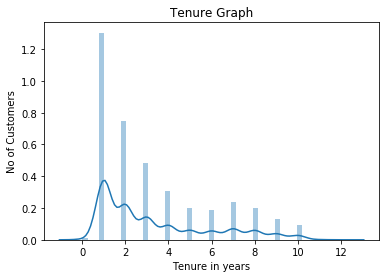

In [66]:
ax = sns.distplot(telecom_hv_cust['Tenure'])
ax.set_ylabel('No of Customers')
ax.set_xlabel('Tenure in years')
ax.set_title('Tenure Graph')
plt.show()

<div class="alert alert-block alert-info">   
    
#### Inference: Above graph shows the tenure of the customers and majority of customers falls under the tenure of 1 to 2 years.

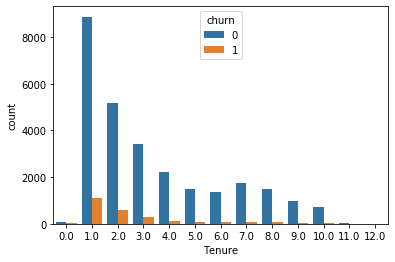

In [67]:
#plt.figure(figsize=(5,8))
sns.countplot(x = 'Tenure', hue = 'churn',data =telecom_hv_cust)
plt.show()

<div class="alert alert-block alert-info">  
    
#### Inference:- 
- From the above graph we can infer that majority of the churn people falls under the tenure of 1 to 2 years.
- The count of churn customers decreases as the tenure of the customers increases with the network.

In [68]:
telecom_hv_cust.shape

(30001, 132)

### Step 4: Visualization of data (EDA)

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where i will also identify if some predictors directly have a strong association with the outcome variable

#### Checking the coorelations between the variables

In [69]:
# lets check the correlation amongst the features
cor = telecom_hv_cust.corr()
cor

mobile_number    arpu_6    arpu_7    arpu_8  \
mobile_number               1.000000  0.033944  0.029496  0.034570   
arpu_6                      0.033944  1.000000  0.671732  0.612617   
arpu_7                      0.029496  0.671732  1.000000  0.759858   
arpu_8                      0.034570  0.612617  0.759858  1.000000   
onnet_mou_6                 0.010576  0.342438  0.211608  0.151677   
onnet_mou_7                 0.006132  0.216136  0.320818  0.233728   
onnet_mou_8                 0.008436  0.186807  0.270330  0.347706   
offnet_mou_6                0.022685  0.509280  0.351713  0.279066   
offnet_mou_7                0.013701  0.339350  0.490176  0.377210   
offnet_mou_8                0.020231  0.285100  0.395668  0.524798   
roam_ic_mou_6               0.010688  0.126884  0.092501  0.087996   
roam_ic_mou_7              -0.002337  0.083484  0.093692  0.077709   
roam_ic_mou_8               0.005051  0.090363  0.093961  0.110842   
roam_og_mou_6               0.005742  0.196086  0.133520  0.128323   
roam_og_mou_7              -0.001444  0.143261  0.179894  0.141421   
roam_og_mou_8              -0.002998  0.124994  0.152217  0.199114   
loc_og_t2t_mou_6            0.047776  0.167352  0.106674  0.101287   
loc_og_t2t_mou_7            0.045378  0.127683  0.157926  0.133167   
loc_og_t2t_mou_8            0.044602  0.123732  0.135348  0.178831   
loc_og_t2m_mou_6            0.079753  0.332207  0.215457  0.212069   
loc_og_t2m_mou_7            0.076990  0.245092  0.303201  0.266836   
loc_og_t2m_mou_8            0.080622  0.218150  0.256019  0.352747   
loc_og_t2f_mou_6            0.051706  0.139434  0.112066  0.120814   
loc_og_t2f_mou_7            0.052801  0.114368  0.140968  0.135244   
loc_og_t2f_mou_8            0.056261  0.104302  0.121890  0.160204   
loc_og_t2c_mou_6           -0.011992  0.047680  0.009198  0.002303   
loc_og_t2c_mou_7           -0.014402  0.010017  0.040485  0.021742   
loc_og_t2c_mou_8           -0.006246  0.011393  0.032706  0.057143   
loc_og_mou_6                0.084641  0.328978  0.213501  0.208515   
loc_og_mou_7                0.081703  0.246204  0.304529  0.264931   
loc_og_mou_8                0.082773  0.223301  0.255867  0.347333   
std_og_t2t_mou_6           -0.016126  0.274093  0.166621  0.102718   
std_og_t2t_mou_7           -0.019582  0.161528  0.260775  0.178728   
std_og_t2t_mou_8           -0.015134  0.133795  0.219911  0.279686   
std_og_t2m_mou_6           -0.024798  0.301575  0.203737  0.121118   
std_og_t2m_mou_7           -0.028184  0.181414  0.307786  0.207492   
std_og_t2m_mou_8           -0.024395  0.139780  0.239066  0.324865   
std_og_t2f_mou_6            0.026098  0.066751  0.051743  0.055607   
std_og_t2f_mou_7            0.018292  0.053564  0.070678  0.068161   
std_og_t2f_mou_8            0.022105  0.043895  0.053822  0.071213   
std_og_mou_6               -0.026851  0.385851  0.248495  0.150647   
std_og_mou_7               -0.031622  0.230380  0.381714  0.259674   
std_og_mou_8               -0.025872  0.182037  0.305135  0.402110   
isd_og_mou_6               -0.003305  0.466898  0.416974  0.394451   
isd_og_mou_7               -0.002934  0.420753  0.508862  0.437707   
isd_og_mou_8               -0.003759  0.413504  0.452315  0.454962   
spl_og_mou_6               -0.018397  0.122743  0.067268  0.099936   
spl_og_mou_7               -0.020731  0.068491  0.114977  0.125051   
spl_og_mou_8               -0.012834  0.044582  0.070283  0.108328   
og_others_6                -0.006493  0.054782  0.017885  0.013085   
og_others_7                -0.000901  0.024347  0.026086  0.015755   
og_others_8                 0.000608  0.015490  0.017858  0.012369   
total_og_mou_6              0.021971  0.554510  0.365323  0.275700   
total_og_mou_7              0.013738  0.363276  0.535818  0.401973   
total_og_mou_8              0.019837  0.301856  0.429002  0.562003   
loc_ic_t2t_mou_6            0.033237  0.082855  0.045888  0.048927   
loc_ic_t2t_mou_7            0.030

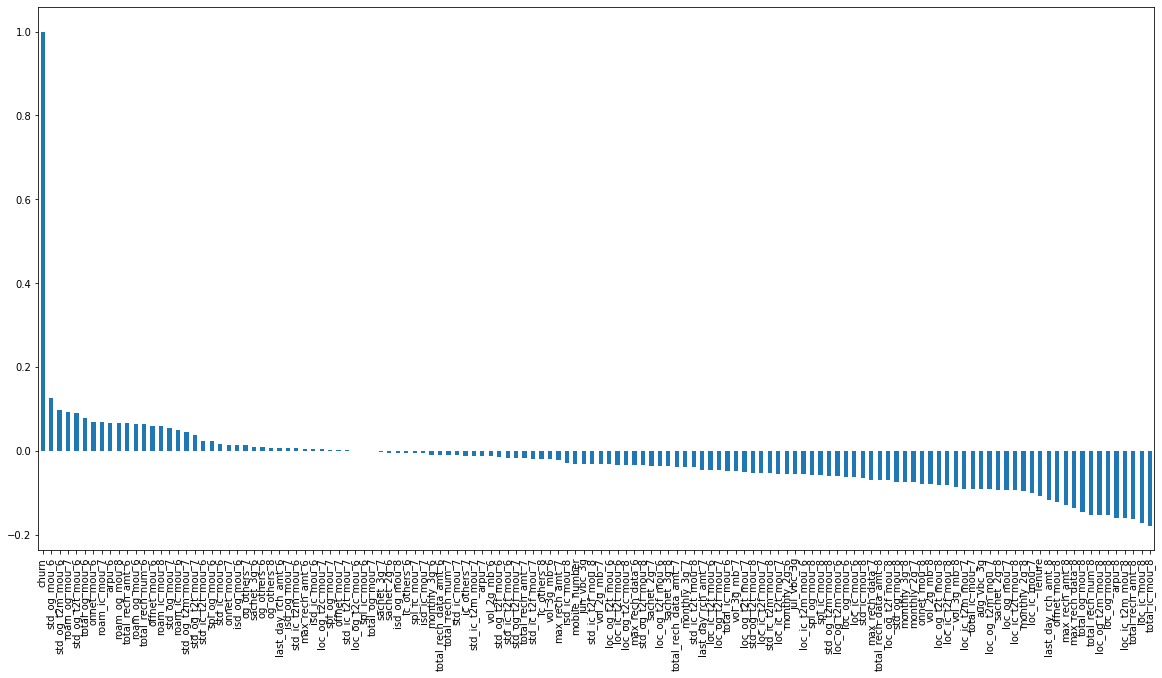

In [70]:
# lets check correlation of churn with other columns
plt.figure(figsize=(20,10))
telecom_hv_cust.corr()['churn'].sort_values(ascending = False).plot(kind='bar')
plt.show()

<div class="alert alert-block alert-info">
    
#### Inference:
 1. std_og_mou for 6th month, std_og_t2m_mou for 6th month, roam_og_mou for 7th month, std_og_t2t_mou for 6th month, total_og_mou for 6th month are positively correlated with churn. 
 2. total_ic_mou, loc_ic_mou, total_rech_amt, loc_ic_t2m_mou for 8th month has negative correlation with churn.

### 4.1) Univariate Analysis

In [71]:
telecom_hv_cust.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 132 entries, mobile_number to Tenure
dtypes: float64(106), int32(1), int64(25)
memory usage: 31.6 MB


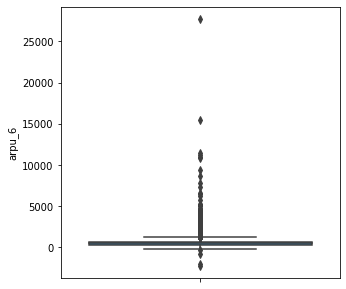

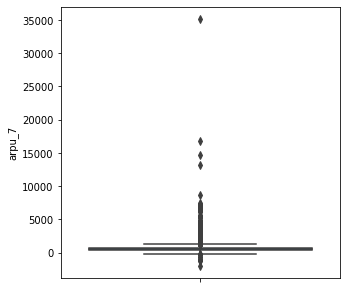

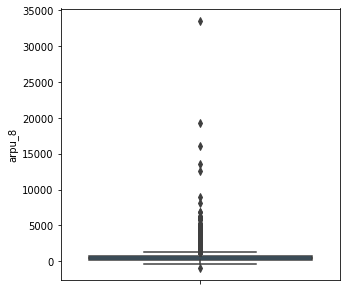

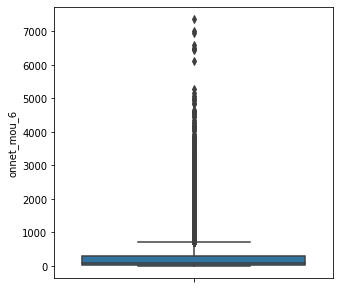

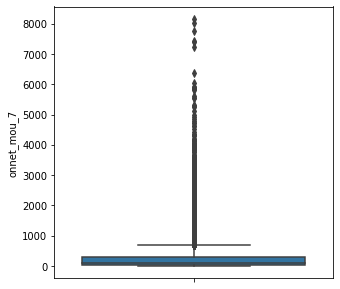

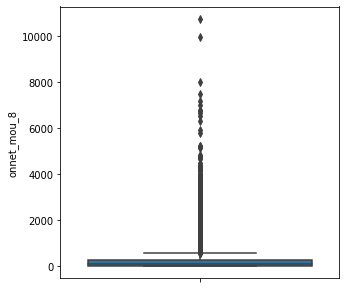

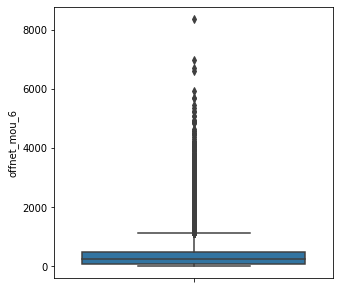

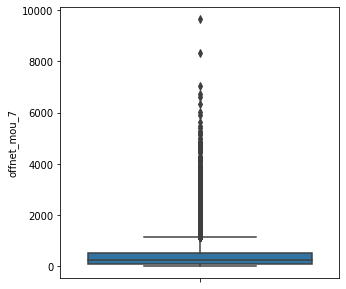

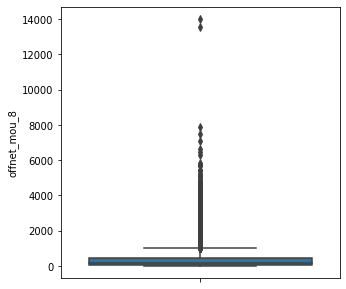

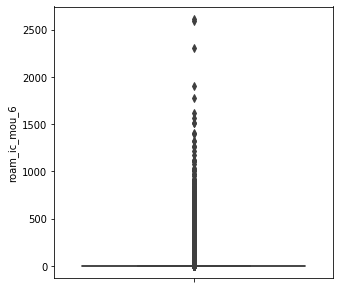

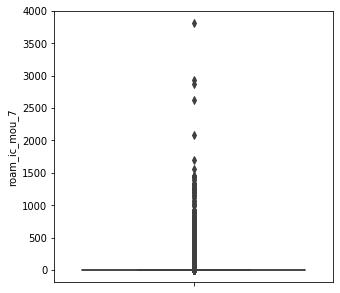

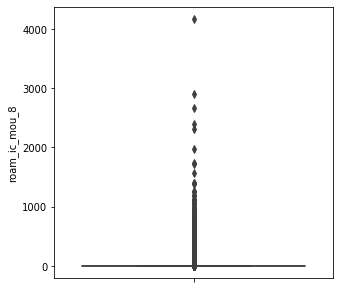

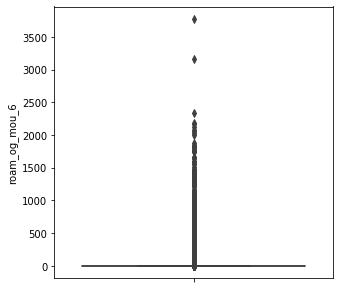

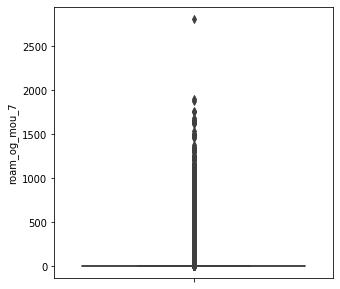

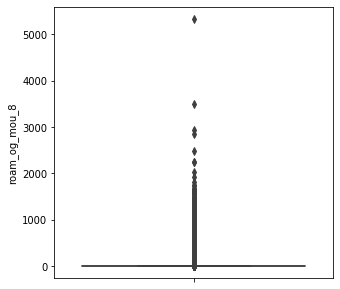

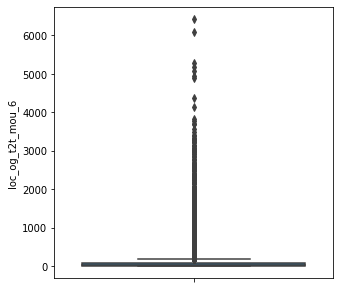

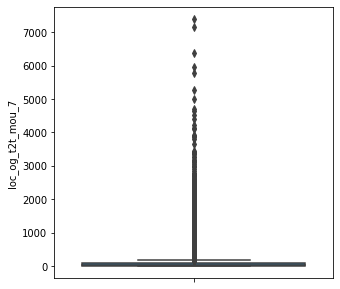

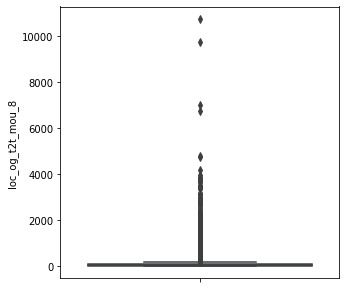

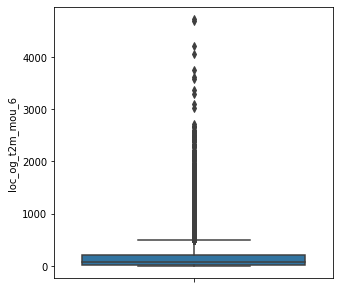

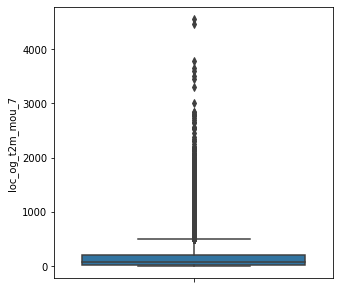

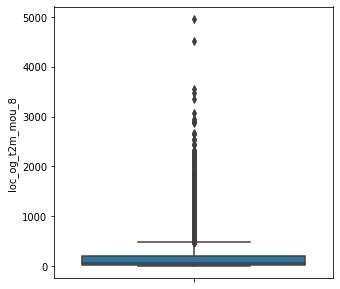

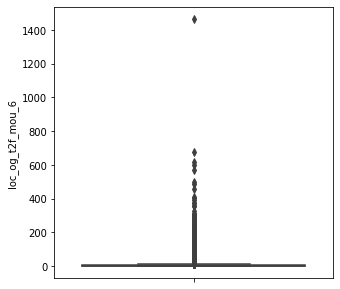

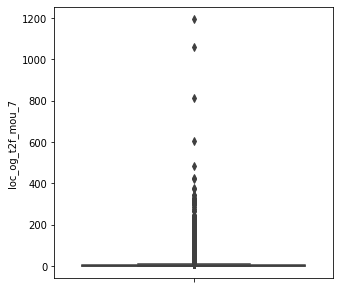

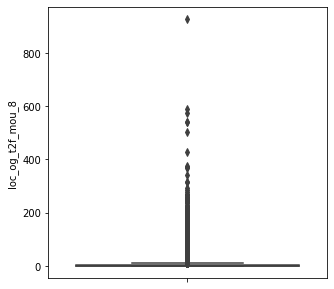

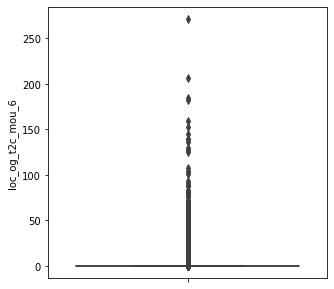

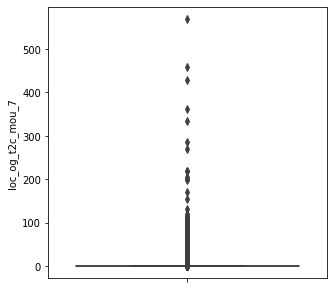

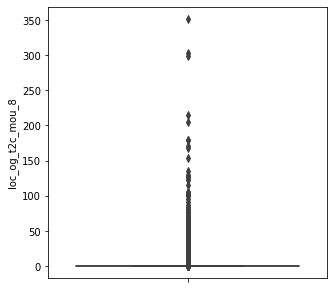

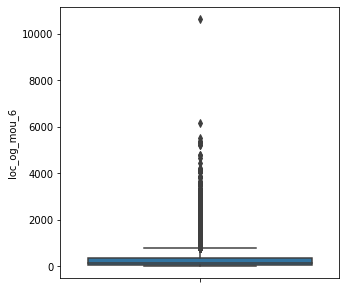

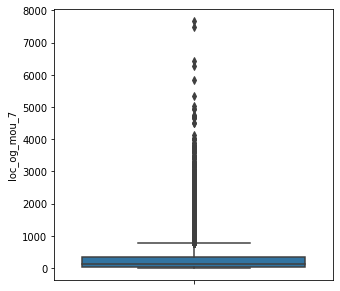

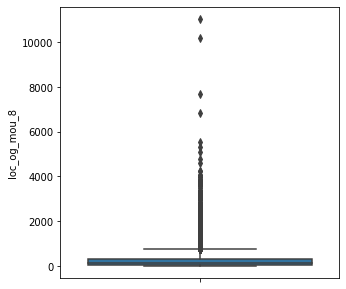

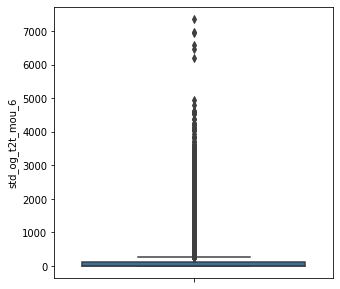

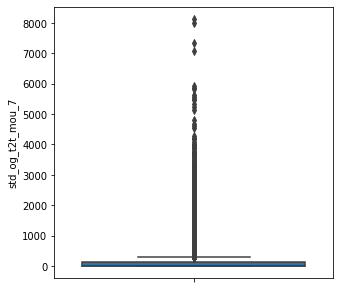

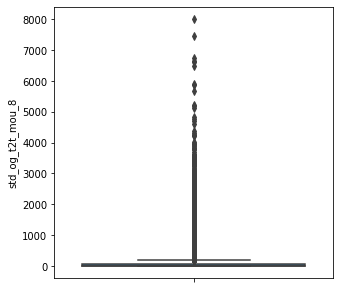

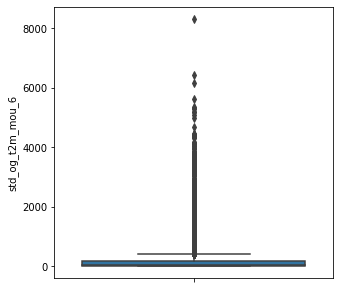

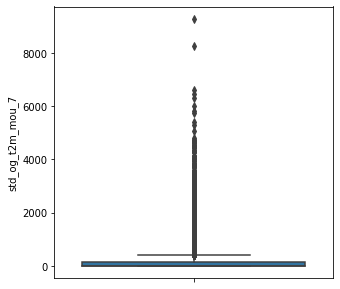

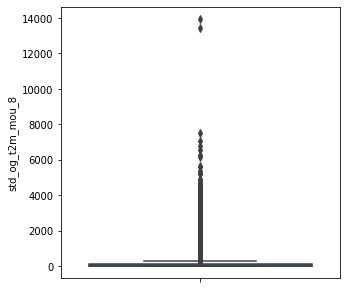

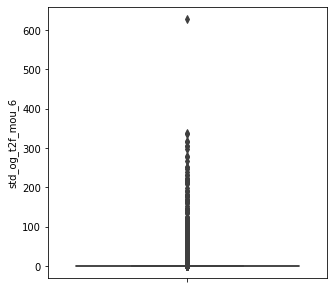

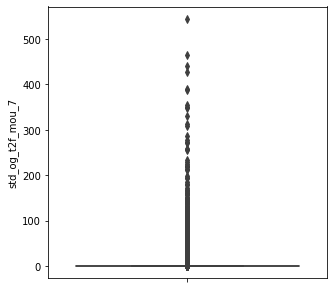

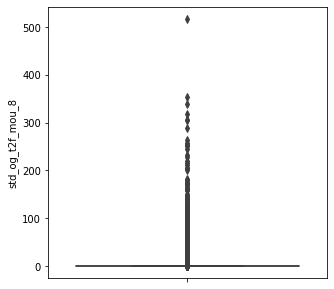

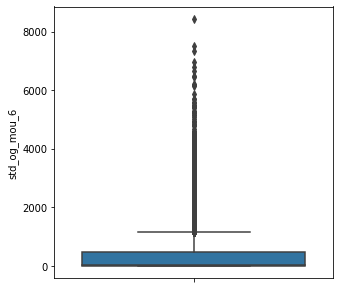

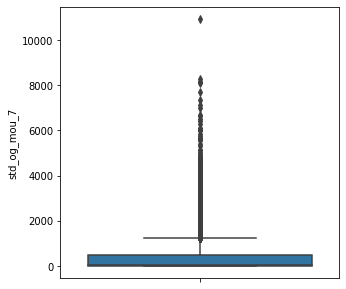

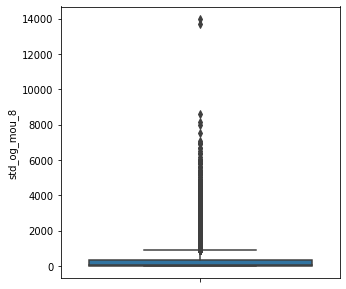

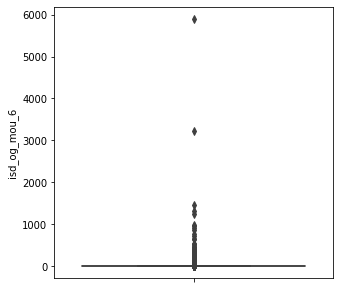

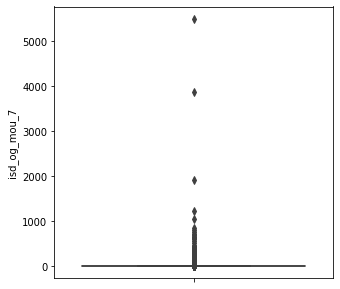

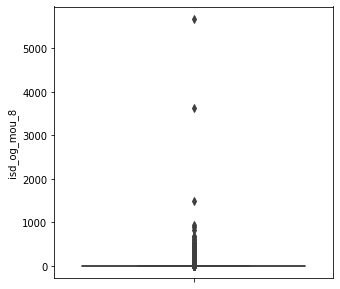

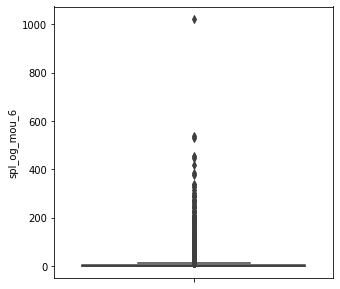

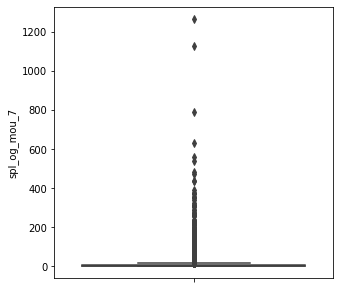

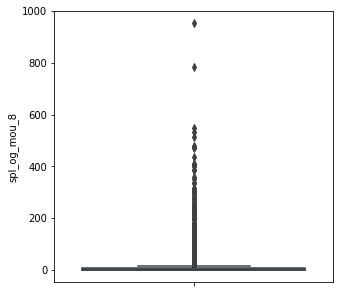

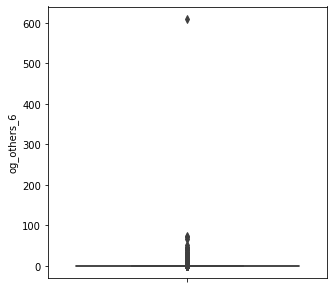

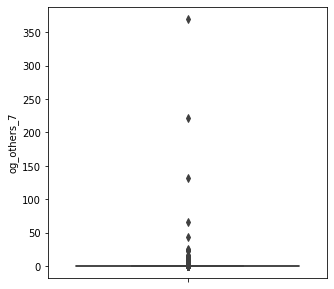

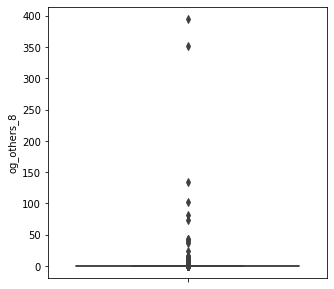

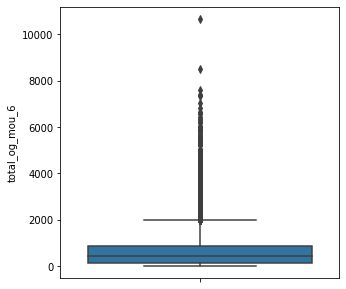

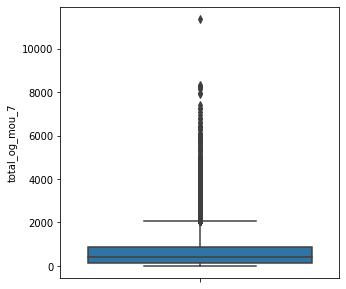

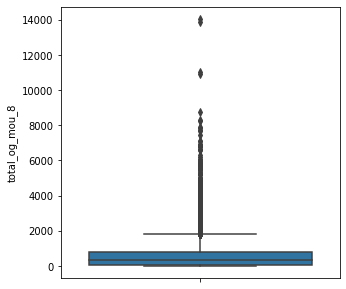

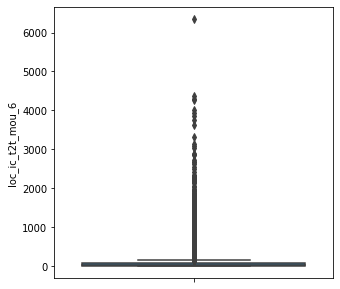

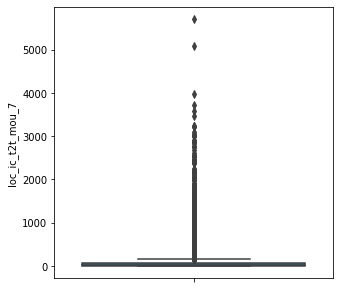

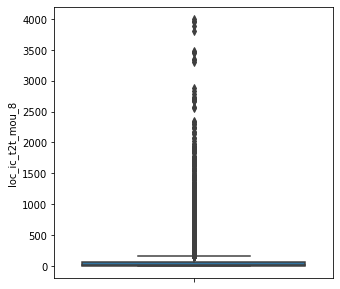

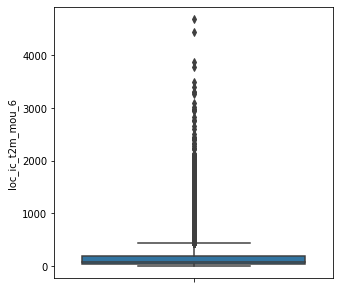

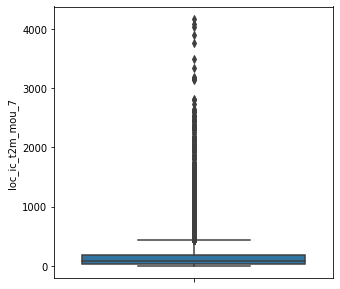

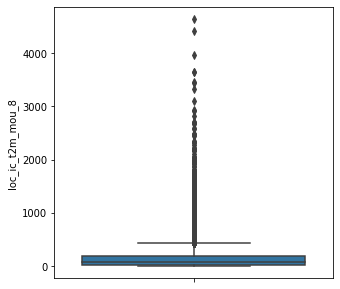

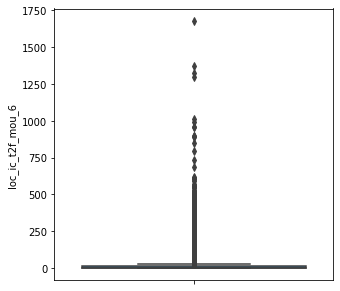

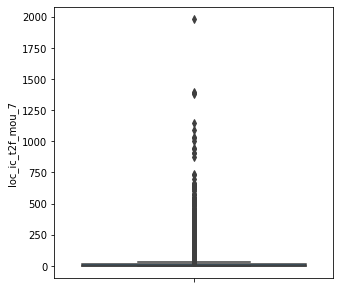

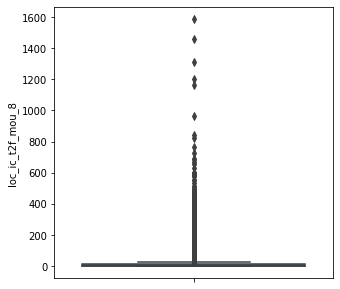

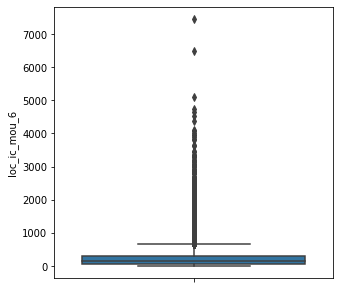

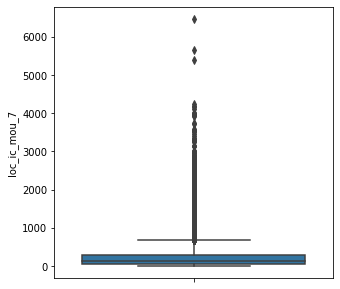

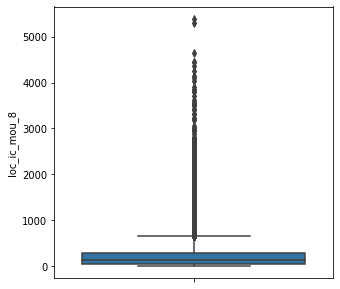

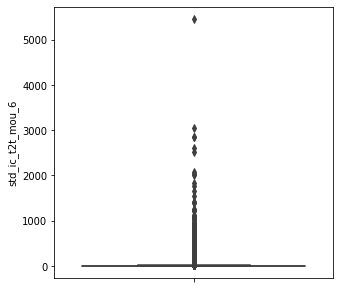

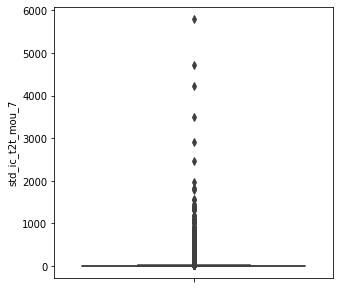

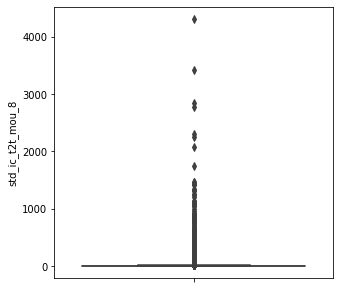

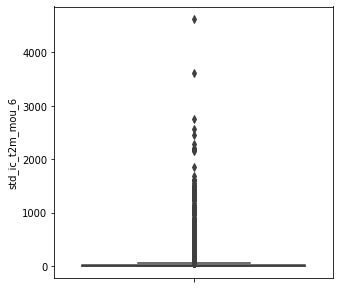

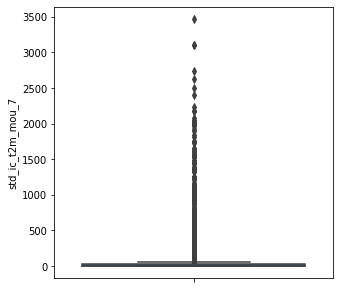

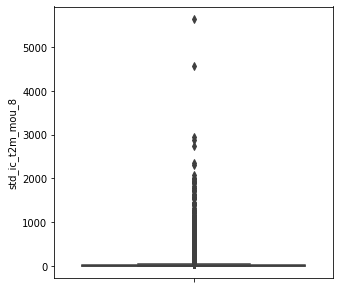

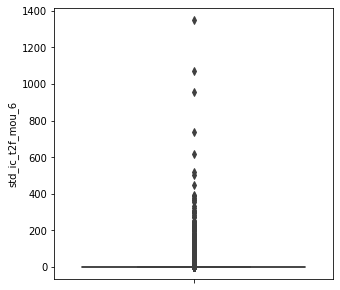

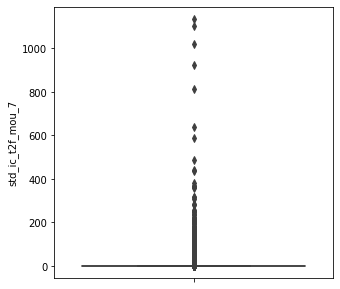

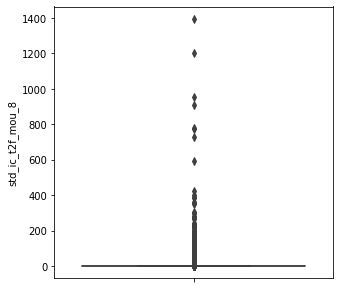

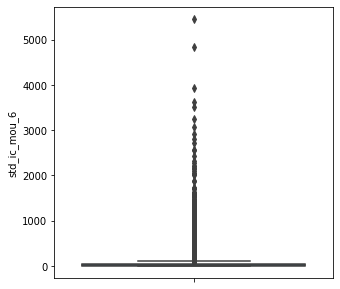

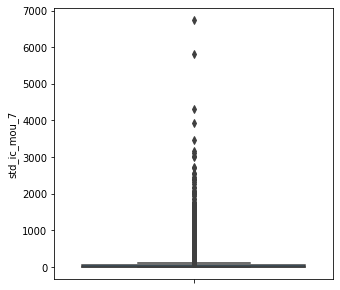

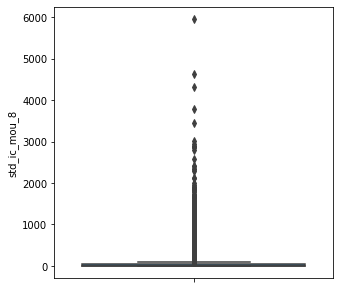

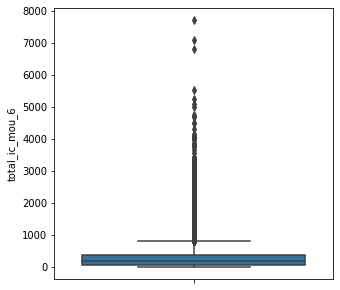

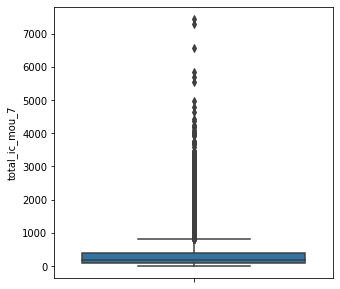

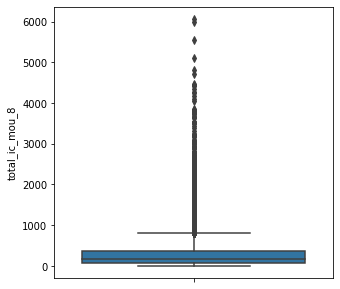

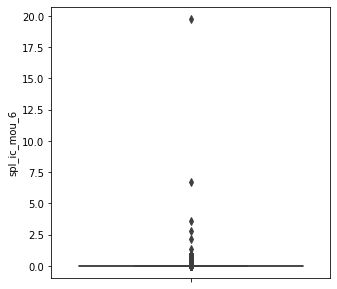

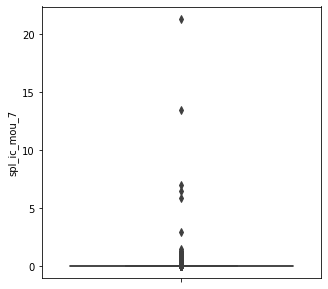

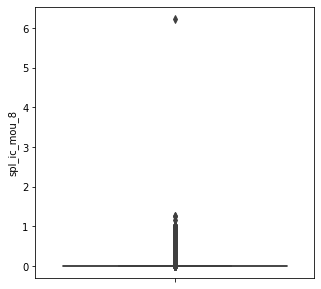

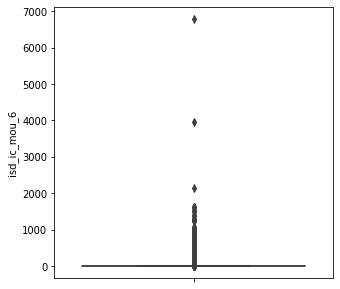

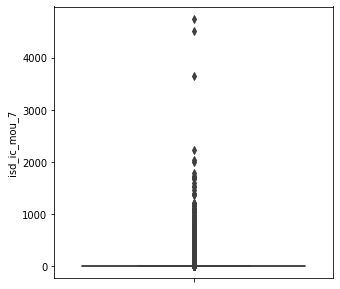

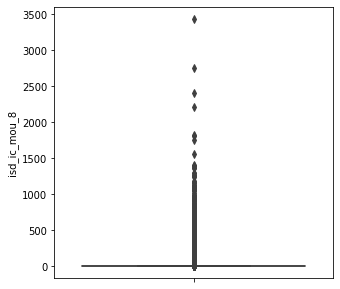

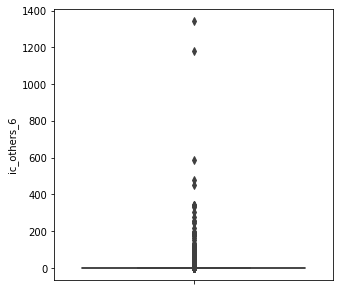

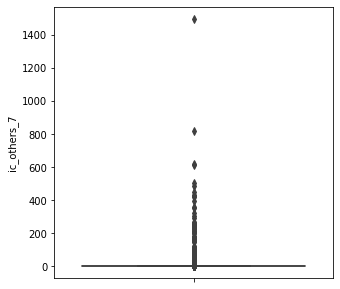

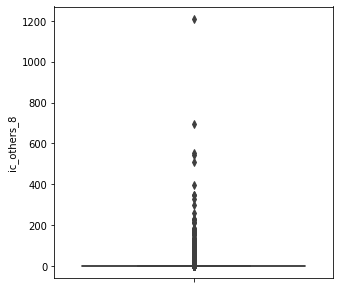

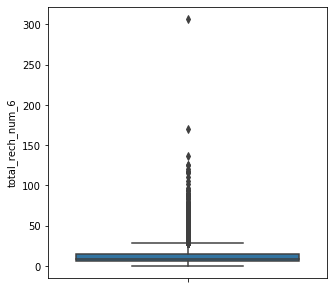

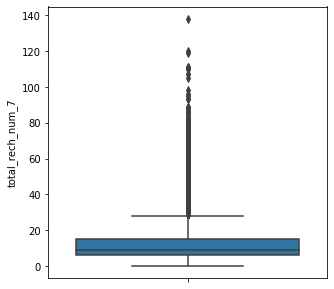

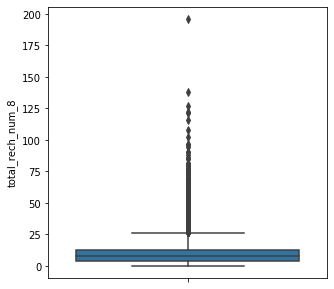

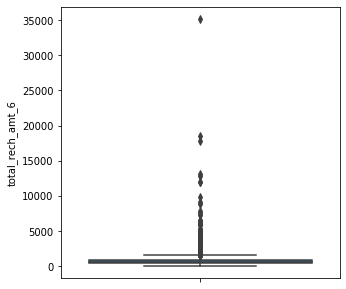

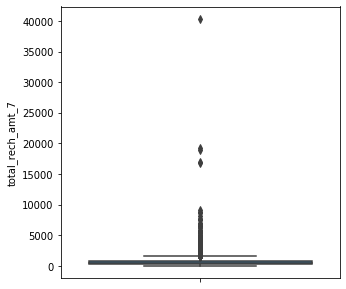

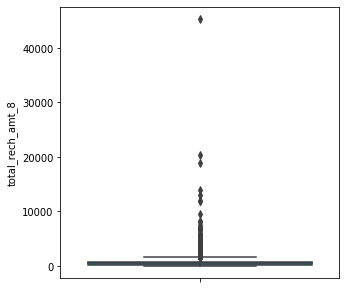

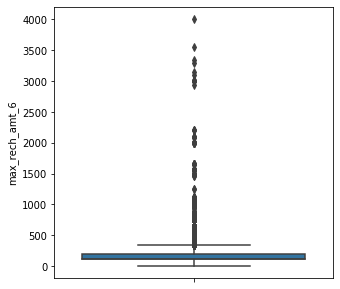

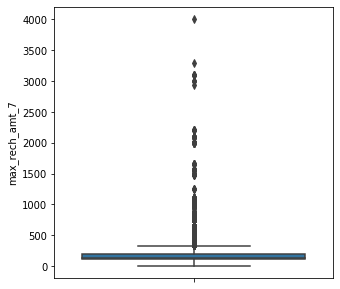

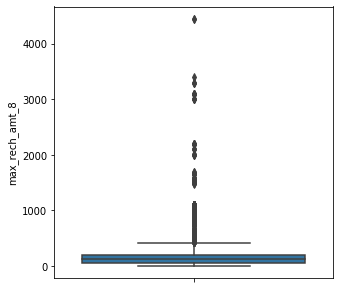

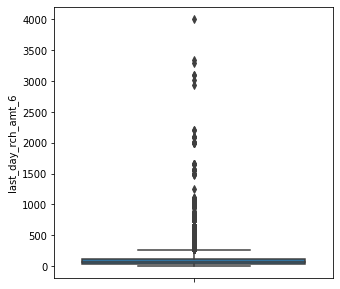

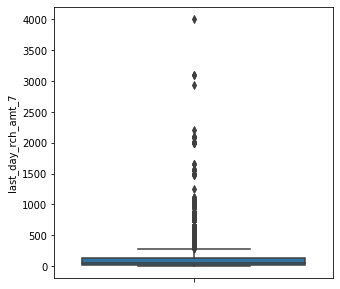

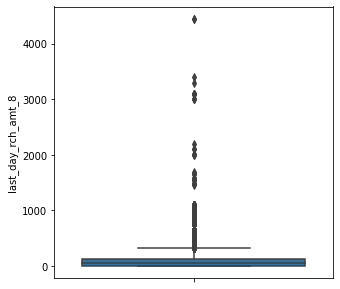

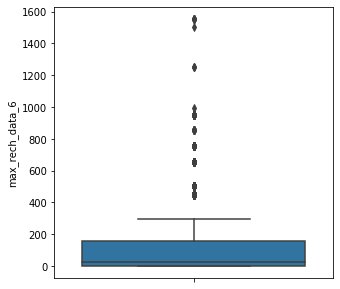

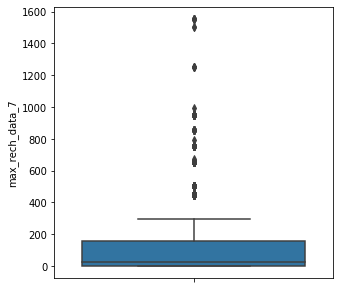

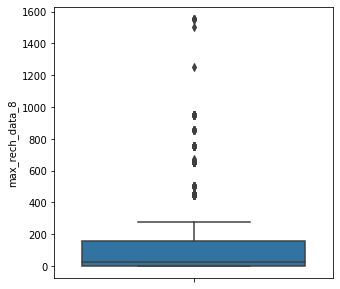

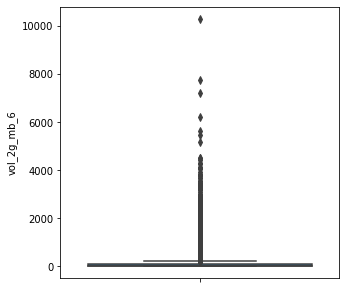

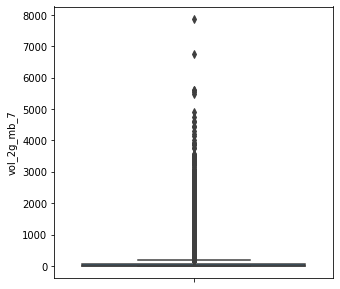

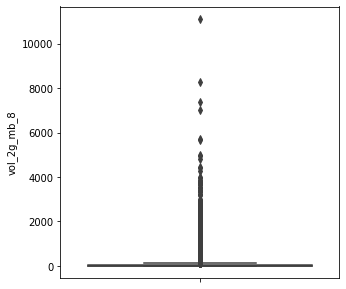

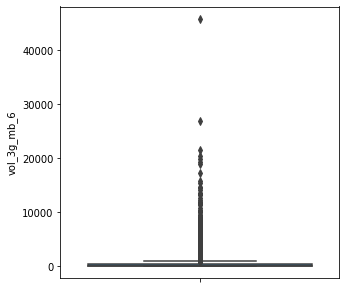

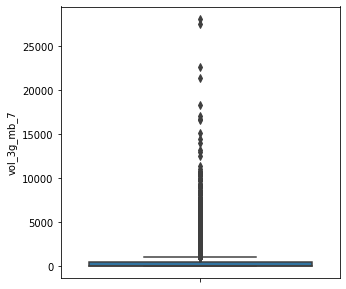

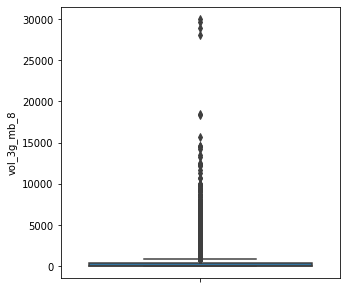

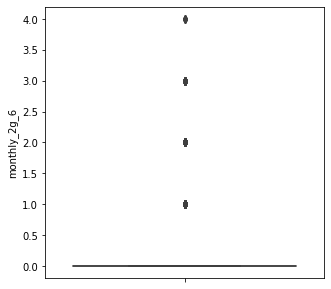

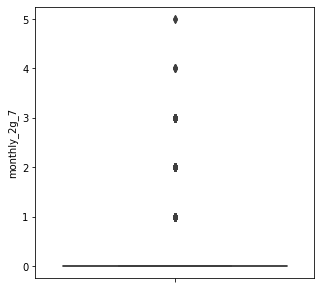

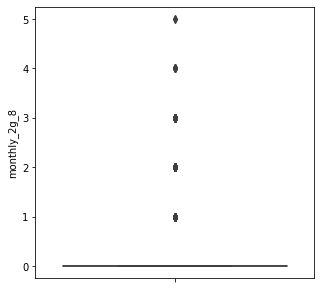

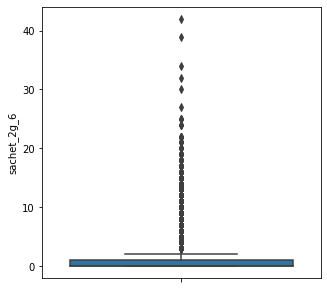

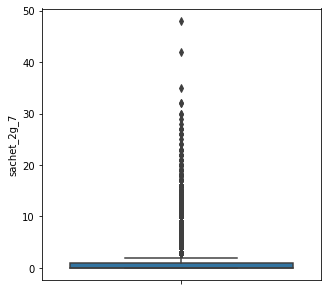

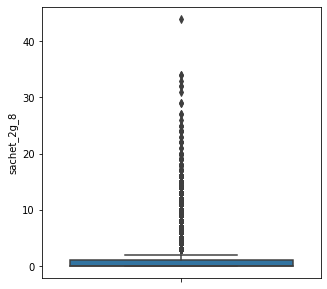

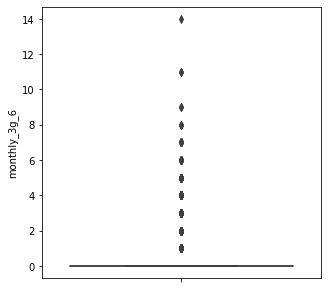

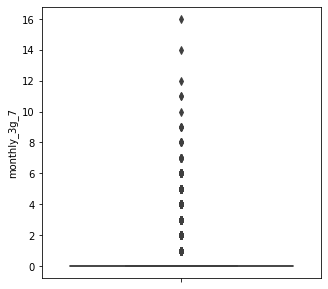

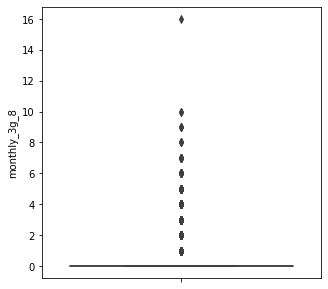

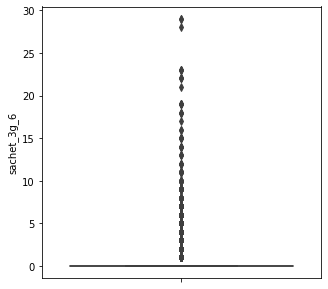

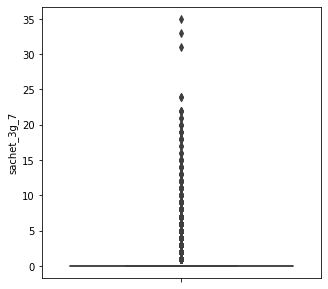

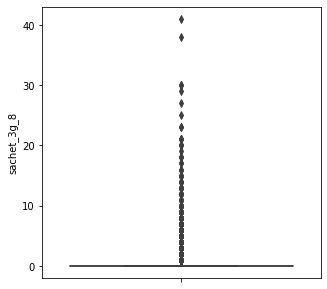

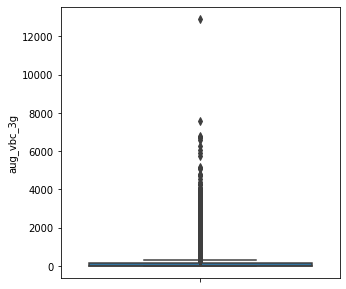

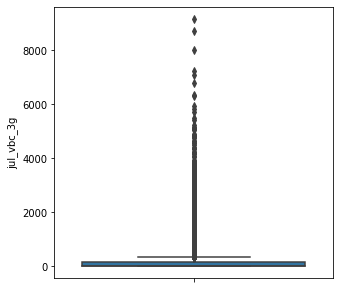

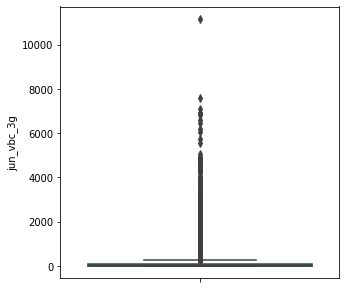

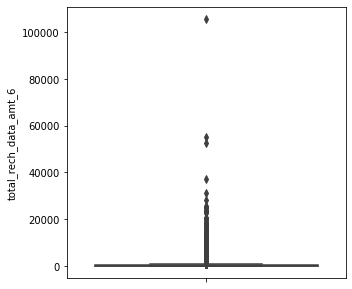

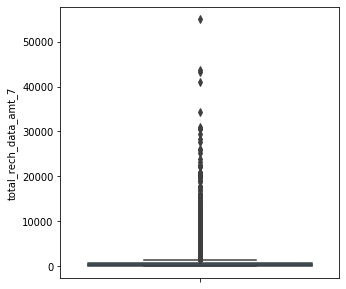

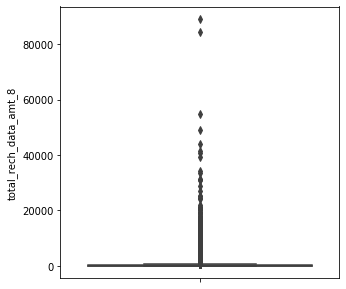

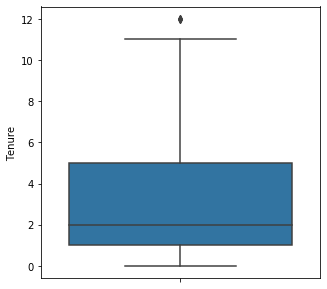

In [72]:
cont_cols = [col for col in telecom_hv_cust.columns if col not in ['churn','mobile_number']]

for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=col, data=telecom_hv_cust)
    

### 4.2)  Multivariate Analysis

### Visualising Numerical - Numerical Variables

<Figure size 864x864 with 0 Axes>

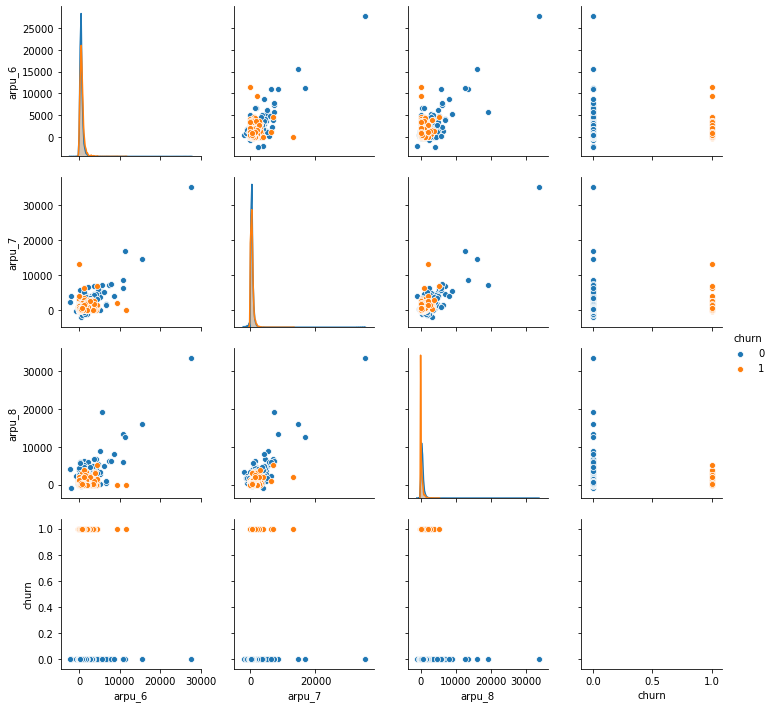

In [73]:
# Plotting Average Revenue per User vs Churn
plt.figure(figsize=(12,12))
sns.pairplot(data=telecom_hv_cust[['arpu_6', 'arpu_7','arpu_8','churn']],hue='churn')
plt.show()

<div class="alert alert-block alert-info">
    
<b> Inference: </b> We could see the drop in the ARPU for churned customer in the 8th Month (Action Phase).
    
</div>

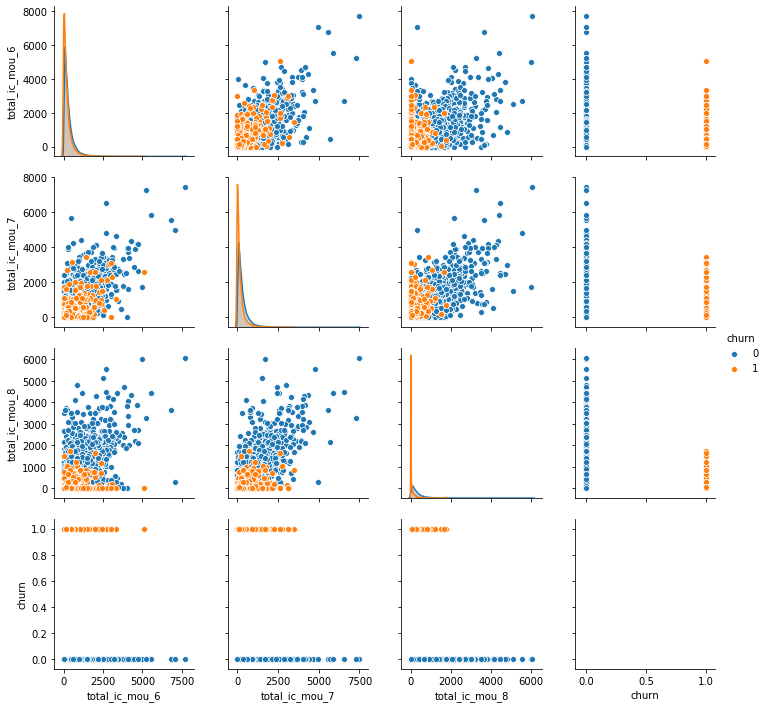

In [74]:
#Total Incoming calls vs Churn
sns.pairplot(data=telecom_hv_cust[['total_ic_mou_6','total_ic_mou_7','total_ic_mou_8',
                                   'churn']],hue='churn')
plt.show()

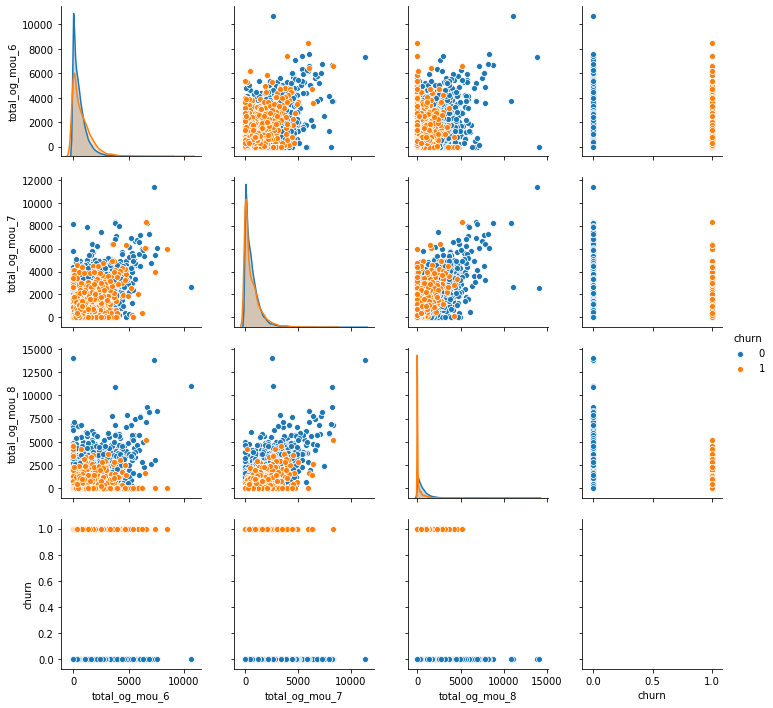

In [75]:
#Total Outgoing calls vs Churn
sns.pairplot(data=telecom_hv_cust[['total_og_mou_6','total_og_mou_7','total_og_mou_8','churn']],
             hue='churn')
plt.show()

<div class="alert alert-block alert-info">
    
<b> Inference: </b> We could see the drop in the MOU for churned customer in the 8th Month (Action Phase).
    
</div>

### Visualising Numerical - Categorical Variables

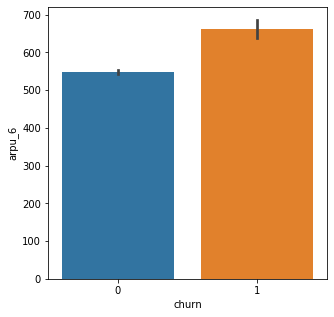

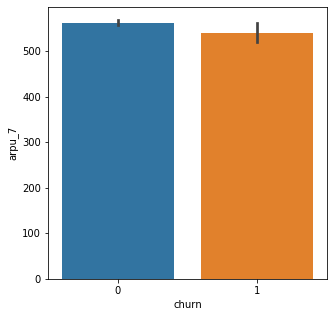

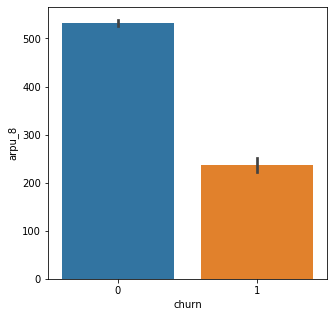

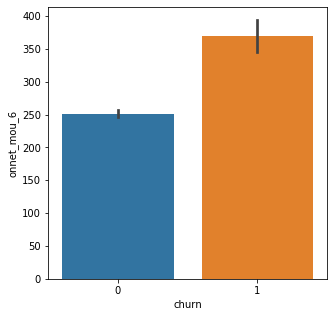

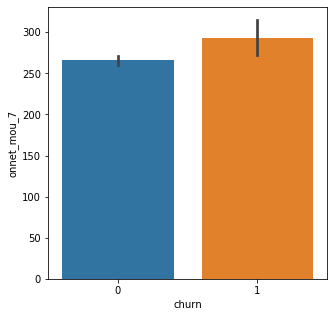

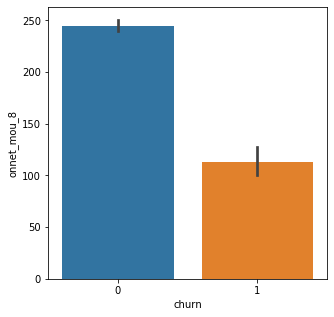

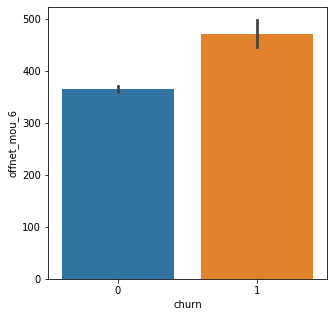

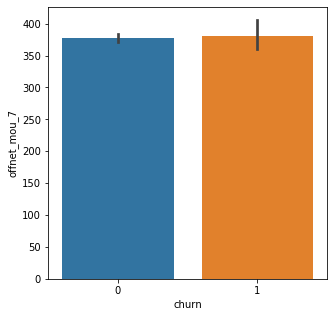

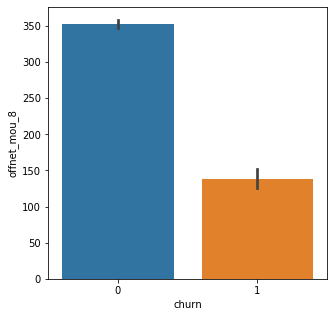

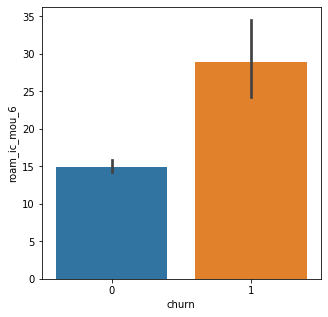

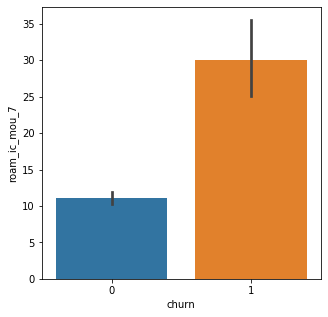

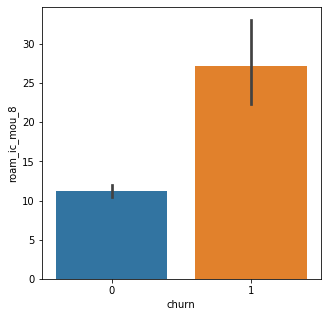

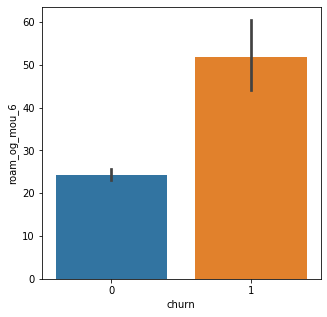

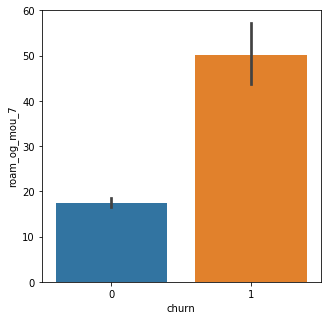

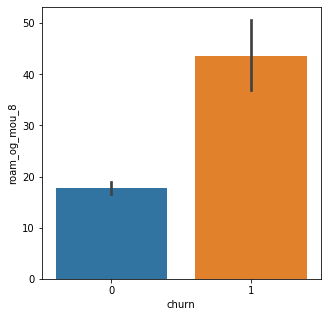

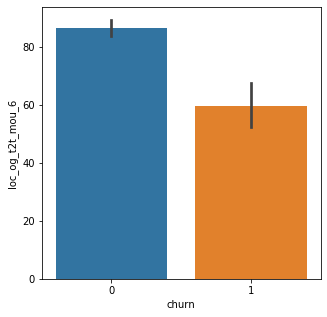

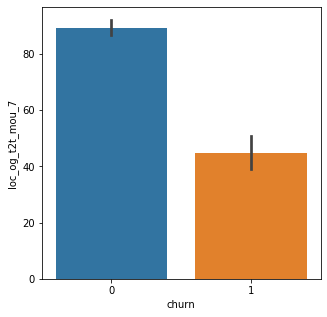

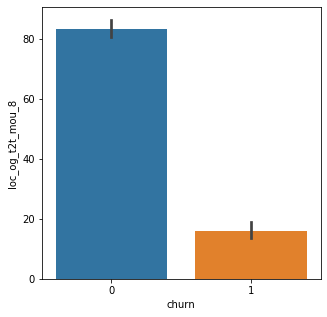

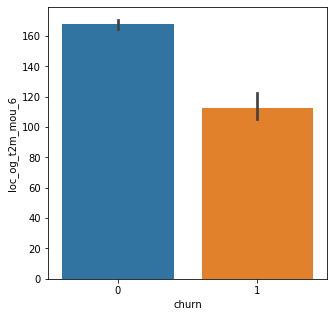

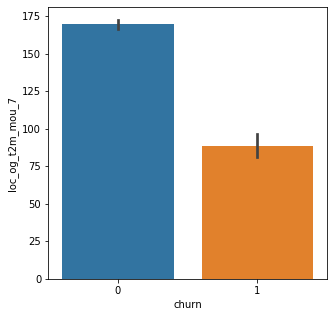

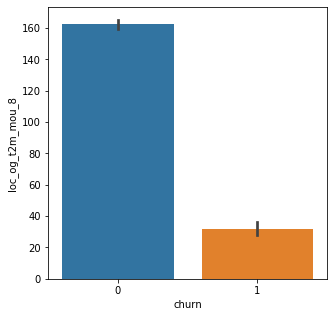

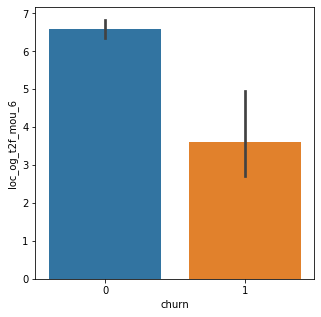

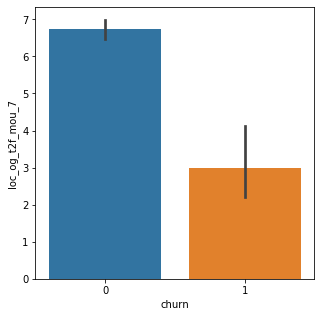

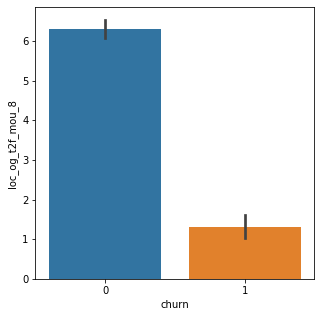

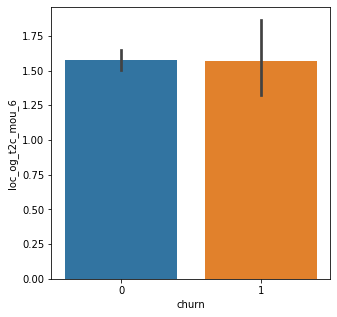

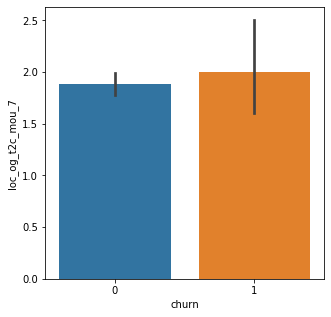

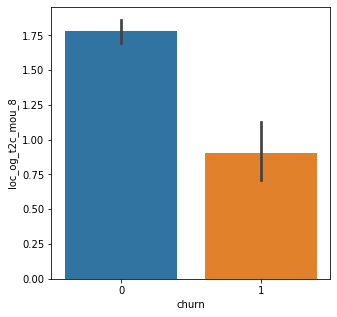

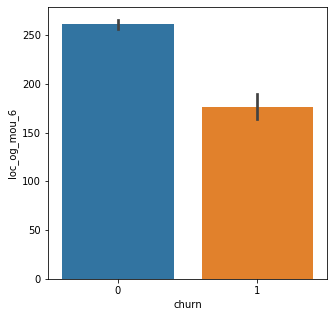

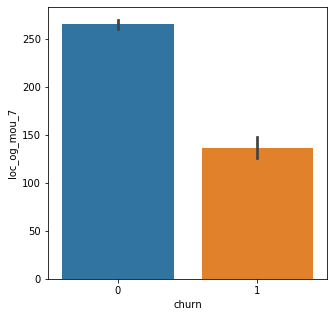

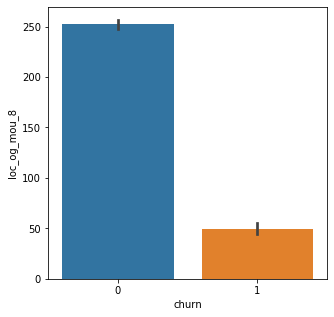

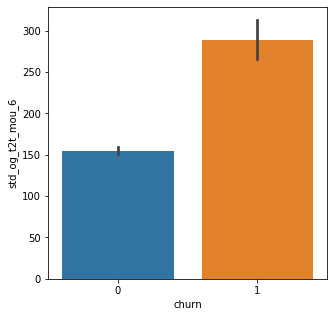

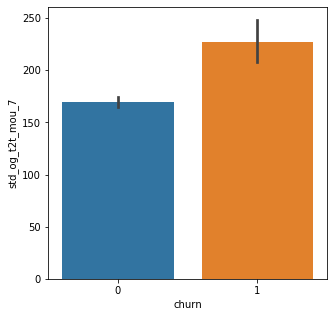

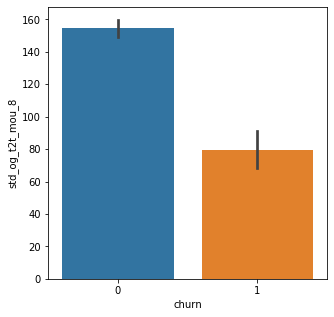

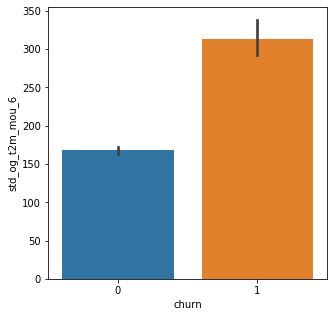

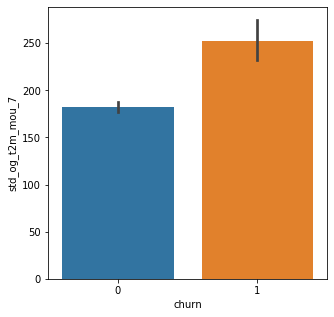

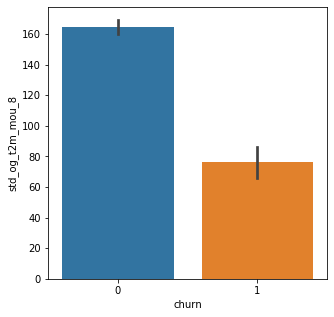

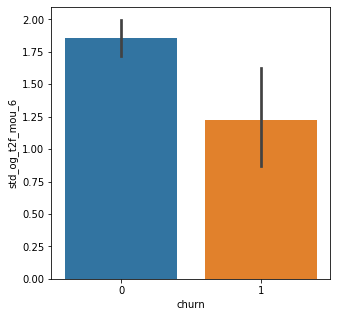

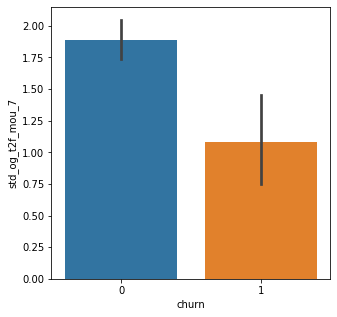

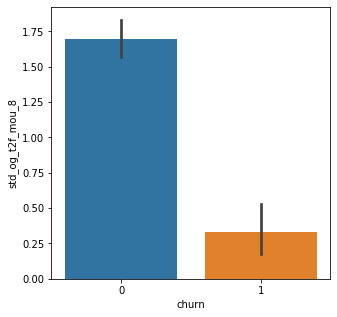

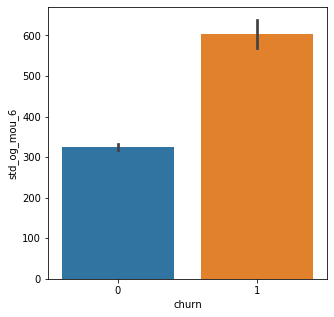

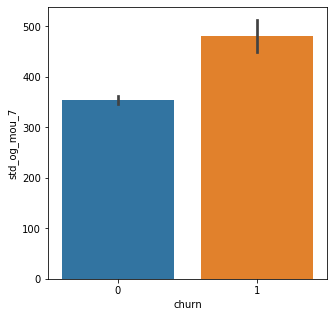

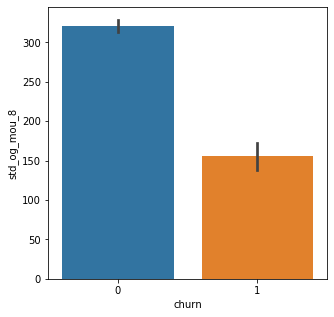

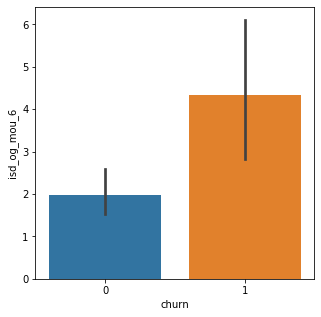

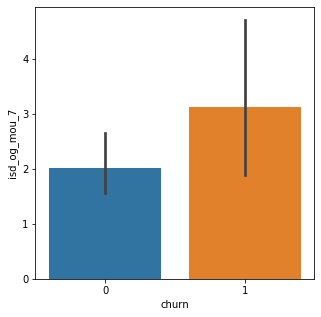

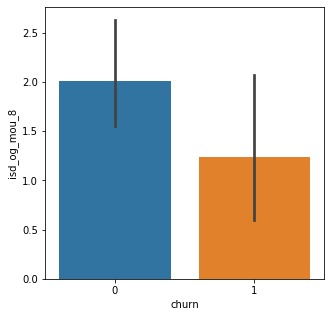

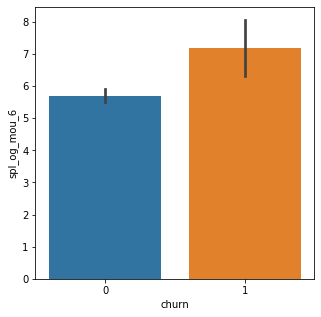

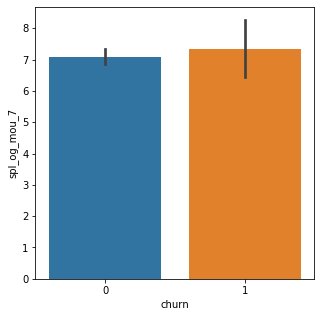

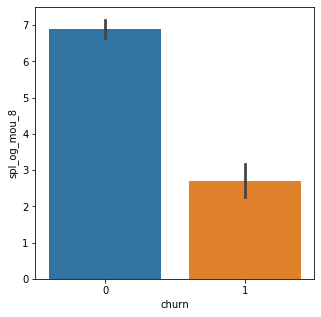

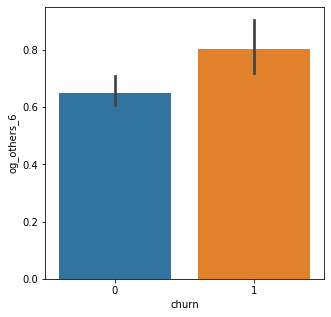

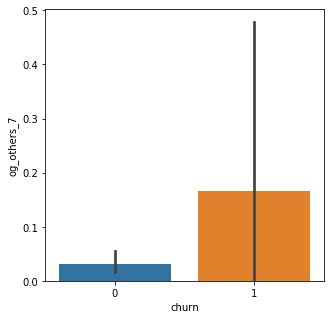

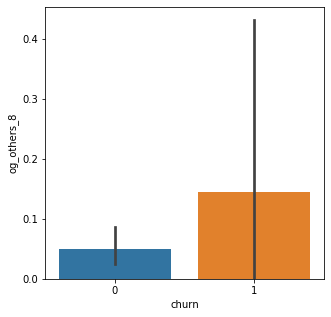

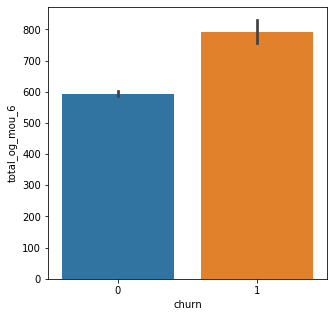

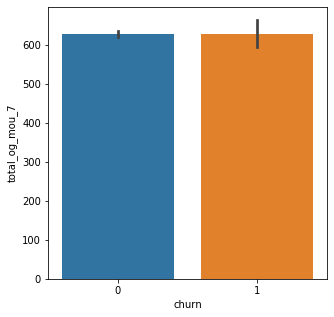

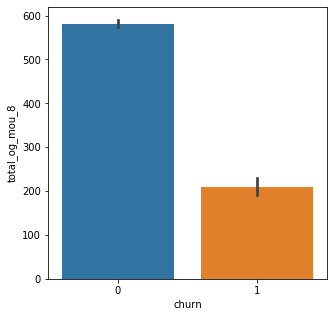

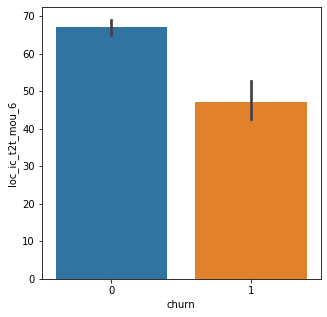

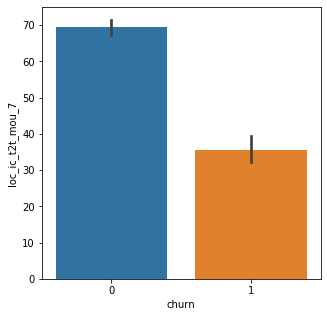

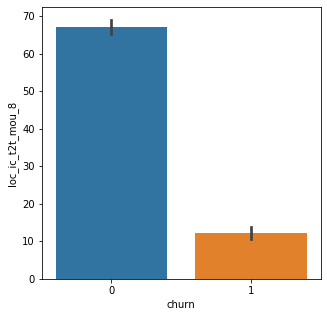

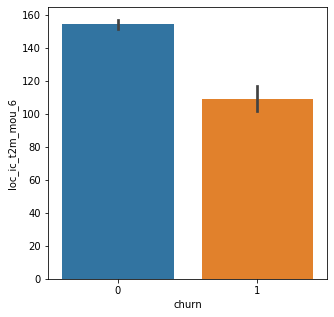

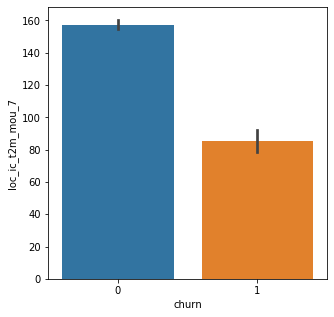

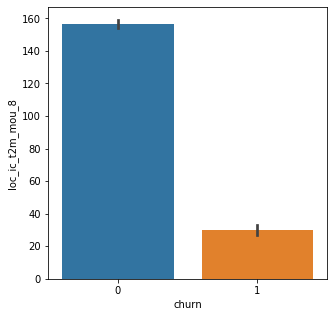

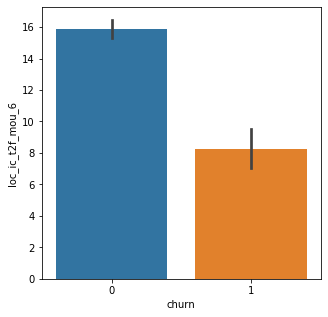

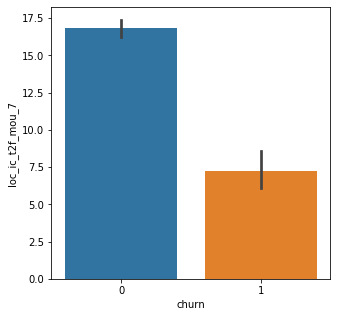

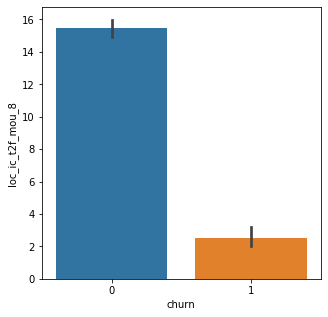

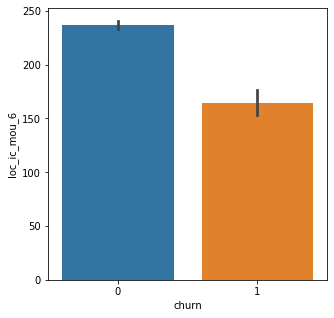

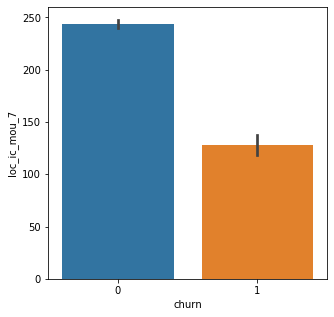

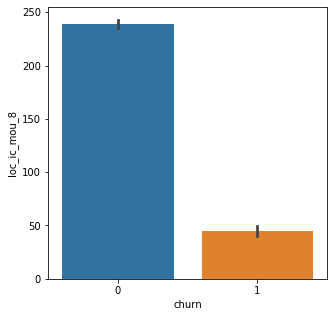

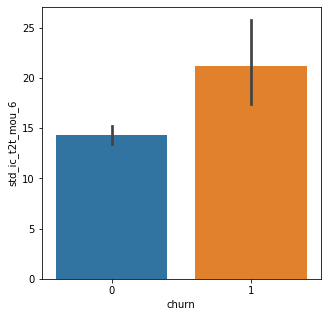

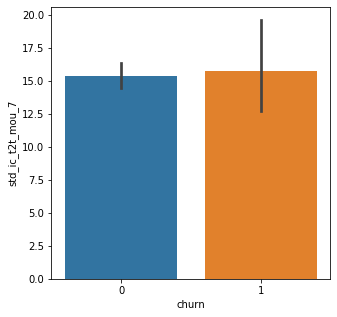

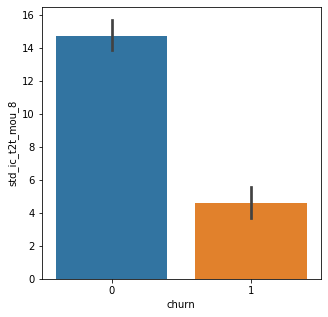

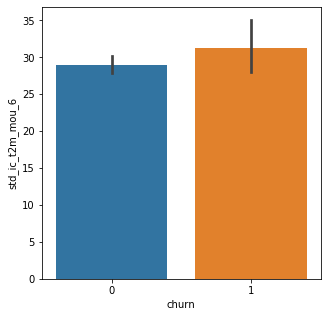

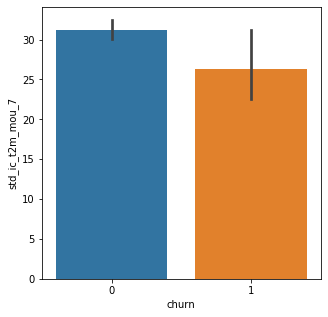

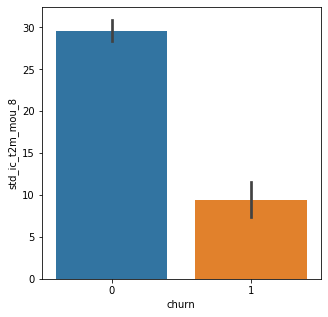

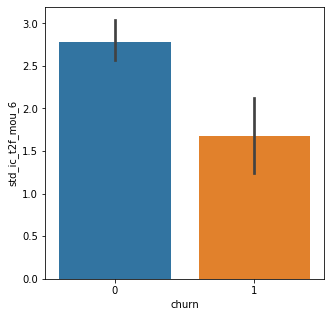

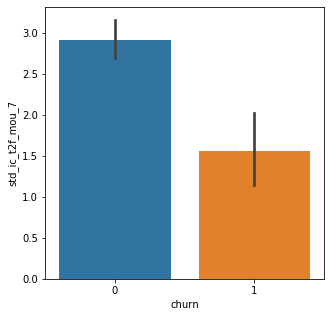

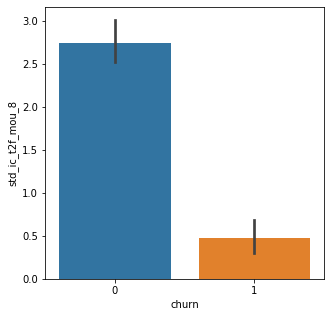

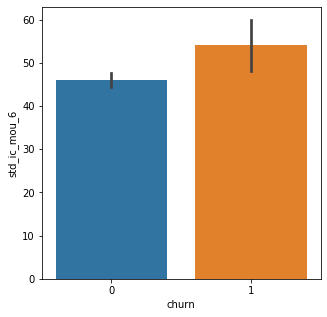

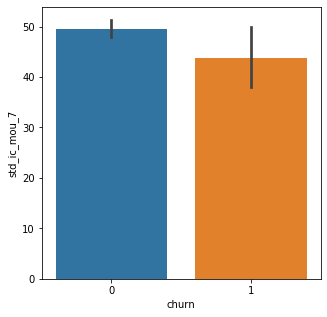

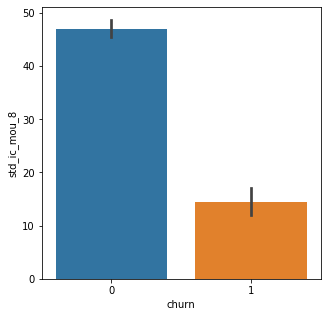

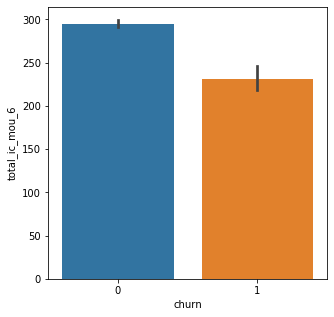

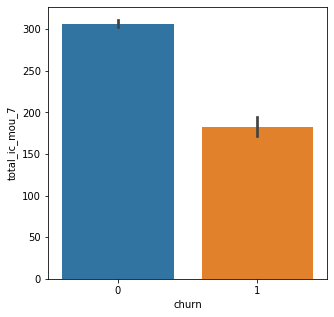

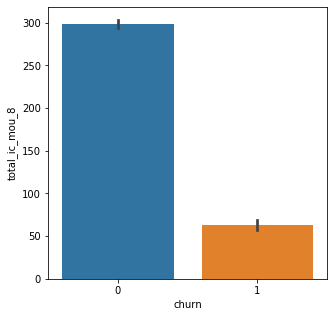

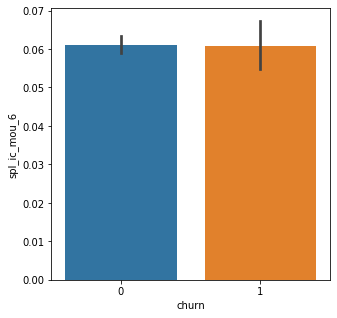

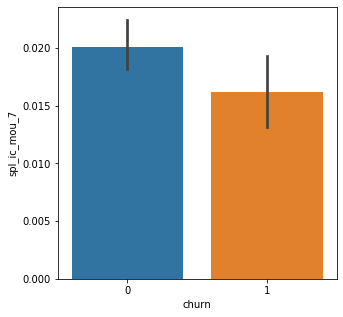

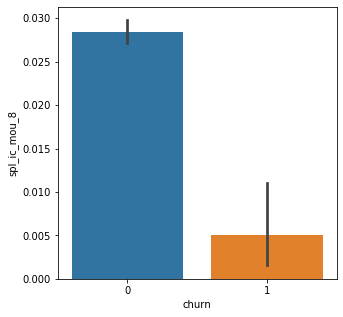

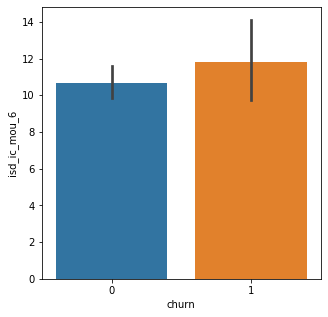

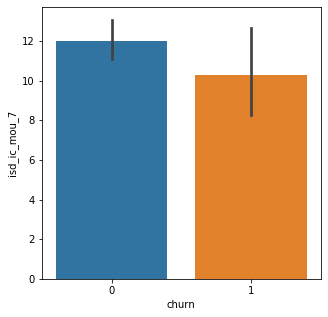

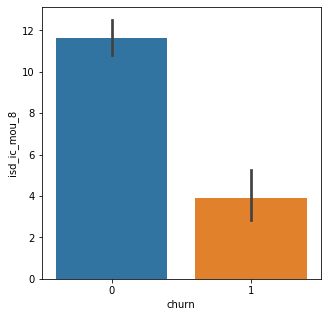

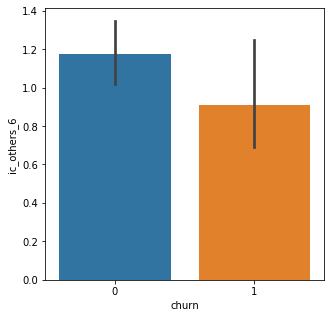

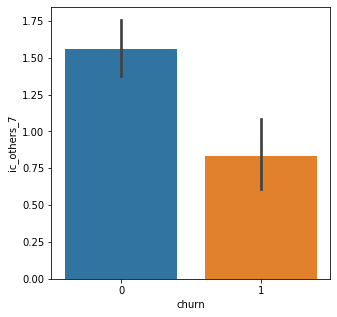

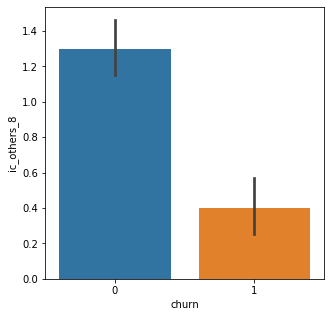

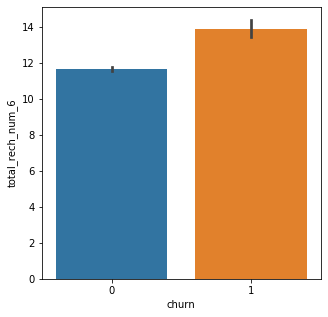

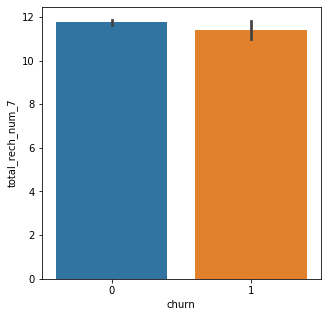

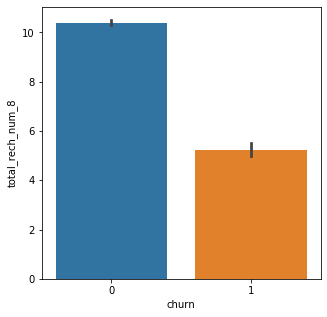

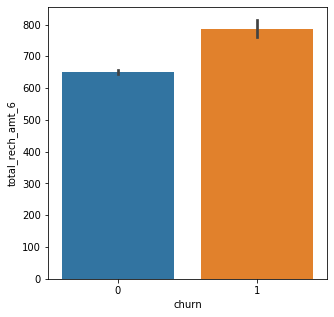

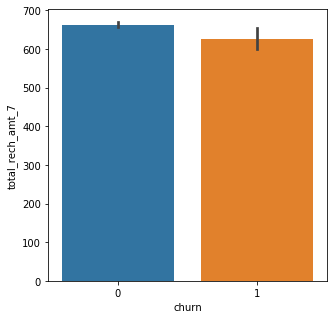

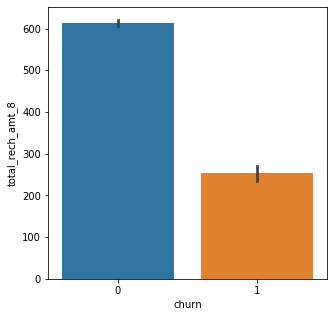

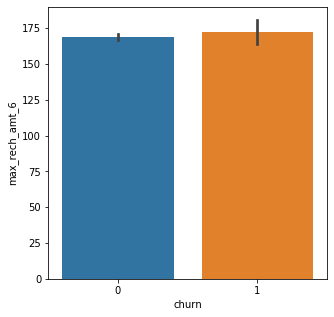

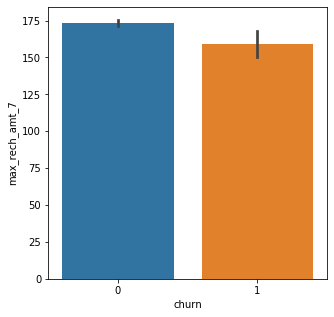

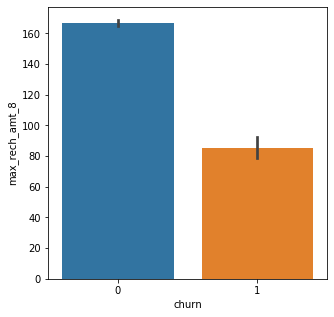

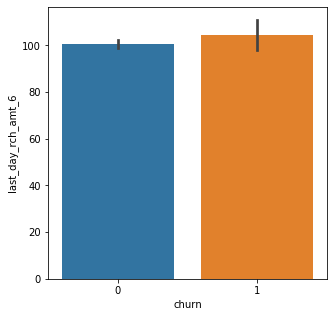

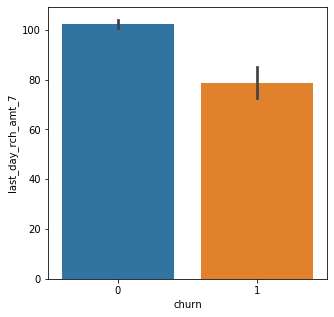

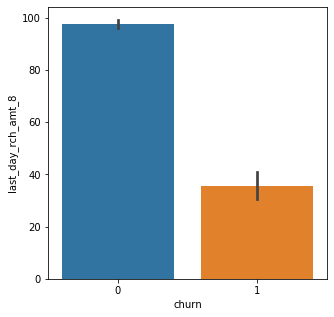

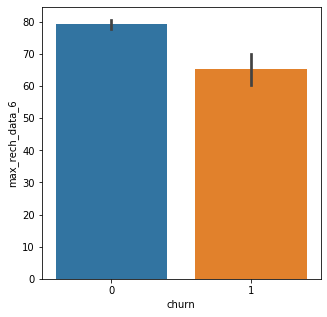

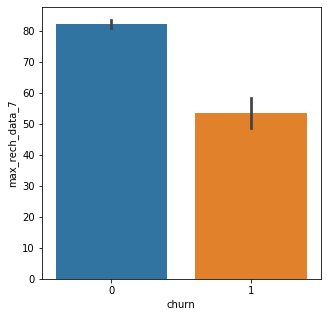

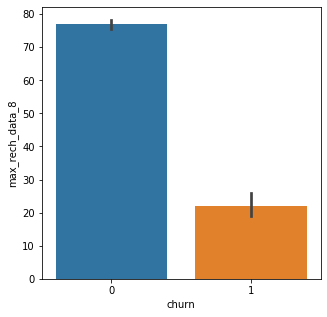

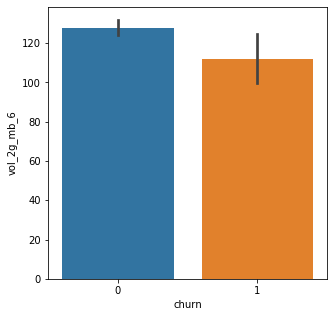

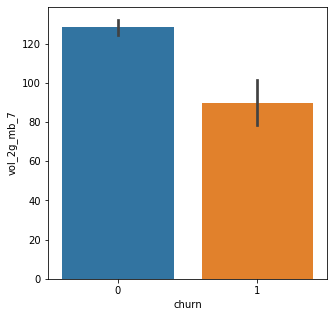

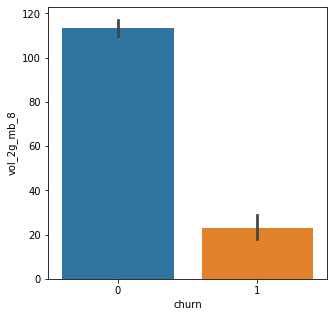

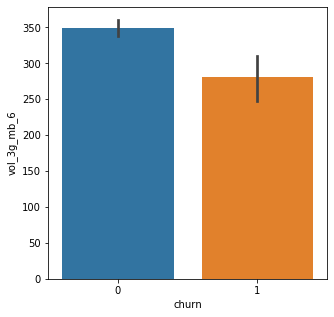

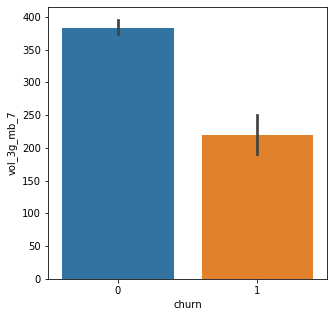

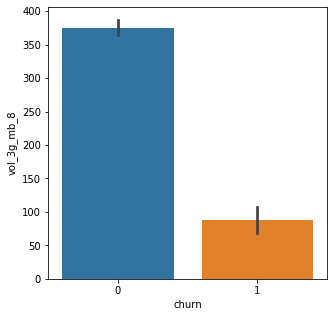

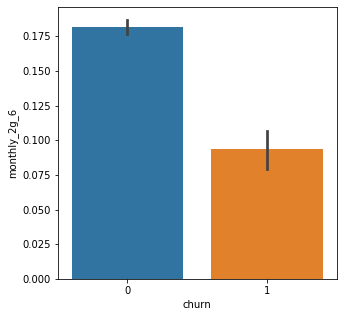

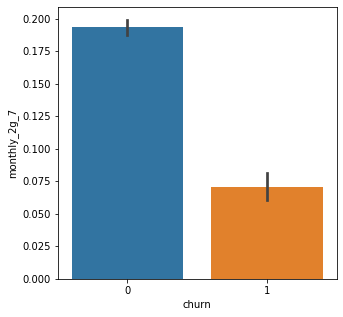

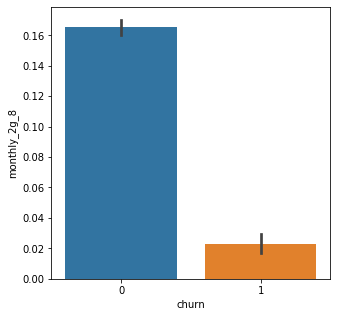

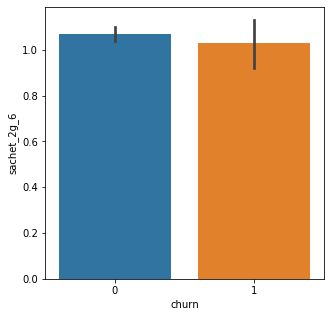

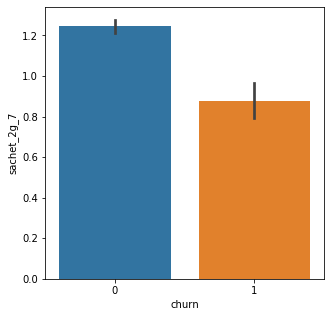

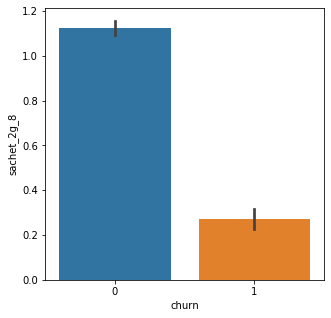

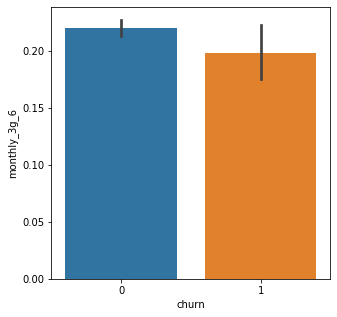

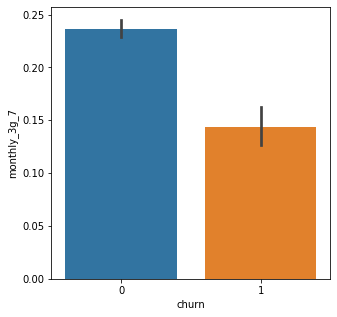

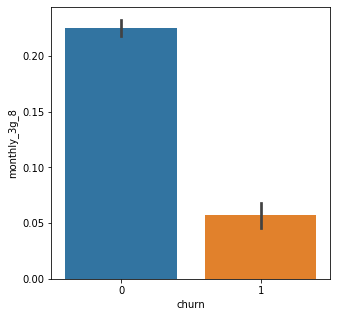

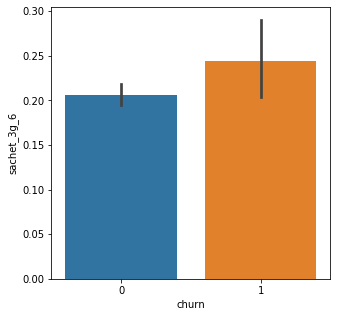

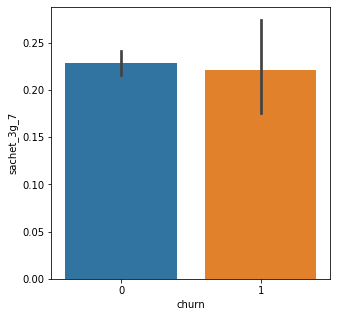

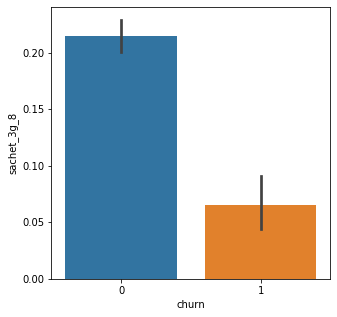

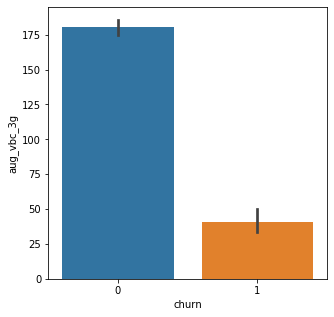

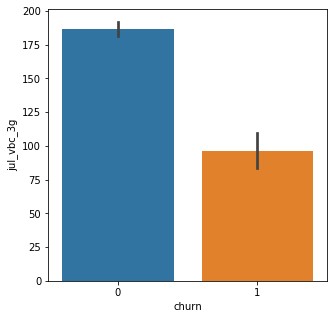

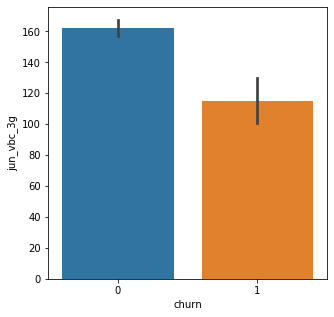

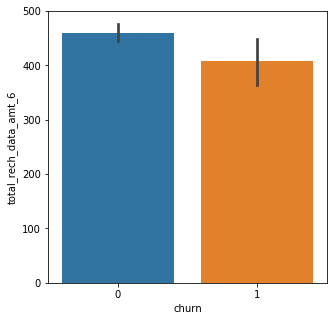

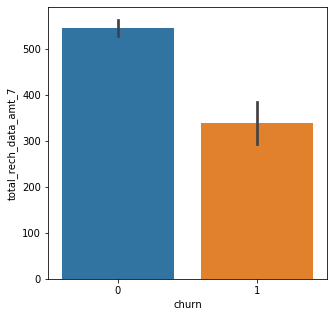

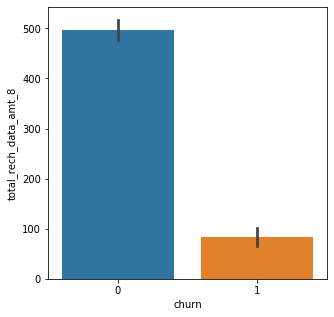

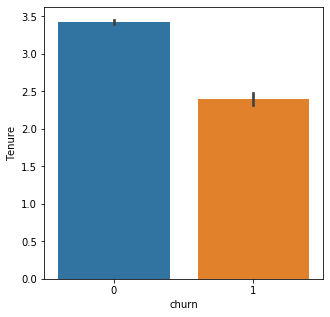

In [76]:
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=telecom_hv_cust)
    plt.show()

### 4.3) Conducting appropriate exploratory analysis to extract useful insights (whether directly useful for business or for eventual modelling/feature engineering).

### 4.3.1) Exploring ARPU

In [77]:
# create box plot for  6th, 7th and 8th month
def plot_bar_chart(attribute):
    plt.figure(figsize=(12,5))
    df = telecom_hv_cust
    plt.subplot(1,3,1)
    #"avg_"+col+"_avg6n7"
    sns.barplot(x='churn', y=attribute+"_6", data=telecom_hv_cust,palette=("bright"))
    plt.subplot(1,3,2)
    sns.barplot(x='churn', y=attribute+"_7", data=telecom_hv_cust,palette=("bright"))
    plt.subplot(1,3,3)
    sns.barplot(x='churn', y=attribute+"_8", data=telecom_hv_cust,palette=("bright"))
    plt.tight_layout()
    plt.show()

In [78]:
ARPU = [col for col in telecom_hv_cust.columns if 'arpu_' in col]
print(ARPU)

['arpu_6', 'arpu_7', 'arpu_8']


### Plotting ARPU for Voice Calls

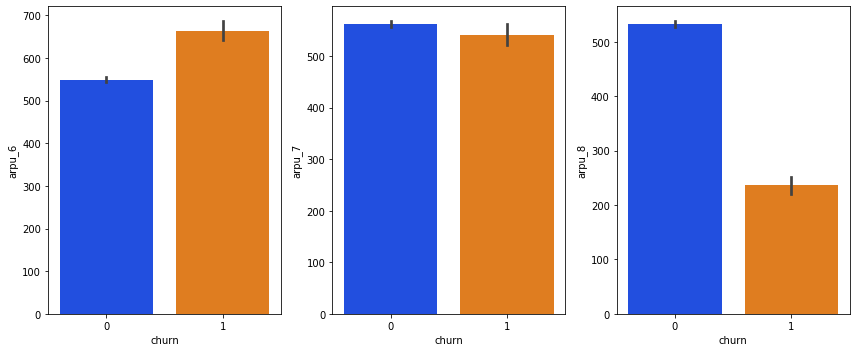

In [79]:
plot_bar_chart('arpu')

<div class="alert alert-block alert-info">
    
<b> INSIGHT: </b>
    
We could see the drop in the ARPU for churned customer in the 8th Month (Action Phase).
    
</div>

### 4.3.2)Exploring RECHARGES

In [80]:
RECHARGE = [col for col in telecom_hv_cust.columns if '_rech_' in col]
print(RECHARGE)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'total_rech_data_amt_6', 'total_rech_data_amt_7', 'total_rech_data_amt_8']


### Plotting Recharge Numbers/Frequency per Phase (Good / Action)

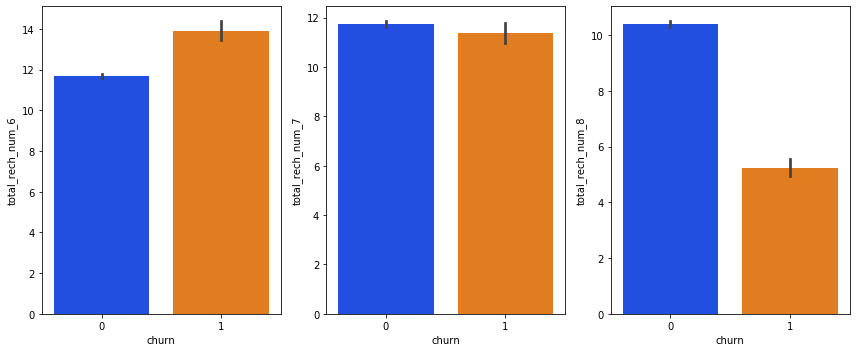

In [81]:
plot_bar_chart('total_rech_num')

### Plotting Total Recharge Amount per Phase (Good / Action)

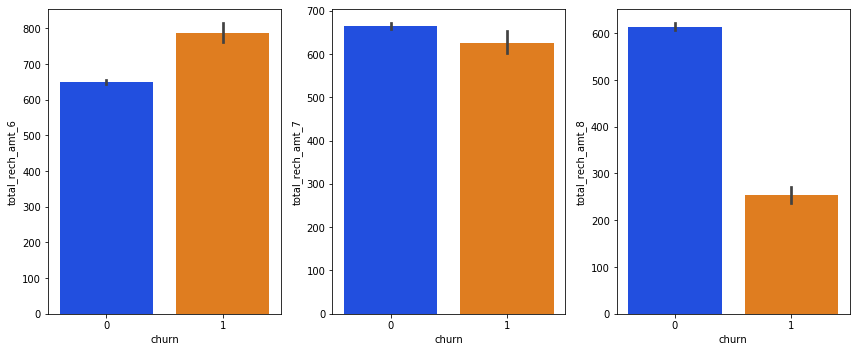

In [82]:
plot_bar_chart('total_rech_amt')

### Plotting Max Recharge Amount per Phase (Good / Action)

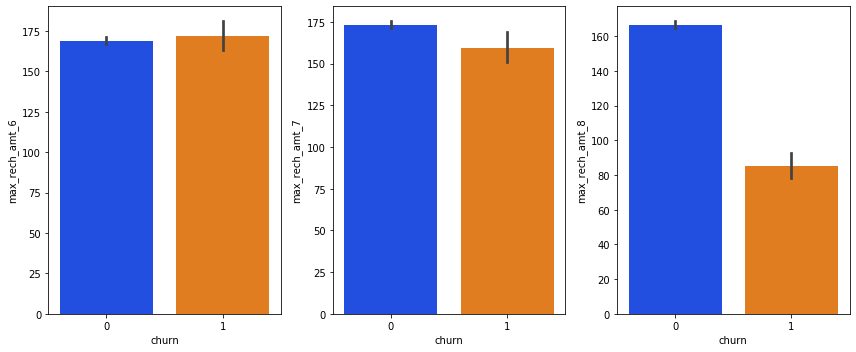

In [83]:
plot_bar_chart('max_rech_amt')

### Plotting Max Recharge Data per Phase (Good / Action)

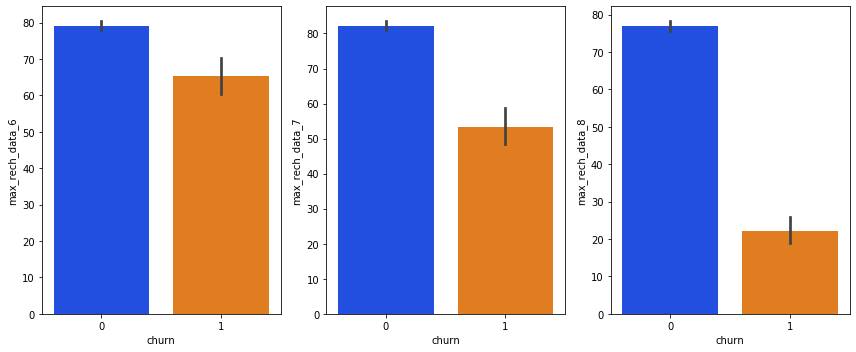

In [84]:
plot_bar_chart('max_rech_data')

### Plotting Total Recharge Data Amount per Phase (Good / Action)

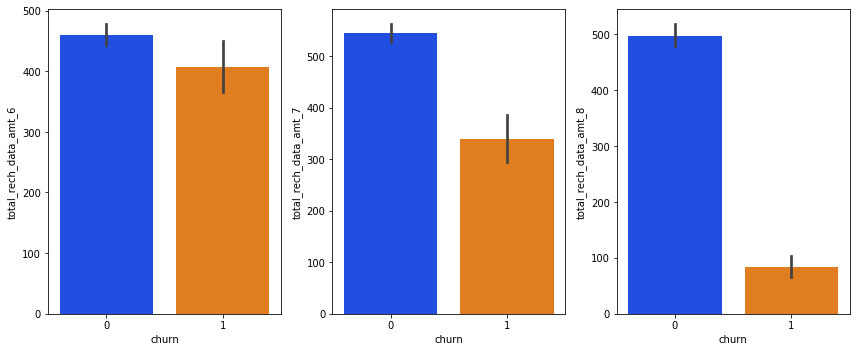

In [85]:
plot_bar_chart('total_rech_data_amt')

<div class="alert alert-block alert-info">
    
<b> INSIGHT: </b>
    
1. We could see a drop in the Recharge (Frequency & Amount) for the churned customer in the 8th Month (Action Phase).
2. We could see a drop in the Total Recharge amount for churned customers in the 8th Month (Action Phase).
3. We could see a drop in Maximum Recharge amount for churned customers in the 8th month (action phase).
4. We could see a drop in Maximum Recharge data for churned customers in the 8th month (action phase).    
4. We could see a drop in Total Recharge amount for data for churned customers in the 8th month (action phase).

    
</div>

### 4.3.3) Exploring MOU

In [86]:
MOU = [col for col in telecom_hv_cust.columns if '_mou_' in col]

print(MOU)

['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6'

### Plotting Outgoing International Minutes of Usage per Phase (Good / Action)

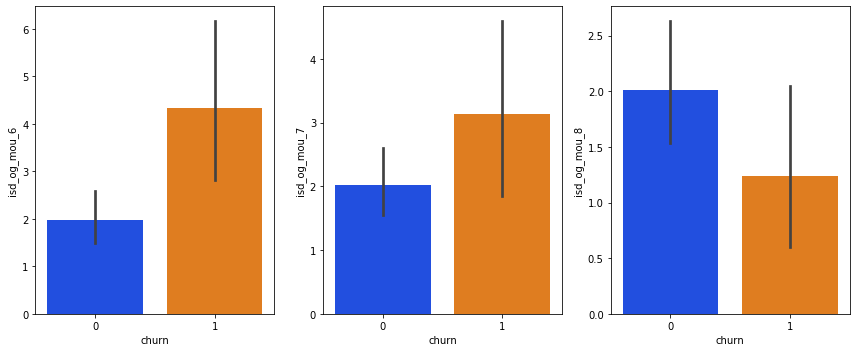

In [87]:
plot_bar_chart('isd_og_mou')

### Plotting Outgoing STD Minutes of Usage per Phase (Good / Action)

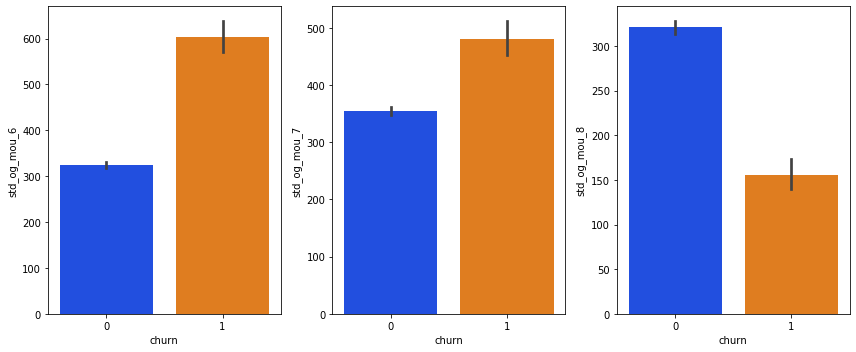

In [88]:
plot_bar_chart('std_og_mou')

### Plotting Outgoing Local Minutes of Usage per Phase (Good / Action)

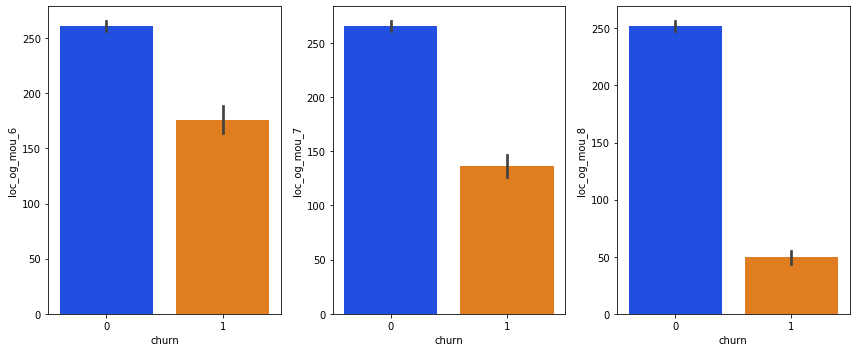

In [89]:
plot_bar_chart('loc_og_mou')

### Plotting Outgoing Roaming Minutes of Usage per Phase (Good / Action)

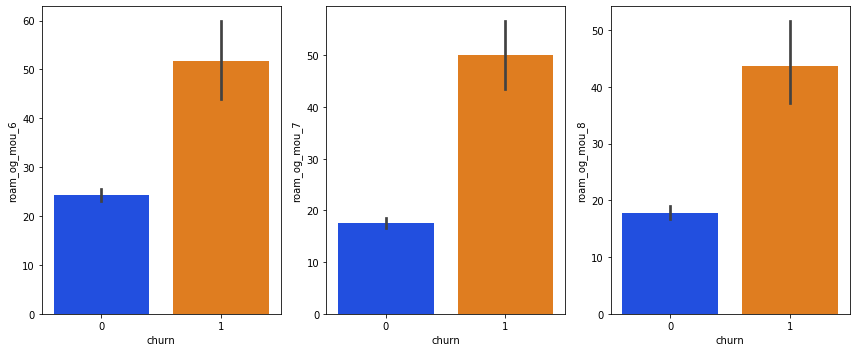

In [90]:
plot_bar_chart('roam_og_mou')

### Plotting On-Net Minutes of Usage per Phase (Good / Action)

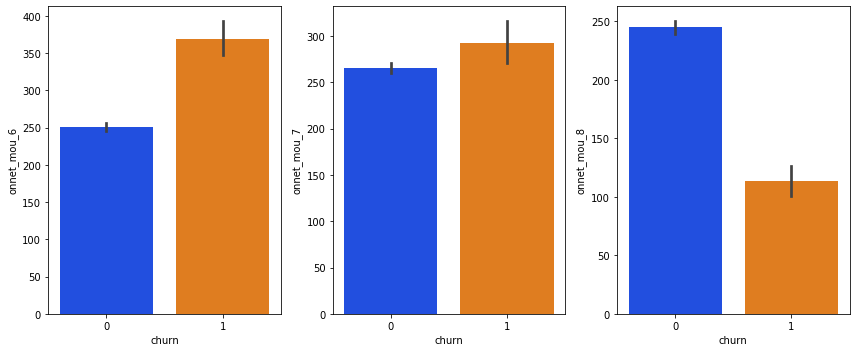

In [91]:
plot_bar_chart('onnet_mou')

### Plotting Off-Net Minutes of Usage per Phase (Good / Action)

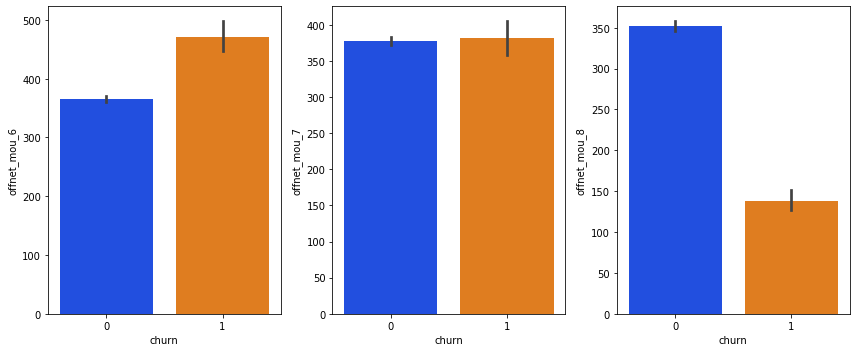

In [92]:
plot_bar_chart('offnet_mou')

### Plotting Total Outgoing  Minutes of Usage per Phase (Good / Action)

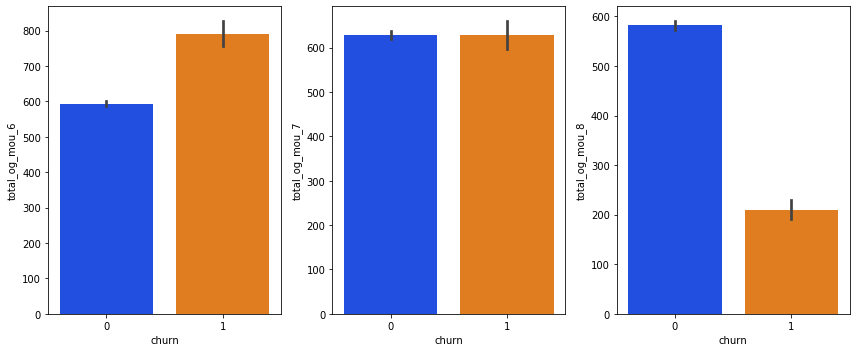

In [93]:
plot_bar_chart('total_og_mou')

<div class="alert alert-block alert-info">
    
<b> INSIGHT: </b>
    
We could see a drop in all the MOU variables for the churned customer in the 8th Month (Action Phase).    
    
</div>

### Scatter plot between Total recharge number and Average revenue per use

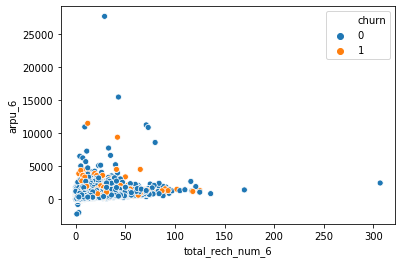

In [94]:
sns.scatterplot(x='total_rech_num_6', y='arpu_6', data=telecom_hv_cust, hue='churn')

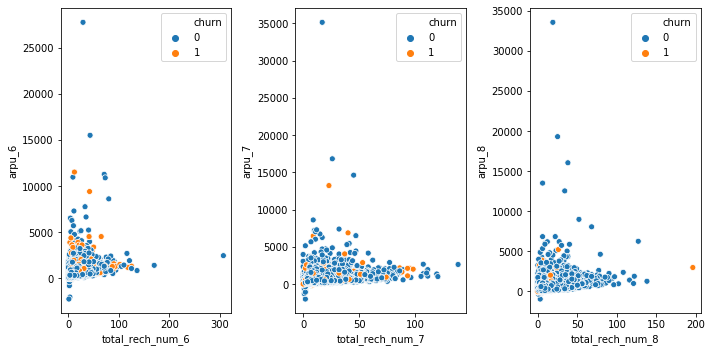

In [95]:
# lets now draw a scatter plot between total recharge number and Average revenue per use           
#from scipy import optimize

fig= plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='total_rech_num_6', y='arpu_6', data=telecom_hv_cust, hue='churn')
plt.subplot(1, 3, 2)
sns.scatterplot(x='total_rech_num_7', y='arpu_7', data=telecom_hv_cust, hue='churn')
plt.subplot(1, 3, 3)
sns.scatterplot(x='total_rech_num_8', y='arpu_8', data=telecom_hv_cust, hue='churn')
fig.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    
<b> INSIGHT: </b>
    
We could see a drop in arpu and total recharge number variables for the churned customer in the 8th Month (Action Phase).    
    
</div>

### Scatter plot between Tenure and Average revenue per use

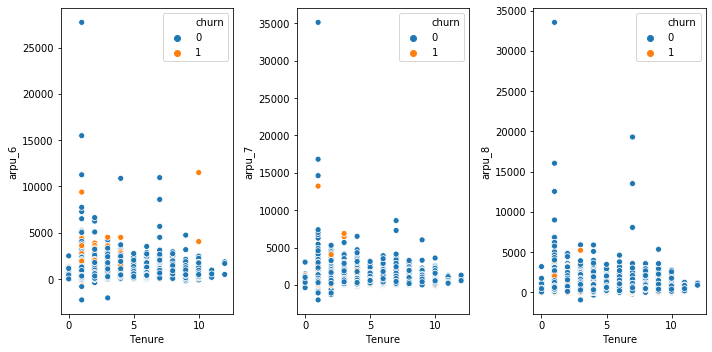

In [96]:
# plot between Tenure and Average revenue per use
fig, ax = plt.subplots(figsize=(10,5))
#fig= plt.figure(figsize=(10, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(x='Tenure', y='arpu_6', hue='churn', data=telecom_hv_cust)
plt.subplot(1, 3, 2)
sns.scatterplot(x='Tenure', y='arpu_7', hue='churn', data=telecom_hv_cust)
plt.subplot(1, 3, 3)
sns.scatterplot(x='Tenure', y='arpu_8', hue='churn', data=telecom_hv_cust)
#plt.xlabel('Tenure_mon')
#plt.ylabel('arpu_8')
fig.tight_layout()
plt.show()

<div class="alert alert-block alert-info">
    
<b> INSIGHT: </b>
    
We could see a drop in arpu variables for the churned customer in the 8th Month (Action Phase) and recent joint cutomers are churning more.    
    
</div>

#### We shall analyse the outgoing calls,incoming calls and the recharge done across the three months to see the increase and decrease in number

In [97]:
incoming_calls=telecom_hv_cust.filter(regex='total_ic_mou').columns
avg_ic_mon_calls=pd.DataFrame(telecom_hv_cust.groupby('Tenure',
                                                             as_index=False)[incoming_calls].mean())

avg_ic_mon_calls

Tenure  total_ic_mou_6  total_ic_mou_7  total_ic_mou_8
0      0.0      195.372444      218.856778      190.733111
1      1.0      235.291026      242.216376      224.551155
2      2.0      264.459021      269.386971      246.865465
3      3.0      285.800995      295.074208      278.132355
4      4.0      306.212811      314.826843      299.945626
5      5.0      352.835721      359.074788      337.883089
6      6.0      348.840431      354.301243      353.406368
7      7.0      379.912278      384.192625      368.345382
8      8.0      390.785042      399.027233      382.641345
9      9.0      376.461104      386.519779      377.644518
10    10.0      405.297881      408.511579      408.013227
11    11.0      464.702059      451.680588      415.940000
12    12.0      413.626667      396.713333      393.300000

In [98]:
outgoing_calls = telecom_hv_cust.filter(regex='total_og_mou').columns
avg_og_mon_calls = pd.DataFrame(telecom_hv_cust.groupby('Tenure',
                                                            as_index=False)[outgoing_calls].mean())
print(avg_og_mon_calls)

    Tenure  total_og_mou_6  total_og_mou_7  total_og_mou_8
0      0.0      687.816222      722.277222      591.782778
1      1.0      605.778611      630.292771      529.255129
2      2.0      654.083692      689.648883      585.166827
3      3.0      630.639118      639.796028      569.791793
4      4.0      616.946602      631.126602      566.979806
5      5.0      595.013475      599.259389      562.193134
6      6.0      585.840750      593.839549      563.441472
7      7.0      594.336846      602.048877      563.413979
8      8.0      550.788739      558.172004      523.573019
9      9.0      518.629367      512.549950      483.140321
10    10.0      556.344321      552.937632      532.899224
11    11.0      410.894706      414.671765      427.520882
12    12.0      489.610000      525.233333      406.490000


In [99]:
total_rech_data_amt = telecom_hv_cust.filter(regex='total_rech_data_amt').columns
avg_total_month_rech = pd.DataFrame(telecom_hv_cust.groupby('Tenure',
                                                        as_index=False)[total_rech_data_amt].mean())
print(avg_total_month_rech)

    Tenure  total_rech_data_amt_6  total_rech_data_amt_7  \
0      0.0             425.311111             575.711111   
1      1.0             520.802021             588.549573   
2      2.0             525.968126             601.355886   
3      3.0             457.852623             534.129497   
4      4.0             444.291843             535.603128   
5      5.0             384.160232             463.669324   
6      6.0             300.937153             398.269444   
7      7.0             318.301046             362.039075   
8      8.0             375.884939             456.117970   
9      9.0             301.640562             345.785141   
10    10.0             225.891967             291.988920   
11    11.0             158.588235             160.617647   
12    12.0            2688.000000             420.000000   

    total_rech_data_amt_8  
0              405.133333  
1              512.589241  
2              498.382116  
3              497.890081  
4              481.

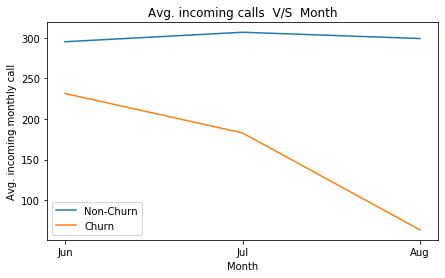

In [100]:
fig, ax = plt.subplots(figsize=(7,4))
df=telecom_hv_cust.groupby(['churn'])[incoming_calls].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug'])
## Add legend
plt.legend(['Non-Churn', 'Churn'])
# Add titles
plt.title("Avg. incoming calls  V/S  Month",fontsize=12)
plt.xlabel("Month")
plt.ylabel("Avg. incoming monthly call")
plt.show()

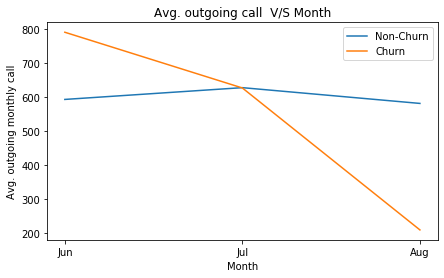

In [101]:
fig, ax = plt.subplots(figsize=(7,4))
df=telecom_hv_cust.groupby(['churn'])[outgoing_calls].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug'])
## Add legend
plt.legend(['Non-Churn', 'Churn'])
# Add titles
plt.title("Avg. outgoing call  V/S Month",fontsize=12)
plt.xlabel("Month")
plt.ylabel("Avg. outgoing monthly call")
plt.show()

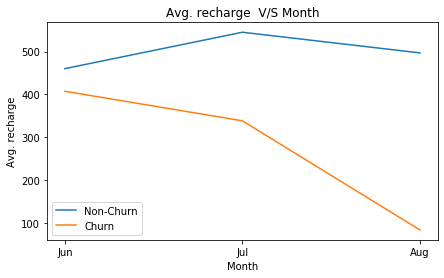

In [102]:
fig, ax = plt.subplots(figsize=(7,4))
df=telecom_hv_cust.groupby(['churn'])[total_rech_data_amt].mean().T
plt.plot(df)
ax.set_xticklabels(['Jun','Jul','Aug'])
## Add legend
plt.legend(['Non-Churn', 'Churn'])
# Add titles
plt.title("Avg. recharge  V/S Month",fontsize=12)
plt.xlabel("Month")
plt.ylabel("Avg. recharge")
plt.show()

 <div class="alert alert-block alert-info">
    
<b> INSIGHT: </b>
 
- For churning customer we can observe that there are significant dropping from June to July and then dropping sharply from July to Aug that is almost trending 0.
- For Non Churning customers we can observe that there is an increase in number from June to July but again there is a slight decrease from July to August.
- The outgoing calls,incoming calls and total recharge have been decreasing for all the churning customers.
</div>

### Step 5: Preparing the data for modelling

In [103]:
telecom_hv_cust.shape

(30001, 132)

In [104]:
telecom_hv_cust

mobile_number    arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
0         7000842753   197.385   214.816   213.803         0.00         0.00   
7         7000701601  1069.180  1349.850  3171.480        57.84        54.68   
8         7001524846   378.721   492.223   137.362       413.69       351.03   
21        7002124215   514.453   597.753   637.760       102.41       132.11   
23        7000887461    74.350   193.897   366.966        48.96        50.66   
...              ...       ...       ...       ...          ...          ...   
99981     7000630859   384.316   255.405   393.474        78.68        29.04   
99984     7000661676   328.594   202.966   118.707       423.99       181.83   
99986     7001729035   644.973   455.228   564.334       806.73       549.36   
99988     7002111859   312.558   512.932   402.080       199.89       174.46   
99997     7000498689   322.991   303.386   606.817         0.00         0.00   

       onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  \
0             0.00          0.00          0.00          0.00           0.00   
7            52.29        453.43        567.16        325.91          16.23   
8            35.08         94.66         80.63        136.48           0.00   
21           85.14        757.93        896.68        983.39           0.00   
23           33.58         85.41         89.36        205.89           0.00   
...            ...           ...           ...           ...            ...   
99981       103.24         56.13         28.09         61.44           0.00   
99984         5.71         39.51         39.81         18.26           0.00   
99986       775.41        784.76        617.13        595.44           0.00   
99988         2.46        175.88        277.01        248.33           0.00   
99997         0.00          0.00          0.00          0.00           0.00   

       roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  \
0               0.00           0.00           0.00           0.00   
7              33.49          31.64          23.74          12.59   
8               0.00           0.00           0.00           0.00   
21              0.00           0.00           0.00           0.00   
23              0.00           0.00           0.00           0.00   
...              ...            ...            ...            ...   
99981           0.00           0.00           0.00           0.00   
99984           0.00           0.00           0.00           0.00   
99986           0.00           0.00           0.00           0.00   
99988           0.00           0.00           0.00           0.00   
99997           0.00           0.00           0.00           0.00   

       roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  \
0               0.00              0.00              0.00              0.00   
7              38.06             51.39             31.38             40.28   
8               0.00            297.13            217.59             12.49   
21              0.00              4.48              6.16             23.34   
23              0.00             48.96             50.66             33.58   
...              ...               ...               ...               ...   
99981           0.00             72.53             29.04             89.23   
99984           0.00            423.99            181.83              5.71   
99986           0.00            709.21            496.14            718.56   
99988           0.00            170.28            146.48              2.46   
99997           0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_6  loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  \
0                  0.00              0.00              0.00              0.00   
7                308.63            447.38            162.28             62.13   
8                 80.96             70.58             50.54              0.00   
21     

### 5.1) Checking for Outliers

In [105]:
# Lets check the outliers
telecom_hv_cust.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   3.000100e+04  30001.000000  30001.000000  30001.000000  30001.000000   
mean    7.001206e+09    558.490824    560.782203    508.597957    260.793024   
std     6.908784e+05    460.640461    479.776947    501.961981    459.644368   
min     7.000000e+09  -2258.709000  -2014.045000   -945.808000      0.000000   
1%      7.000026e+09      1.000000      0.700000      0.000000      0.000000   
10%     7.000251e+09    171.605000    177.886000     84.000000      0.700000   
25%     7.000609e+09    309.865000    309.826000    231.473000     17.080000   
50%     7.001203e+09    481.694000    480.943000    427.585000     84.580000   
75%     7.001804e+09    699.943000    698.315000    661.491000    290.440000   
90%     7.002165e+09    994.099000    995.859000    977.345000    754.160000   
95%     7.002285e+09   1240.964000   1261.272000   1255.019000   1135.440000   
99%     7.002386e+09   1985.115000   1999.500000   1986.622000   2151.740000   
max     7.002411e+09  27731.088000  35145.834000  33543.624000   7376.710000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  30001.000000  30001.000000  30001.000000  30001.000000  30001.000000   
mean     267.819295    234.112539    373.693961    378.103169    335.077044   
std      479.993989    458.448598    482.523558    498.923555    482.062509   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
10%        0.580000      0.000000     11.260000     10.430000      2.200000   
25%       16.030000     10.390000     71.610000     69.910000     46.740000   
50%       82.810000     65.610000    222.540000    220.030000    182.790000   
75%      290.240000    239.960000    487.940000    494.010000    438.890000   
90%      784.480000    665.080000    895.830000    916.080000    823.680000   
95%     1185.790000   1074.590000   1256.610000   1272.290000   1167.540000   
99%     2201.960000   2159.110000   2326.360000   2410.890000   2193.130000   
max     8157.780000  10752.560000   8362.360000   9667.130000  14007.340000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   30001.000000   30001.000000   30001.000000   30001.000000   
mean       16.110355      12.642504      12.500551      26.571547   
std        76.302156      75.785903      74.125281     116.205525   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        27.390000      14.290000      15.010000      50.430000   
95%        84.540000      55.640000      56.350000     145.410000   
99%       342.440000     280.460000     282.190000     530.710000   
max      2613.310000    3813.290000    4169.810000    3775.110000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   30001.000000   30001.000000      30001.000000      30001.000000   
mean       20.152086      19.865615         84.484753         85.674287   
std        96.100428     104.719009        228.794004        240.525999   
min         0.000000       0.000000          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.380000          4.610000   
50%         0.000000       0.000000         24.330000         24.680000   
75%         0.000000       0.000000         77.980000         78.340000   
90%        31.090000      28.880000        187.930000        1

<div class="alert alert-block alert-info">

#### Inference:- We can clearly see that there is a huge gap between the 99th percentile and the maximum values in most of the columns of the dataframe. This clearly means that there are outliers in the dataset and they need to be treated. Lets use capping technique to cap the outliers in this dataframe.

#### Capping outliers in all numeric variables

In [106]:
# Capping outliers in all numeric variables

cont_cols = [col for col in telecom_hv_cust.columns if col not in ['churn','mobile_number']]
                                                                    
for col in cont_cols:
                
    Q1= telecom_hv_cust[col].quantile(0.01)
    Q3= telecom_hv_cust[col].quantile(0.99)
    IQR = Q3 - Q1
    telecom_hv_cust=telecom_hv_cust[(telecom_hv_cust[col] >= Q1 - 1.5*IQR) & (
                                                            telecom_hv_cust[col] <= Q3 + 1.5*IQR)]
telecom_hv_cust.shape

(26859, 132)

In [107]:
len(cont_cols)

130

In [108]:
telecom_hv_cust.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

mobile_number        arpu_6        arpu_7        arpu_8   onnet_mou_6  \
count   2.685900e+04  26859.000000  26859.000000  26859.000000  26859.000000   
mean    7.001205e+09    525.757944    523.030877    469.430064    249.831733   
std     6.913275e+05    336.888778    332.326785    355.939570    415.726678   
min     7.000000e+09   -810.661000   -897.035000   -345.129000      0.000000   
1%      7.000026e+09      2.221440      0.515400      0.000000      0.000000   
10%     7.000251e+09    167.873000    171.771200     78.183200      0.510000   
25%     7.000608e+09    301.457000    299.139500    220.100000     16.220000   
50%     7.001199e+09    469.772000    467.459000    412.380000     82.810000   
75%     7.001804e+09    674.029500    668.561500    631.121000    286.350000   
90%     7.002165e+09    934.528600    927.686200    905.327200    740.064000   
95%     7.002286e+09   1146.534600   1140.177700   1141.096100   1105.531000   
99%     7.002386e+09   1679.311100   1644.130660   1682.956200   1981.854200   
max     7.002411e+09   4497.680000   4212.269000   4822.844000   5012.190000   

        onnet_mou_7   onnet_mou_8  offnet_mou_6  offnet_mou_7  offnet_mou_8  \
count  26859.000000  26859.000000  26859.000000  26859.000000  26859.000000   
mean     253.619678    219.429554    359.124963    361.401428    316.618361   
std      423.865684    399.172731    448.640778    458.671009    428.590568   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
1%         0.000000      0.000000      0.000000      0.000000      0.000000   
10%        0.400000      0.000000      9.904000      8.906000      1.630000   
25%       15.080000      9.540000     67.475000     65.640000     42.280000   
50%       80.040000     62.860000    214.790000    211.330000    173.280000   
75%      284.590000    233.065000    475.305000    478.920000    421.960000   
90%      761.172000    642.994000    871.644000    891.024000    790.422000   
95%     1129.625000   1026.662000   1213.500000   1229.087000   1122.320000   
99%     1990.311800   1930.197600   2161.264600   2218.744000   2028.746000   
max     4730.640000   4744.480000   5081.010000   5194.830000   5184.110000   

       roam_ic_mou_6  roam_ic_mou_7  roam_ic_mou_8  roam_og_mou_6  \
count   26859.000000   26859.000000   26859.000000   26859.000000   
mean       12.784711       8.855358       8.897634      21.859126   
std        52.507862      41.648307      40.497359      83.900066   
min         0.000000       0.000000       0.000000       0.000000   
1%          0.000000       0.000000       0.000000       0.000000   
10%         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       0.000000       0.000000       0.000000   
50%         0.000000       0.000000       0.000000       0.000000   
75%         0.000000       0.000000       0.000000       0.000000   
90%        24.080000      11.814000      12.742000      45.912000   
95%        72.094000      45.118000      45.713000     132.560000   
99%       276.649000     207.044000     209.540000     454.348400   
max       838.330000     653.480000     655.540000    1216.980000   

       roam_og_mou_7  roam_og_mou_8  loc_og_t2t_mou_6  loc_og_t2t_mou_7  \
count   26859.000000   26859.000000      26859.000000      26859.000000   
mean       15.226094      14.524715         75.206801         74.470481   
std        63.574260      59.890547        165.922797        161.111030   
min         0.000000       0.000000          0.000000          0.000000   
1%          0.000000       0.000000          0.000000          0.000000   
10%         0.000000       0.000000          0.000000          0.000000   
25%         0.000000       0.000000          4.260000          4.460000   
50%         0.000000       0.000000         23.610000         23.930000   
75%         0.000000       0.000000         75.530000         75.170000   
90%        26.940000      24.330000        178.782000        1

In [109]:
# Identifying if any column exists with only null values
telecom_hv_cust.isnull().all(axis=0).any()

False

In [110]:
telecom_hv_cust.og_others_8.value_counts()

0.0    26859
Name: og_others_8, dtype: int64

In [111]:
# Dropping the 'og_others_8' variable, as it has zeroe values in all the rows
telecom_hv_cust.drop('og_others_8', axis=1, inplace=True)

### 5.2) Splitting the Data  into X & y

In [112]:
from sklearn.model_selection import train_test_split

# Putting feature variable to X
X = telecom_hv_cust.drop(['churn','mobile_number'],axis=1)

# Putting response variable to y
y = telecom_hv_cust['churn']

In [113]:
X

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
0       197.385   214.816   213.803         0.00         0.00         0.00   
7      1069.180  1349.850  3171.480        57.84        54.68        52.29   
8       378.721   492.223   137.362       413.69       351.03        35.08   
21      514.453   597.753   637.760       102.41       132.11        85.14   
23       74.350   193.897   366.966        48.96        50.66        33.58   
...         ...       ...       ...          ...          ...          ...   
99981   384.316   255.405   393.474        78.68        29.04       103.24   
99984   328.594   202.966   118.707       423.99       181.83         5.71   
99986   644.973   455.228   564.334       806.73       549.36       775.41   
99988   312.558   512.932   402.080       199.89       174.46         2.46   
99997   322.991   303.386   606.817         0.00         0.00         0.00   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
0              0.00          0.00          0.00           0.00           0.00   
7            453.43        567.16        325.91          16.23          33.49   
8             94.66         80.63        136.48           0.00           0.00   
21           757.93        896.68        983.39           0.00           0.00   
23            85.41         89.36        205.89           0.00           0.00   
...             ...           ...           ...            ...            ...   
99981         56.13         28.09         61.44           0.00           0.00   
99984         39.51         39.81         18.26           0.00           0.00   
99986        784.76        617.13        595.44           0.00           0.00   
99988        175.88        277.01        248.33           0.00           0.00   
99997          0.00          0.00          0.00           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
0               0.00           0.00           0.00           0.00   
7              31.64          23.74          12.59          38.06   
8               0.00           0.00           0.00           0.00   
21              0.00           0.00           0.00           0.00   
23              0.00           0.00           0.00           0.00   
...              ...            ...            ...            ...   
99981           0.00           0.00           0.00           0.00   
99984           0.00           0.00           0.00           0.00   
99986           0.00           0.00           0.00           0.00   
99988           0.00           0.00           0.00           0.00   
99997           0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
0                  0.00              0.00              0.00              0.00   
7                 51.39             31.38             40.28            308.63   
8                297.13            217.59             12.49             80.96   
21                 4.48              6.16             23.34             91.81   
23                48.96             50.66             33.58             82.94   
...                 ...               ...               ...               ...   
99981             72.53             29.04             89.23             52.21   
99984            423.99            181.83              5.71             17.96   
99986            709.21            496.14            718.56            574.93   
99988            170.28            146.48              2.46            137.83   
99997              0.00              0.00              0.00              0.00   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
0                  0.00              0.00              0.00              0.00   
7                447.38            162.28             62.13             55.14   
8                 70.58             50.54             

In [114]:
X.shape, y.shape

((26859, 129), (26859,))

### 5.3) Test-Train Split

In [115]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3,stratify = y,random_state=100)

print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (18801, 129)
y_train:  (18801,)
X_test:  (8058, 129)
y_test:  (8058,)


In [116]:
X_train

arpu_6    arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
59748   187.046   192.482  157.962         0.44         2.44         2.53   
31024   208.821   223.819  232.520         0.00         0.00         0.00   
78814   628.690   793.396  282.521       421.38       560.38       223.58   
1005    425.771   840.149  618.523        97.66       153.91       317.21   
27382   927.700   507.009  486.155       237.08        75.99        60.43   
...         ...       ...      ...          ...          ...          ...   
65754   568.124  1040.995  554.750       812.08      2159.98       876.46   
43634   913.361   243.318   17.362      1197.63       122.19        10.56   
77376  1464.571  1153.011  867.697       138.58       255.83       934.76   
50660   362.989   252.285  126.547        46.61         5.96        61.04   
83339  1123.783    20.500  835.120       676.38         0.58       511.04   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
59748          1.99         12.51          4.56           0.00           0.00   
31024          0.00          0.00          0.00           0.00           0.00   
78814        250.56        169.31         87.79           0.00           0.00   
1005         387.84        653.16        577.73           0.00         296.23   
27382       1212.84        629.81       1013.78           0.00           0.00   
...             ...           ...           ...            ...            ...   
65754        108.56        262.83        161.53           0.00           0.00   
43634       1006.84         63.19          3.65           7.31           2.61   
77376       2412.31       1061.64        764.83           0.00           0.00   
50660        118.11         81.94         57.06           0.00           0.00   
83339       1334.13          4.44       1450.39          15.59           8.08   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
59748           0.00           0.00           0.00            0.0   
31024           0.00           0.00           0.00            0.0   
78814           0.00           0.00           0.00            0.0   
1005           45.83           0.00         172.24           36.4   
27382           0.00           0.00           0.00            0.0   
...              ...            ...            ...            ...   
65754           0.00           0.00           0.00            0.0   
43634           0.90          52.94          83.99            0.0   
77376           0.00           0.28           0.00            0.0   
50660           0.00           0.00           0.00            0.0   
83339           0.51         148.41           5.03            0.0   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
59748              0.44              2.44              2.53              1.99   
31024              0.00              0.00              0.00              0.00   
78814            304.93            353.09            144.64            134.43   
1005              74.23            102.29            210.18            335.11   
27382             45.18             16.63              2.26            230.56   
...                 ...               ...               ...               ...   
65754             47.79             88.88             43.16             43.14   
43634             25.48              0.65              0.00             89.08   
77376            136.28            255.83            934.76           2401.48   
50660              6.83              5.96             14.91             54.06   
83339             48.66              0.00             10.24            139.14   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
59748              5.73              4.56              0.00              0.35   
31024              0.00              0.00              0.00              0.00   
78814             84.71             57.26              0.85       

In [117]:
X_test

arpu_6   arpu_7   arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
1856     79.241  201.624  119.957         0.00         0.20         0.00   
23195   101.428  179.197   64.824         2.64         7.93         0.23   
39180   285.919  867.784  188.849       146.46       309.23        63.19   
51612   219.003  243.274    0.000         1.90         4.79         0.00   
69554   303.511  379.953  395.028        11.06        20.33        50.13   
...         ...      ...      ...          ...          ...          ...   
83851  1036.564  119.738   86.119       236.23        49.69         0.98   
98979  1419.971  748.026  586.043       128.13       171.99        72.91   
52980   722.922  681.043  685.221       530.31       656.91       701.08   
96011   635.049  313.943  477.287      1047.38       602.34       704.39   
86344   443.836  311.722  493.297       292.41       280.43       195.38   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
1856          15.68         26.68          1.33           0.00           0.00   
23195         47.69         50.54          8.94           0.00           0.00   
39180        348.81       1275.84        362.03           0.00           0.00   
51612          0.00         12.06          0.00           0.00           0.00   
69554         99.14        111.03        212.66           0.00           0.00   
...             ...           ...           ...            ...            ...   
83851        397.74         21.78         39.34          11.74          20.44   
98979       1030.54        377.39        426.29          46.48           0.00   
52980        689.29        493.86        540.08           0.00           0.00   
96011        311.49         98.66         77.44           0.00          28.24   
86344        131.86         86.93        115.54           0.00           0.00   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
1856            0.00           0.00           0.00           0.00   
23195           0.00           0.00           0.00           0.00   
39180           0.00           0.00           0.00           5.98   
51612           0.00           0.00           0.00           0.00   
69554           0.00           0.00           0.00           0.00   
...              ...            ...            ...            ...   
83851          18.09          19.54          71.48          40.33   
98979           7.91         504.41           0.00          72.74   
52980           0.00           0.00           0.00           0.00   
96011          75.08           0.00          17.43         179.76   
86344           0.00           0.00           0.00           0.00   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
1856               0.00              0.20              0.00              5.13   
23195              2.64              7.93              0.23             46.36   
39180              4.41            137.38             30.51             28.06   
51612              0.00              0.00              0.00              0.00   
69554             11.06             18.59             49.81             82.68   
...                 ...               ...               ...               ...   
83851              3.73              0.00              0.00            177.08   
98979             34.91             21.36              5.56            490.79   
52980             29.76             32.14             20.18             29.59   
96011             83.43             51.54             56.21             78.53   
86344            292.41            280.43            195.38            119.96   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
1856              11.46              0.00               0.0              0.00   
23195             49.31              7.59               0.0              0.00   
39180             70.19             28.14               0.0              0.00 

#### Checking for Class imbalance in Train & Test

In [118]:
y_train.value_counts(normalize=True)

0    0.91926
1    0.08074
Name: churn, dtype: float64

In [119]:
y_test.value_counts(normalize=True)

0    0.919211
1    0.080789
Name: churn, dtype: float64

### 5.4)  Feature Scaling

In [120]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18801 entries, 59748 to 83339
Columns: 129 entries, arpu_6 to Tenure
dtypes: float64(105), int64(24)
memory usage: 18.6 MB


In [121]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#numerical features
num_cols = [col for col in X_train.columns]

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler()
    
    # transform the training data column
    X_train[i] = scale.fit_transform(X_train[[i]])

    # transform the testing data column
    X_test[i] = scale.transform(X_test[[i]])

In [122]:
X_train

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
59748 -0.996811 -0.992722 -0.872609    -0.599102    -0.595687    -0.541702   
31024 -0.932330 -0.897938 -0.661891    -0.600160    -0.601516    -0.548054   
78814  0.311007  0.824839 -0.520576     0.413509     0.737264     0.013295   
1005  -0.289887  0.966251  0.429043    -0.365230    -0.233816     0.248375   
27382  1.196451 -0.041385  0.054941    -0.029842    -0.419972    -0.396331   
...         ...       ...       ...          ...          ...          ...   
65754  0.131656  1.573742  0.248806     1.353375     4.558801     1.652501   
43634  1.153989 -0.838960 -1.269977     2.280851    -0.309597    -0.521541   
77376  2.786260  1.912552  1.133267    -0.266793     0.009676     1.798877   
50660 -0.475800 -0.811838 -0.961395    -0.488035    -0.587277    -0.394799   
83339  1.777101 -1.512909  1.041197     1.026935    -0.600131     0.735030   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
59748     -0.791725     -0.756289     -0.723297      -0.244438      -0.210468   
31024     -0.796142     -0.783603     -0.733882      -0.244438      -0.210468   
78814     -0.240073     -0.413930     -0.530093      -0.244438      -0.210468   
1005       0.064593      0.642512      0.607220      -0.244438       6.899801   
27382      1.895520      0.591529      1.619436      -0.244438      -0.210468   
...             ...           ...           ...            ...            ...   
65754     -0.555214     -0.209738     -0.358918      -0.244438      -0.210468   
43634      1.438343     -0.645633     -0.725409      -0.101292      -0.147821   
77376      4.557510      1.534390      1.041541      -0.244438      -0.210468   
50660     -0.534020     -0.604695     -0.601427      -0.244438      -0.210468   
83339      2.164699     -0.773909      2.632952       0.060848      -0.016527   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
59748      -0.215502      -0.261172      -0.240672      -0.240127   
31024      -0.215502      -0.261172      -0.240672      -0.240127   
78814      -0.215502      -0.261172      -0.240672      -0.240127   
1005        0.910412      -0.261172       2.519647       0.368152   
27382      -0.215502      -0.261172      -0.240672      -0.240127   
...              ...            ...            ...            ...   
65754      -0.215502      -0.261172      -0.240672      -0.240127   
43634      -0.193392       0.371924       1.105352      -0.240127   
77376      -0.215502      -0.257824      -0.240672      -0.240127   
50660      -0.215502      -0.261172      -0.240672      -0.240127   
83339      -0.202973       1.513627      -0.160061      -0.240127   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
59748         -0.447166         -0.446199         -0.446190         -0.669493   
31024         -0.449800         -0.461364         -0.463646         -0.678057   
78814          1.375520          1.733033          0.534285         -0.099557   
1005          -0.005457          0.174352          0.986472          0.764039   
27382         -0.179351         -0.358011         -0.448053          0.314124   
...                 ...               ...               ...               ...   
65754         -0.163728          0.091011         -0.165867         -0.492410   
43634         -0.297276         -0.457324         -0.463646         -0.294714   
77376          0.365976          1.128578          5.985647          9.656352   
50660         -0.408916         -0.424323         -0.360776         -0.445418   
83339         -0.158520         -0.461364         -0.392996         -0.079289   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
59748         -0.678251         -0.655084         -0.363715         -0.349748   
31024         -0.703986         -0.676314         -0.363715         -0.374296   
78814         -0.323523         -0.409739         -0.3

In [123]:
X_test

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  onnet_mou_8  \
1856  -1.316049 -0.965070 -0.980020    -0.600160    -0.601038    -0.548054   
23195 -1.250347 -1.032904 -1.135838    -0.593809    -0.582571    -0.547477   
39180 -0.704023  1.049837 -0.785315    -0.247837     0.137252    -0.389401   
51612 -0.902178 -0.839093 -1.319046    -0.595590    -0.590073    -0.548054   
69554 -0.651929 -0.425686 -0.202605    -0.573554    -0.552947    -0.422191   
...         ...       ...       ...          ...          ...          ...   
83851  1.518824 -1.212748 -1.075654    -0.031887    -0.482804    -0.545594   
98979  2.654188  0.687610  0.337247    -0.291931    -0.190622    -0.364997   
52980  0.590052  0.485009  0.617547     0.675550     0.967880     1.212169   
96011  0.329838 -0.625344  0.029878     1.919411     0.837509     1.220480   
86344 -0.236392 -0.632061  0.075126     0.103260     0.068447    -0.057507   

       offnet_mou_6  offnet_mou_7  offnet_mou_8  roam_ic_mou_6  roam_ic_mou_7  \
1856      -0.761343     -0.725350     -0.730795      -0.244438      -0.210468   
23195     -0.690303     -0.673254     -0.713129      -0.244438      -0.210468   
39180     -0.022026      2.002076      0.106509      -0.244438      -0.210468   
51612     -0.796142     -0.757271     -0.733882      -0.244438      -0.210468   
69554     -0.576120     -0.541179     -0.240228      -0.244438      -0.210468   
...             ...           ...           ...            ...            ...   
83851      0.086564     -0.736048     -0.642561      -0.014543       0.280144   
98979      1.490941      0.040393      0.255678       0.665741      -0.210468   
52980      0.733603      0.294695      0.519822      -0.244438      -0.210468   
96011     -0.104851     -0.568188     -0.554118      -0.244438       0.467364   
86344     -0.503504     -0.593799     -0.465676      -0.244438      -0.210468   

       roam_ic_mou_8  roam_og_mou_6  roam_og_mou_7  roam_og_mou_8  \
1856       -0.215502      -0.261172      -0.240672      -0.240127   
23195      -0.215502      -0.261172      -0.240672      -0.240127   
39180      -0.215502      -0.261172      -0.240672      -0.140195   
51612      -0.215502      -0.261172      -0.240672      -0.240127   
69554      -0.215502      -0.261172      -0.240672      -0.240127   
...              ...            ...            ...            ...   
83851       0.228918      -0.027498       0.904867       0.433826   
98979      -0.021176       5.770944      -0.240672       0.975428   
52980      -0.215502      -0.261172      -0.240672      -0.240127   
96011       1.629002      -0.261172       0.038661       2.763834   
86344      -0.215502      -0.261172      -0.240672      -0.240127   

       loc_og_t2t_mou_6  loc_og_t2t_mou_7  loc_og_t2t_mou_8  loc_og_t2m_mou_6  \
1856          -0.449800         -0.460121         -0.463646         -0.655981   
23195         -0.433997         -0.412080         -0.462059         -0.478553   
39180         -0.423402          0.392430         -0.253145         -0.557305   
51612         -0.449800         -0.461364         -0.463646         -0.678057   
69554         -0.383595         -0.345830         -0.119986         -0.322256   
...                 ...               ...               ...               ...   
83851         -0.427472         -0.461364         -0.463646          0.083980   
98979         -0.240828         -0.328615         -0.425285          1.433984   
52980         -0.271656         -0.261619         -0.324416         -0.550721   
96011          0.049614         -0.141051         -0.075830         -0.340115   
86344          1.300575          1.281463          0.884361         -0.161827   

       loc_og_t2m_mou_7  loc_og_t2m_mou_8  loc_og_t2f_mou_6  loc_og_t2f_mou_7  \
1856          -0.652515         -0.676314         -0.363715         -0.374296   
23195         -0.482518         -0.640978         -0.363715         -0.374296   
39180         -0.388738         -0.545307         -0.3

### 5.5) Looking at Correlations

In [124]:
# lets check the correlation amongst the features, drop the highly correlated ones
cor = X_train.corr()
cor

arpu_6    arpu_7    arpu_8  onnet_mou_6  onnet_mou_7  \
arpu_6                 1.000000  0.571898  0.480524     0.449459     0.279941   
arpu_7                 0.571898  1.000000  0.676494     0.296968     0.445740   
arpu_8                 0.480524  0.676494  1.000000     0.208298     0.318618   
onnet_mou_6            0.449459  0.296968  0.208298     1.000000     0.751670   
onnet_mou_7            0.279941  0.445740  0.318618     0.751670     1.000000   
onnet_mou_8            0.242136  0.374684  0.482737     0.614024     0.795589   
offnet_mou_6           0.605738  0.411703  0.307479     0.085798     0.036239   
offnet_mou_7           0.397304  0.602225  0.440947     0.049731     0.090463   
offnet_mou_8           0.337060  0.489366  0.636528     0.043680     0.084288   
roam_ic_mou_6          0.124146  0.089554  0.094341     0.012432     0.034371   
roam_ic_mou_7          0.091133  0.107377  0.066578     0.036754     0.003114   
roam_ic_mou_8          0.097359  0.104877  0.093153     0.055323     0.040088   
roam_og_mou_6          0.188415  0.127723  0.125204     0.066297     0.079960   
roam_og_mou_7          0.124597  0.154846  0.091568     0.090078     0.054944   
roam_og_mou_8          0.128442  0.146231  0.158279     0.096424     0.086688   
loc_og_t2t_mou_6       0.248554  0.168455  0.158627     0.357029     0.235015   
loc_og_t2t_mou_7       0.194848  0.253111  0.215454     0.265323     0.339610   
loc_og_t2t_mou_8       0.185805  0.222411  0.302755     0.226352     0.262871   
loc_og_t2m_mou_6       0.437546  0.294655  0.281762     0.018246    -0.025978   
loc_og_t2m_mou_7       0.337948  0.418785  0.367456     0.002616     0.015941   
loc_og_t2m_mou_8       0.309140  0.358862  0.490353    -0.008976     0.003570   
loc_og_t2f_mou_6       0.195324  0.149657  0.165735    -0.034041    -0.046316   
loc_og_t2f_mou_7       0.151531  0.181432  0.186582    -0.047844    -0.043179   
loc_og_t2f_mou_8       0.140041  0.158215  0.226010    -0.048741    -0.044428   
loc_og_t2c_mou_6       0.069719  0.014821  0.000789     0.049397     0.032830   
loc_og_t2c_mou_7      -0.000693  0.061822  0.016167     0.032246     0.062994   
loc_og_t2c_mou_8       0.009722  0.038554  0.086764     0.038994     0.055444   
loc_og_mou_6           0.450438  0.304707  0.291131     0.195474     0.100367   
loc_og_mou_7           0.348639  0.437756  0.381932     0.136536     0.184579   
loc_og_mou_8           0.318358  0.372624  0.509046     0.101026     0.127927   
std_og_t2t_mou_6       0.361194  0.236201  0.144726     0.910157     0.694348   
std_og_t2t_mou_7       0.210638  0.362752  0.246059     0.682577     0.920251   
std_og_t2t_mou_8       0.179064  0.306013  0.389807     0.557466     0.738990   
std_og_t2m_mou_6       0.402700  0.276259  0.164122     0.088597     0.056825   
std_og_t2m_mou_7       0.246095  0.426768  0.280102     0.053619     0.094112   
std_og_t2m_mou_8       0.194118  0.338738  0.428021     0.054026     0.093592   
std_og_t2f_mou_6       0.083065  0.063376  0.063553    -0.029081    -0.035791   
std_og_t2f_mou_7       0.061028  0.076153  0.074441    -0.033780    -0.029177   
std_og_t2f_mou_8       0.053904  0.060161  0.098244    -0.032204    -0.029826   
std_og_mou_6           0.512684  0.344063  0.207574     0.664995     0.499930   
std_og_mou_7           0.306407  0.529460  0.352940     0.485084     0.668965   
std_og_mou_8           0.245602  0.424063  0.538074     0.402492     0.548050   
isd_og_mou_6           0.105273  0.028526  0.016802    -0.029100    -0.034714   
isd_og_mou_7           0.028905  0.092240  0.029312    -0.028196    -0.024628   
isd_og_mou_8           0.055315  0.074782  0.096464    -0.015611    -0.017007   
spl_og_mou_6           0.137348  0.055238  0.022830     0.093295     0.054989   
spl_og_mou_7           0.052825  0.134973  0.053706     0.086457     0.130017   
spl_og_mou_8           0.045906  0.105942  0.165641     0.075395     0.114534   
og_others_6            0.154146  0.072821  0.030401     

In [125]:
# lets check the correlation amongst the features, drop the highly correlated ones
import numpy as np
cor.loc[:,:] = np.tril(cor, k=-1)
cor = cor.stack()
cor[(cor > 0.70) | (cor < -0.70)].sort_values()

total_ic_mou_8    loc_ic_mou_6        0.700225
total_og_mou_7    arpu_7              0.701246
loc_og_mou_7      loc_og_t2m_mou_6    0.701796
std_og_mou_8      onnet_mou_8         0.704907
total_og_mou_6    onnet_mou_6         0.705830
total_og_mou_7    total_og_mou_6      0.706988
                  onnet_mou_7         0.707055
total_ic_mou_6    loc_ic_mou_8        0.707493
loc_ic_t2m_mou_8  loc_ic_t2m_mou_6    0.708615
loc_og_mou_6      loc_og_t2m_mou_7    0.708769
total_rech_amt_8  total_og_mou_8      0.709013
total_ic_mou_7    loc_ic_t2m_mou_6    0.709496
loc_og_t2m_mou_8  loc_og_t2m_mou_6    0.712295
loc_og_mou_6      loc_og_t2t_mou_6    0.712514
std_ic_t2m_mou_8  std_ic_t2m_mou_7    0.713664
roam_og_mou_6     roam_ic_mou_6       0.713762
total_ic_mou_8    total_ic_mou_6      0.715310
loc_og_mou_7      loc_og_t2t_mou_7    0.715637
sachet_2g_8       sachet_2g_7         0.720124
loc_og_mou_8      loc_og_t2t_mou_8    0.721076
roam_og_mou_8     roam_ic_mou_8       0.722612
std_ic_mou_8 

 <div class="alert alert-block alert-success">
    
#### Highly correlated variables will be managed by RFE 

In [126]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (18801, 129)
y_train:  (18801,)
X_test:  (8058, 129)
y_test:  (8058,)


In [127]:
X_train.shape, X_test.shape

((18801, 129), (8058, 129))

### 5.6) Checking for Class imbalance in Train & Test and treating it

**SMOTE - Synthetic Minority Oversampling Technique**
Creates new "Synthetic" observations

Process: - 
1. Identify the feature vector and its nearest neighbour
2. Take the difference between the two
3. Multiply the difference with a random number between 0 and 1
4. Identify a new point on the line segment by adding the random number to feature vector
5. Repeat the process for identified feature vectors

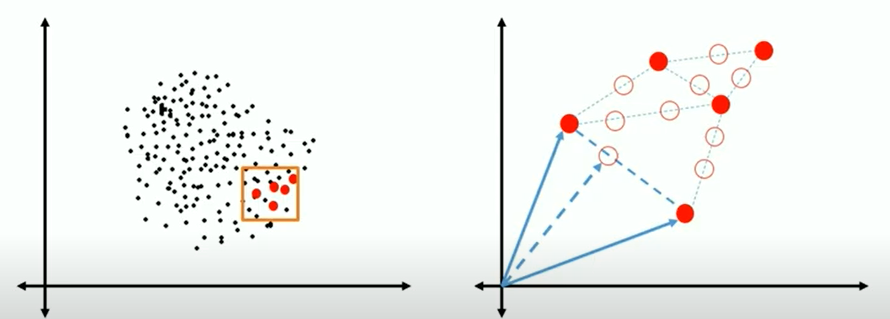

In [128]:
# SMOTE
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=45, k_neighbors=5)
X_train, y_train = smt.fit_resample(X_train, y_train)
len(X_train)

34566

In [129]:
import collections
from collections import Counter
print(sorted(Counter(y_train).items()))

[(0, 17283), (1, 17283)]


In [130]:
y_train.value_counts(normalize=True)

1    0.5
0    0.5
Name: churn, dtype: float64

X_train:  (19401, 74)
y_train:  (19401,)
X_test:  (8315, 74)
y_test:  (8315,)

In [131]:
print("X_train: ", X_train.shape)
print("y_train: ", y_train.shape)
print("X_test: ", X_test.shape)
print("y_test: ", y_test.shape)

X_train:  (34566, 129)
y_train:  (34566,)
X_test:  (8058, 129)
y_test:  (8058,)


### Step 6: Modeling

### 6.1) Running our First Training Model

In [132]:
import statsmodels.api as sm
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                34566
Model:                            GLM   Df Residuals:                    34437
Model Family:                Binomial   Df Model:                          128
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -11843.
Date:                Mon, 31 Aug 2020   Deviance:                       23686.
Time:                        21:22:59   Pearson chi2:                 8.94e+04
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                    -2.1293      0.034    -63.452      0.000      -2.195      -2.063
arpu_6                    0.0930      0.055      1.691      0.091      -0.015       0.201
arpu_7                    0.1175      0.073      1.604      0.109      -0.026       0.261
arpu_8                    0.6580      0.089      7.412      0.000       0.484       0.832
onnet_mou_6               9.3966      3.274      2.870      0.004       2.979      15.814
onnet_mou_7              -6.4301      2.220     -2.896      0.004     -10.782      -2.078
onnet_mou_8               0.7485      2.446      0.306      0.760      -4.045       5.542
offnet_mou_6             11.9193      3.533      3.374      0.001       4.995      18.844
offnet_mou_7             -8.2834      2.396     -3.457      0.001     -12.980      -3.587
offnet_mou_8             -0.7239      2.616     -0.277      0.782      -5.851       4.403
roam_ic_mou_6            -0.0598      0.032     -1.860      0.063      -0.123       0.003
roam_ic_mou_7             0.1038      0.029      3.519      0.000       0.046       0.162
roam_ic_mou_8            -0.1784      0.028     -6.369      0.000      -0.233      -0.124
roam_og_mou_6            -2.0740      0.657     -3.156      0.002      -3.362      -0.786
roam_og_mou_7             1.0757      0.328      3.281      0.001       0.433       1.718
roam_og_mou_8             0.1934      0.364      0.531      0.595      -0.520       0.906
loc_og_t2t_mou_6       1417.4437    584.820      2.424      0.015     271.218    2563.670
loc_og_t2t_mou_7       -226.0647    560.858     -0.403      0.687   -1325.326     873.197
loc_og_t2t_mou_8       3763.3785    533.793      7.050      0.000    2717.164    4809.593
loc_og_t2m_mou_6       1970.6551    813.494      2.422      0.015     376.236    3565.074
loc_og_t2m_mou_7       -312.1630    776.081     -0.402      0.688   -1833.253    1208.927
loc_og_t2m_mou_8       5577.8874    791.077      7.051      0.000    4027.404    7128.371
loc_og_t2f_mou_6        124.2236     51.287      2.422      0.015      23.703     224.744
loc_og_t2f_mou_7        -20.1929     49.701     -0.406      0.685    -117.606      77.220
loc_og_t2f_mou_8        351.5212     49.849      7.052      0.000     253.819     449.224
loc_og_t2c_mou_6         -0.0827      0.025     -3.373      0.001      -0.131      -0.035
loc_og_t2c_mou_7         -0.1061      0.026     -4.056      0.000      -0.157      -0.055
loc_og_t2c_mou_8          0.0847      0.029      2.923      0.003       0.028       0.142
loc_og_mou_6          -4786.6285   1415.309     -3.382      0.001   -7560.583   -2012.674
loc_og_mou_7          -2340.8416   1417.499     -1.651      0.099   -5119.088     437.405
loc_og_mou_8          -1838.8847   1472.295     -1.249      0.212   -4724.530    1046.760
std_og_t2t_mou_6      -

###  6.2) Feature Selection Using RFE

In [133]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

from sklearn.feature_selection import RFE
rfe = RFE(logreg, 15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train, y_train)

In [134]:
rfe.support_

array([False,  True, False, False, False,  True, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False,  True, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False,  True, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False,  True, False,
       False, False, False, False, False,  True, False, False, False,
       False, False,

In [135]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('arpu_6', False, 24),
 ('arpu_7', True, 1),
 ('arpu_8', False, 29),
 ('onnet_mou_6', False, 21),
 ('onnet_mou_7', False, 7),
 ('onnet_mou_8', True, 1),
 ('offnet_mou_6', False, 13),
 ('offnet_mou_7', False, 55),
 ('offnet_mou_8', False, 26),
 ('roam_ic_mou_6', False, 76),
 ('roam_ic_mou_7', False, 47),
 ('roam_ic_mou_8', False, 45),
 ('roam_og_mou_6', False, 113),
 ('roam_og_mou_7', False, 61),
 ('roam_og_mou_8', False, 30),
 ('loc_og_t2t_mou_6', False, 23),
 ('loc_og_t2t_mou_7', False, 20),
 ('loc_og_t2t_mou_8', False, 9),
 ('loc_og_t2m_mou_6', False, 15),
 ('loc_og_t2m_mou_7', False, 34),
 ('loc_og_t2m_mou_8', False, 88),
 ('loc_og_t2f_mou_6', False, 99),
 ('loc_og_t2f_mou_7', False, 16),
 ('loc_og_t2f_mou_8', False, 110),
 ('loc_og_t2c_mou_6', False, 67),
 ('loc_og_t2c_mou_7', False, 41),
 ('loc_og_t2c_mou_8', False, 66),
 ('loc_og_mou_6', False, 75),
 ('loc_og_mou_7', False, 60),
 ('loc_og_mou_8', False, 56),
 ('std_og_t2t_mou_6', False, 22),
 ('std_og_t2t_mou_7', False, 8),
 ('s

In [136]:
col = X_train.columns[rfe.support_]

In [137]:
X_train.columns[~rfe.support_]

Index(['arpu_6', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'offnet_mou_6',
       'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7',
       'roam_ic_mou_8',
       ...
       'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8',
       'jul_vbc_3g', 'jun_vbc_3g', 'total_rech_data_amt_6',
       'total_rech_data_amt_7', 'total_rech_data_amt_8', 'Tenure'],
      dtype='object', length=114)

##### Assessing the model with StatsModels

In [138]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                34566
Model:                            GLM   Df Residuals:                    34550
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13276.
Date:                Mon, 31 Aug 2020   Deviance:                       26551.
Time:                        21:24:29   Pearson chi2:                 2.39e+05
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.2032      0.033    -65.972      0.000      -2.269      -2.138
arpu_7                 0.4369      0.022     19.489      0.000       0.393       0.481
onnet_mou_8            1.4177      0.081     17.460      0.000       1.259       1.577
std_og_t2m_mou_8       1.3007      0.078     16.665      0.000       1.148       1.454
std_og_t2f_mou_8      -0.4170      0.058     -7.221      0.000      -0.530      -0.304
total_og_mou_8        -2.5010      0.128    -19.565      0.000      -2.752      -2.250
loc_ic_t2f_mou_8      -0.4334      0.055     -7.853      0.000      -0.542      -0.325
loc_ic_mou_7           0.6260      0.045     14.034      0.000       0.539       0.713
loc_ic_mou_8          -1.8368      0.073    -25.071      0.000      -1.980      -1.693
std_ic_mou_8          -0.6171      0.038    -16.082      0.000      -0.692      -0.542
spl_ic_mou_8          -0.7054      0.044    -16.048      0.000      -0.792      -0.619
total_rech_num_8      -0.6418      0.029    -21.823      0.000      -0.699      -0.584
last_day_rch_amt_8    -0.6479      0.023    -27.598      0.000      -0.694      -0.602
monthly_2g_8          -0.6870      0.030    -22.863      0.000      -0.746      -0.628
sachet_2g_8           -0.7103      0.031    -22.967      0.000      -0.771      -0.650
aug_vbc_3g            -0.7093      0.034    -20.789      0.000      -0.776      -0.642
======================================================================================
"""

In [139]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.032924
1    0.160432
2    0.358339
3    0.000056
4    0.442205
5    0.080753
6    0.006519
7    0.419783
8    0.759136
9    0.369793
dtype: float64

In [140]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([3.29239032e-02, 1.60432021e-01, 3.58338968e-01, 5.55850809e-05,
       4.42204593e-01, 8.07525802e-02, 6.51903748e-03, 4.19783466e-01,
       7.59135524e-01, 3.69792666e-01])

##### Creating a dataframe with the actual churn flag and the predicted probabilities

In [141]:
y_train_pred_final = pd.DataFrame({'Churn':y_train.values, 'Churn_Prob':y_train_pred})
y_train_pred_final['mobile_number'] = y_train.index
y_train_pred_final.head()

Churn  Churn_Prob  mobile_number
0      0    0.032924              0
1      1    0.160432              1
2      0    0.358339              2
3      0    0.000056              3
4      0    0.442205              4

##### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [142]:
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted
0      0    0.032924              0          0
1      1    0.160432              1          0
2      0    0.358339              2          0
3      0    0.000056              3          0
4      0    0.442205              4          0

In [143]:
from sklearn import metrics
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[14028  3255]
 [ 2143 15140]]


In [144]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8438349823526008


#### Checking VIFs

In [145]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features    VIF
4       total_og_mou_8  17.93
1          onnet_mou_8   7.55
2     std_og_t2m_mou_8   6.23
7         loc_ic_mou_8   4.47
6         loc_ic_mou_7   3.13
10    total_rech_num_8   1.96
0               arpu_7   1.55
5     loc_ic_t2f_mou_8   1.37
11  last_day_rch_amt_8   1.30
13         sachet_2g_8   1.30
8         std_ic_mou_8   1.23
14          aug_vbc_3g   1.18
12        monthly_2g_8   1.14
3     std_og_t2f_mou_8   1.08
9         spl_ic_mou_8   1.06

<div class="alert alert-block alert-info">
    
#### Inference:- There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable `'total_og_mou_8'` has the high VIF value. So let's start by dropping that.

###  Dropping the 1st Variable `'total_og_mou_8'` and Updating the Model

In [146]:
# Let's drop 'total_og_mou_8' since it has a high VIF value

col = col.drop('total_og_mou_8', 1)
col

Index(['arpu_7', 'onnet_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'loc_ic_mou_8', 'std_ic_mou_8',
       'spl_ic_mou_8', 'total_rech_num_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'sachet_2g_8', 'aug_vbc_3g'],
      dtype='object')

In [147]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm3 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm3.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                34566
Model:                            GLM   Df Residuals:                    34551
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13520.
Date:                Mon, 31 Aug 2020   Deviance:                       27040.
Time:                        21:24:30   Pearson chi2:                 1.04e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -2.1928      0.034    -65.434      0.000      -2.259      -2.127
arpu_7                 0.3777      0.022     17.537      0.000       0.335       0.420
onnet_mou_8           -0.1079      0.020     -5.399      0.000      -0.147      -0.069
std_og_t2m_mou_8      -0.1529      0.022     -6.902      0.000      -0.196      -0.109
std_og_t2f_mou_8      -0.5144      0.058     -8.801      0.000      -0.629      -0.400
loc_ic_t2f_mou_8      -0.4257      0.056     -7.546      0.000      -0.536      -0.315
loc_ic_mou_7           0.6846      0.045     15.244      0.000       0.597       0.773
loc_ic_mou_8          -2.5603      0.068    -37.447      0.000      -2.694      -2.426
std_ic_mou_8          -0.6072      0.038    -15.940      0.000      -0.682      -0.533
spl_ic_mou_8          -0.7063      0.044    -16.119      0.000      -0.792      -0.620
total_rech_num_8      -0.6847      0.029    -23.589      0.000      -0.742      -0.628
last_day_rch_amt_8    -0.6656      0.023    -28.417      0.000      -0.711      -0.620
monthly_2g_8          -0.6791      0.030    -22.660      0.000      -0.738      -0.620
sachet_2g_8           -0.6932      0.031    -22.487      0.000      -0.754      -0.633
aug_vbc_3g            -0.6875      0.034    -20.312      0.000      -0.754      -0.621
======================================================================================
"""

In [148]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([3.34048579e-02, 1.66689785e-01, 1.96691732e-01, 3.64185491e-05,
       4.48919943e-01, 8.48664461e-02, 6.53774375e-03, 3.96081104e-01,
       6.49588154e-01, 2.93454808e-01])

In [149]:
y_train_pred_final['Churn_Prob'] = y_train_pred

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [150]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted
0      0    0.033405              0          0
1      1    0.166690              1          0
2      0    0.196692              2          0
3      0    0.000036              3          0
4      0    0.448920              4          0

In [151]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8394954579644738


So overall the accuracy hasn't dropped much.

##### Let's check the VIFs again

In [152]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
6         loc_ic_mou_8  3.83
5         loc_ic_mou_7  3.13
9     total_rech_num_8  1.92
0               arpu_7  1.52
1          onnet_mou_8  1.38
2     std_og_t2m_mou_8  1.38
4     loc_ic_t2f_mou_8  1.37
12         sachet_2g_8  1.29
10  last_day_rch_amt_8  1.27
7         std_ic_mou_8  1.23
13          aug_vbc_3g  1.18
11        monthly_2g_8  1.14
3     std_og_t2f_mou_8  1.07
8         spl_ic_mou_8  1.06

<div class="alert alert-block alert-info">
    
#### Inference:- As you can notice some of the variable have high VIF values. Such variables are insignificant and should be dropped.

### Dropping the 2nd  Variable `loc_ic_mou_8` and Updating the Model

In [153]:
# Let's drop 'loc_ic_mou_8' since it has a high VIF value
col = col.drop('loc_ic_mou_8')
col

Index(['arpu_7', 'onnet_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8',
       'loc_ic_t2f_mou_8', 'loc_ic_mou_7', 'std_ic_mou_8', 'spl_ic_mou_8',
       'total_rech_num_8', 'last_day_rch_amt_8', 'monthly_2g_8', 'sachet_2g_8',
       'aug_vbc_3g'],
      dtype='object')

In [154]:
# Let's re-run the model using the selected variables
X_train_sm = sm.add_constant(X_train[col])
logm4 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm4.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                  churn   No. Observations:                34566
Model:                            GLM   Df Residuals:                    34552
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14563.
Date:                Mon, 31 Aug 2020   Deviance:                       29126.
Time:                        21:24:31   Pearson chi2:                 1.00e+06
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 -1.8895      0.031    -61.236      0.000      -1.950      -1.829
arpu_7                 0.4751      0.020     23.220      0.000       0.435       0.515
onnet_mou_8           -0.1951      0.020     -9.808      0.000      -0.234      -0.156
std_og_t2m_mou_8      -0.1822      0.022     -8.346      0.000      -0.225      -0.139
std_og_t2f_mou_8      -0.6705      0.062    -10.770      0.000      -0.793      -0.549
loc_ic_t2f_mou_8      -1.2152      0.059    -20.521      0.000      -1.331      -1.099
loc_ic_mou_7          -0.5205      0.025    -21.157      0.000      -0.569      -0.472
std_ic_mou_8          -0.8160      0.040    -20.519      0.000      -0.894      -0.738
spl_ic_mou_8          -0.7695      0.045    -17.136      0.000      -0.858      -0.681
total_rech_num_8      -0.9322      0.029    -32.395      0.000      -0.989      -0.876
last_day_rch_amt_8    -0.8746      0.024    -36.507      0.000      -0.922      -0.828
monthly_2g_8          -0.7239      0.029    -24.623      0.000      -0.782      -0.666
sachet_2g_8           -0.7193      0.031    -23.271      0.000      -0.780      -0.659
aug_vbc_3g            -0.7938      0.034    -23.111      0.000      -0.861      -0.726
======================================================================================
"""

In [155]:
# Getting the predicted values on the train set
y_train_pred = res.predict(X_train_sm).values.reshape(-1)
y_train_pred[:10]

array([2.21276775e-02, 1.49432319e-01, 4.11680461e-01, 9.31728564e-05,
       3.67882662e-01, 5.34988669e-02, 5.44662490e-03, 4.81992838e-01,
       3.39347253e-01, 5.41797349e-01])

In [156]:
y_train_pred_final['Churn_Prob'] = y_train_pred

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [157]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0
y_train_pred_final['predicted'] = y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.5 else 0)
y_train_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted
0      0    0.022128              0          0
1      1    0.149432              1          0
2      0    0.411680              2          0
3      0    0.000093              3          0
4      0    0.367883              4          0

In [158]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.predicted )
print(confusion)

[[13533  3750]
 [ 2499 14784]]


In [159]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

0.8192154139906266


So overall the accuracy hasn't dropped much.

##### Let's now check the VIFs again

In [160]:
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
8     total_rech_num_8  1.85
0               arpu_7  1.50
5         loc_ic_mou_7  1.41
2     std_og_t2m_mou_8  1.38
1          onnet_mou_8  1.37
11         sachet_2g_8  1.29
4     loc_ic_t2f_mou_8  1.26
9   last_day_rch_amt_8  1.23
6         std_ic_mou_8  1.22
12          aug_vbc_3g  1.18
10        monthly_2g_8  1.13
3     std_og_t2f_mou_8  1.07
7         spl_ic_mou_8  1.05

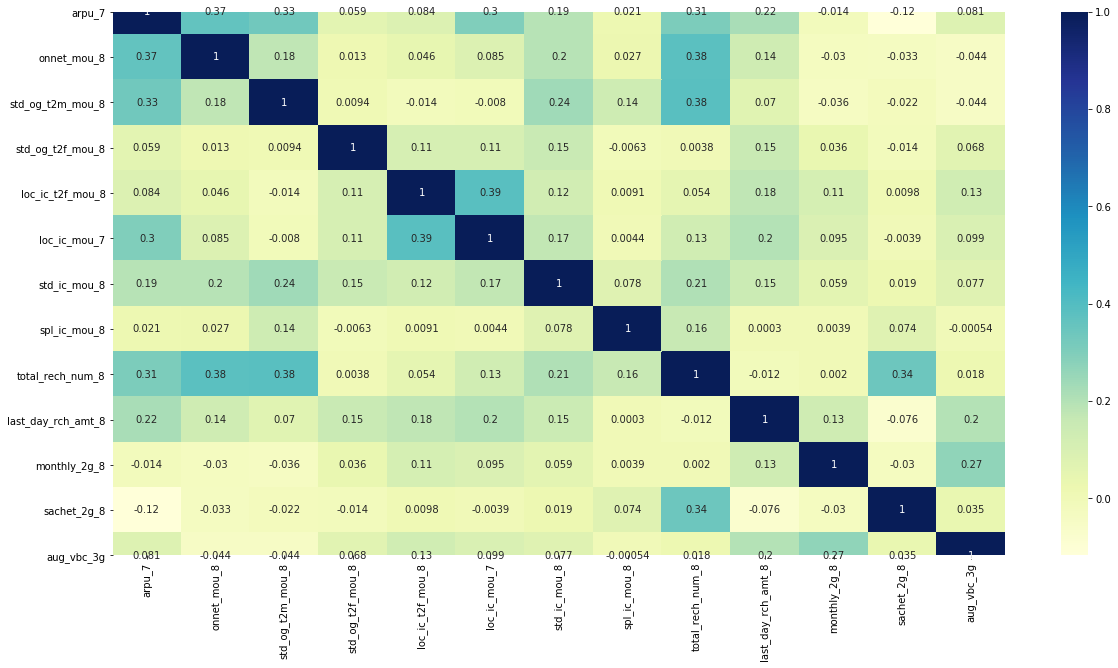

In [161]:
plt.figure(figsize = (20,10))
cor= X_train[col].corr()
sns.heatmap(cor, annot=True, cmap="YlGnBu")
plt.show()

<div class="alert alert-block alert-info">
    
### Our latest model have the following features:
- All variables have p-value < 0.05. 
- All the features have very low VIF values, meaning, there is hardly any muliticollinearity among the features. This is also evident from the heat map.
- The overall accuracy of 81.92 at a probability threshold of 0.05 is also very acceptable.

#### So we need not drop any more variables and we can proceed with making predictions using this model only.

### 6.3)  Calculating Metrics beyond simply accuracy

In [162]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [163]:
# Let's check the overall accuracy.
print('Accuracy Score: ',metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.8192154139906266
Sensitivity:  0.8554070473876063
Specificity:  0.783023780593647
false postive rate:  0.21697621940635306
positive predictive value:  0.7976691485917773
Negative predictive value:  0.844124251497006
Misclassification Rate:  0.18078458600937336


### 6.4) Plotting the ROC Curve

<div class="alert alert-block alert-info">
    
#### An ROC curve demonstrates several things:

- It shows the tradeoff between sensitivity and specificity (any increase in sensitivity will be accompanied by a decrease in specificity).
- The closer the curve follows the left-hand border and then the top border of the ROC space, the more accurate the test.
- The closer the curve comes to the 45-degree diagonal of the ROC space, the less accurate the test.

In [164]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False)
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [165]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, y_train_pred_final.Churn_Prob, drop_intermediate = False )

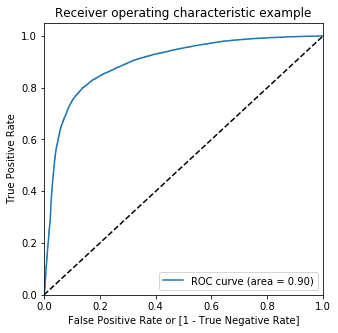

In [166]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

### 6.5) Calculating the area under the curve(GINI)

In [167]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [168]:
auc = auc_val(fpr,tpr)
auc

0.8970450102878165

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.90, our model seems to be doing well on the train dataset.

### 6.6) Finding Optimal Cutoff Point

#### Optimal cutoff probability is that prob where we get balanced sensitivity and specificity

In [169]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0      0    0.022128              0          0    1    0    0    0    0    0   
1      1    0.149432              1          0    1    1    0    0    0    0   
2      0    0.411680              2          0    1    1    1    1    1    0   
3      0    0.000093              3          0    1    0    0    0    0    0   
4      0    0.367883              4          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  
0    0    0    0    0  
1    0    0    0    0  
2    0    0    0    0  
3    0    0    0    0  
4    0    0    0    0

In [170]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.686773  0.972227  0.401319
0.2   0.2  0.738790  0.947058  0.530521
0.3   0.3  0.772898  0.922988  0.622809
0.4   0.4  0.799543  0.892553  0.706532
0.5   0.5  0.819215  0.855407  0.783024
0.6   0.6  0.829630  0.806052  0.853208
0.7   0.7  0.820778  0.734884  0.906671
0.8   0.8  0.775155  0.600822  0.949488
0.9   0.9  0.554273  0.117051  0.991495


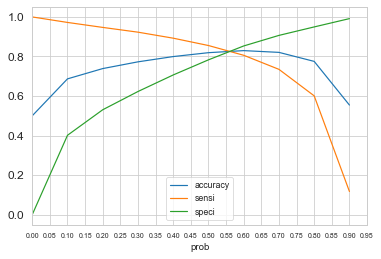

In [171]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
import numpy as np
sns.set_style("whitegrid")
sns.set_context("paper")
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.xticks(np.arange(0, 1, step=0.05), size = 7)
plt.yticks(size = 12)
plt.show()

<div class="alert alert-block alert-info">
    
#### Inference:- From the above curve, `0.4` is the point to take it as a cutoff probability. Since our buisness objective is more important to identify churners than the non-churners accurately. High recall means model will correctly identify almost all customers who are likely to churn. So we will use `0.4` as our cutoff probability.

In [172]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Churn_Prob.map(
                                                                    lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

Churn  Churn_Prob  mobile_number  predicted  0.0  0.1  0.2  0.3  0.4  0.5  \
0      0    0.022128              0          0    1    0    0    0    0    0   
1      1    0.149432              1          0    1    1    0    0    0    0   
2      0    0.411680              2          0    1    1    1    1    1    0   
3      0    0.000093              3          0    1    0    0    0    0    0   
4      0    0.367883              4          0    1    1    1    1    0    0   

   0.6  0.7  0.8  0.9  final_predicted  
0    0    0    0    0                0  
1    0    0    0    0                0  
2    0    0    0    0                1  
3    0    0    0    0                0  
4    0    0    0    0                0

In [173]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7995429034311173

In [174]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_predicted )
confusion2

array([[12211,  5072],
       [ 1857, 15426]], dtype=int64)

In [175]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [176]:
# Let's check the overall accuracy.
print('Accuracy Score: ',metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.predicted))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.8192154139906266
Sensitivity:  0.892553376149974
Specificity:  0.7065324307122606
false postive rate:  0.29346756928773937
positive predictive value:  0.7525612254854133
Negative predictive value:  0.8679982940005687
Misclassification Rate:  0.20045709656888272


## Precision and Recall

### Looking at the confusion matrix again

In [177]:
#Looking at the confusion matrix again
confusion2

array([[12211,  5072],
       [ 1857, 15426]], dtype=int64)

##### Precision
TP / TP + FP

In [178]:
precision=confusion2[1,1]/(confusion2[0,1]+confusion2[1,1])
precision

0.7525612254854133

##### Recall
TP / TP + FN

In [179]:
recall= confusion2[1,1]/(confusion2[1,0]+confusion2[1,1])
recall

0.892553376149974

Using sklearn utilities for the same

In [180]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.7525612254854133

In [181]:
recall_score(y_train_pred_final.Churn, y_train_pred_final.final_predicted)

0.892553376149974

### Precision and recall tradeoff

In [182]:
from sklearn.metrics import precision_recall_curve
y_train_pred_final.Churn, y_train_pred_final.final_predicted

(0        0
 1        1
 2        0
 3        0
 4        0
         ..
 34561    1
 34562    1
 34563    1
 34564    1
 34565    1
 Name: Churn, Length: 34566, dtype: int32, 0        0
 1        0
 2        1
 3        0
 4        0
         ..
 34561    1
 34562    1
 34563    1
 34564    1
 34565    1
 Name: final_predicted, Length: 34566, dtype: int64)

In [183]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Churn, y_train_pred_final.Churn_Prob)

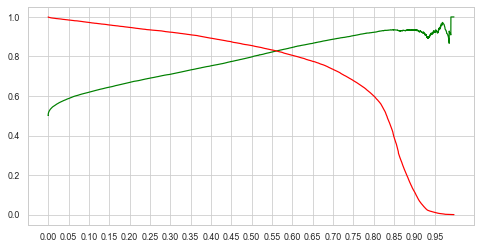

In [184]:
plt.figure(figsize=(8, 4))
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.xticks(np.arange(0, 1, step=0.05))
plt.show()

<div class="alert alert-block alert-info">
    
<b> Inference: </b> From the above precision-recall graph, we get the optical threshold value as close to 0.4 which is same as that we got from accuracy,sensitivity and specificity cutoff. <b>Since our buisness objective is more important to identify churners than the non-churners accurately. High recall means model will correctly identify almost all customers who are likely to churn.</b> So Model evaluation will be conducted by using `Recall and Precision metric`. This will be achieved with our threshold value of 0.4 (from `precision-recall cutoff`). So we will use this value.

** So our `optical threshold value will be 0.4`**
</div>

#### Calculating the F1 score

F1 = 2×(Precision*Recall)/(Precision+Recall)

In [185]:
F1 = 2*(precision*recall)/(precision+recall)
F1

0.8166009369789048

Classification Report

In [186]:
from sklearn.metrics import classification_report
print(classification_report(y_train_pred_final.Churn, y_train_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.87      0.71      0.78     17283
           1       0.75      0.89      0.82     17283

    accuracy                           0.80     34566
   macro avg       0.81      0.80      0.80     34566
weighted avg       0.81      0.80      0.80     34566



### 6.7)  Making predictions on the test set

In [187]:
X_test = X_test[col]
X_test.head()

arpu_7  onnet_mou_8  std_og_t2m_mou_8  std_og_t2f_mou_8  \
1856  -0.965070    -0.548054         -0.412798         -0.204069   
23195 -1.032904    -0.547477         -0.412798         -0.204069   
39180  1.049837    -0.389401          0.474691         -0.204069   
51612 -0.839093    -0.548054         -0.412798         -0.204069   
69554 -0.425686    -0.422191         -0.339691          0.229732   

       loc_ic_t2f_mou_8  loc_ic_mou_7  std_ic_mou_8  spl_ic_mou_8  \
1856           0.647239     -0.372933     -0.489144     -0.250255   
23195         -0.404254     -0.256778     -0.489144     -0.250255   
39180         -0.378988      0.127051      1.097210     -0.250255   
51612         -0.404254     -0.829855     -0.489144     -0.250255   
69554          1.100748      2.021817      0.224364     -0.250255   

       total_rech_num_8  last_day_rch_amt_8  monthly_2g_8  sachet_2g_8  \
1856           0.039707           -0.532835     -0.382436     2.902547   
23195         -0.533054           -0.662317     -0.382436    -0.018489   
39180         -0.647607           -0.748637     -0.382436    -0.435779   
51612         -0.876712           -0.748637     -0.382436    -0.435779   
69554          0.268812           -0.532835     -0.382436     2.485256   

       aug_vbc_3g  
1856    -0.422089  
23195   -0.422089  
39180   -0.422089  
51612   -0.422089  
69554   -0.422089

In [188]:
y_test

1856     0
23195    0
39180    1
51612    1
69554    0
        ..
83851    1
98979    0
52980    0
96011    0
86344    0
Name: churn, Length: 8058, dtype: int32

In [189]:
X_test_sm = sm.add_constant(X_test)

Making predictions on the test set

In [190]:
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

1856     0.044085
23195    0.701971
39180    0.648176
51612    0.874703
69554    0.004311
50382    0.076403
29273    0.005495
19229    0.536756
43755    0.067836
28811    0.412250
dtype: float64

In [191]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)
# Let's see the head
y_pred_1.head()

0
1856   0.044085
23195  0.701971
39180  0.648176
51612  0.874703
69554  0.004311

In [192]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
# Putting CustID to index
y_test_df['mobile_number'] = y_test_df.index

In [193]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [194]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)
y_pred_final.head()

churn  mobile_number         0
0      0           1856  0.044085
1      0          23195  0.701971
2      1          39180  0.648176
3      1          51612  0.874703
4      0          69554  0.004311

In [195]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_Prob', 'churn': 'Churn'})
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['mobile_number','Churn','Churn_Prob'], axis=1)
# Let's see the head of y_pred_final
y_pred_final.head()

mobile_number  Churn  Churn_Prob
0           1856      0    0.044085
1          23195      0    0.701971
2          39180      1    0.648176
3          51612      1    0.874703
4          69554      0    0.004311

In [196]:
y_pred_final['final_predicted'] = y_pred_final.Churn_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

mobile_number  Churn  Churn_Prob  final_predicted
0           1856      0    0.044085                0
1          23195      0    0.701971                1
2          39180      1    0.648176                1
3          51612      1    0.874703                1
4          69554      0    0.004311                0

In [197]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.7190369818813601

In [198]:
confusion_test = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_predicted )
confusion_test

array([[5242, 2165],
       [  99,  552]], dtype=int64)

In [199]:
TP = confusion_test[1,1] # true positive 
TN = confusion_test[0,0] # true negatives
FP = confusion_test[0,1] # false positives
FN = confusion_test[1,0] # false negatives

In [200]:
# Let's check the overall accuracy.
print('Accuracy Score: ',metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_predicted))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.7190369818813601
Sensitivity:  0.847926267281106
Specificity:  0.7077089239908195
false postive rate:  0.29229107600918053
positive predictive value:  0.20316525579683475
Negative predictive value:  0.981464145291144
Misclassification Rate:  0.2809630181186399


## Precision and Recall

##### Precision
TP / TP + FP

In [201]:
Precision = confusion_test[1,1]/(confusion_test[0,1]+confusion_test[1,1])
Precision

0.20316525579683475

##### Recall
TP / TP + FN

In [202]:
Recall = confusion_test[1,1]/(confusion_test[1,0]+confusion_test[1,1])
Recall

0.847926267281106

Using sklearn utilities for the same

In [203]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.20316525579683475

In [204]:
recall_score(y_pred_final.Churn, y_pred_final.final_predicted)

0.847926267281106

Calculating the F1 score
F1 = 2×(Precision*Recall)/(Precision+Recall)

In [205]:
F1 = 2*(Precision*Recall)/(Precision+Recall)
F1

0.327790973871734

Classification Report

In [206]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_final.Churn, y_pred_final.final_predicted))

              precision    recall  f1-score   support

           0       0.98      0.71      0.82      7407
           1       0.20      0.85      0.33       651

    accuracy                           0.72      8058
   macro avg       0.59      0.78      0.58      8058
weighted avg       0.92      0.72      0.78      8058



Plotting the ROC Curve for Test Dataset

In [207]:
def draw_roc( actual, probs ):    
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [208]:
fpr, tpr, thresholds = metrics.roc_curve( y_pred_final.Churn, y_pred_final.Churn_Prob, drop_intermediate = False )

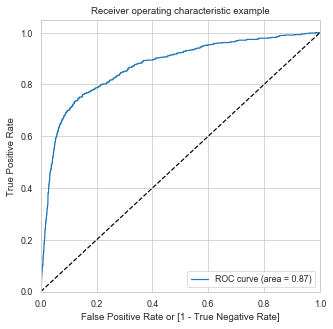

In [209]:
draw_roc(y_pred_final.Churn, y_pred_final.Churn_Prob)

### Calculating the area under the curve(GINI)

In [210]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [211]:
auc = auc_val(fpr,tpr)
auc

0.8701916047778829

<div class="alert alert-block alert-info">
    
As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.87, our model seems to be doing well on the test dataset.

### 6.8) Determining Feature Importance

#### Selecting the coefficients of the selected features from our final model excluding the intercept

In [212]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res.params[1:]
new_params

arpu_7                0.48
onnet_mou_8          -0.20
std_og_t2m_mou_8     -0.18
std_og_t2f_mou_8     -0.67
loc_ic_t2f_mou_8     -1.22
loc_ic_mou_7         -0.52
std_ic_mou_8         -0.82
spl_ic_mou_8         -0.77
total_rech_num_8     -0.93
last_day_rch_amt_8   -0.87
monthly_2g_8         -0.72
sachet_2g_8          -0.72
aug_vbc_3g           -0.79
dtype: float64

#### Selecting Top 13 features which contribute most towards the probability of a customer getting churned.

In [213]:
feature_importance = new_params
imp_feat= pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False)
imp_feat.rename(columns = {'index':'Varname', 0:'Imp'}, inplace = True)
imp_feat

Varname   Imp
0               arpu_7  0.48
2     std_og_t2m_mou_8 -0.18
1          onnet_mou_8 -0.20
5         loc_ic_mou_7 -0.52
3     std_og_t2f_mou_8 -0.67
11         sachet_2g_8 -0.72
10        monthly_2g_8 -0.72
7         spl_ic_mou_8 -0.77
12          aug_vbc_3g -0.79
6         std_ic_mou_8 -0.82
9   last_day_rch_amt_8 -0.87
8     total_rech_num_8 -0.93
4     loc_ic_t2f_mou_8 -1.22

<div class="alert alert-block alert-success">
    
<b> Inference:  We could see the Top 13 features which contribute most towards the probability of a customer getting churned.</b>
    
</div>

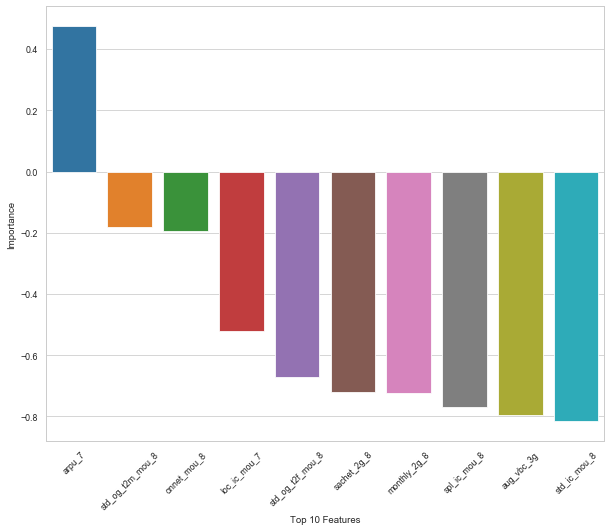

In [214]:
plt.figure(figsize=(10, 8))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=45)
plt.show()

### Step 7: Conclusion

<div class="alert alert-block alert-success">
    
Based on our logical regression model, some features are identified which contribute most to a customer getting churned.

The churn probability of a customer increases with increase in values of the following features in descending order:<br>

#### Features with Positive Coefficient:
    
1) arpu_7:	0.48<br>
    
    
The churn probability of a customer increases with decrease in values of the following features in descending order:<br>

#### Features with Negative Coefficient:<br>	

1)	std_og_t2m_mou_8:	-0.18<br>
2)	onnet_mou_8:	-0.20<br>
3)	loc_ic_mou_7:	-0.52<br>
4)	std_og_t2f_mou_8:	-0.67<br>
5)	sachet_2g_8:	-0.72<br>
6)	monthly_2g_8:	-0.72<br>
7)	spl_ic_mou_8:	-0.77<br>
8)	aug_vbc_3g:	-0.79<br>
9)	std_ic_mou_8:	-0.82<br>
10)	last_day_rch_amt_8:	-0.87<br>
11)	total_rech_num_8:	-0.93<br>
12)	loc_ic_t2f_mou_8:	-1.22<br>

### Conclusions from Logistic Regression:- 
Std outgoing minute of usage for Month 8, Onnet minute of usage for Month 8, Local incoming minute of usage for Month 7, sachet 2g usage for Month 8, Monthly 2g usage for Month 8, Special incoming minute of usage for Month 8, 3g Volume base cost for Month 8, Std incoming minute of usage for Month 8, Last day recharge amount for Month 8, Total recharge number for Month 8, Local incoming minute of usage for Month 8 are the most important predictor variables to predict churn.

<div class="alert alert-block alert-success">
    
###  Classification Report for Train data
                
                precision    recall  f1-score   support

           0       0.87      0.71      0.78     17283
           1       0.75      0.89      0.82     17283

    
#### --------------------------------------------------------------------------------------------------------------
###   Classification Report for Test data
                     
                precision    recall  f1-score   support

           0       0.98      0.71      0.82      7407
           1       0.20      0.85      0.33       651 
 
#### Accuracy: 71.9%
#### F1 score: 32.8%
#### Recall: 84.8%
#### Precision: 20.3%
#### ROC for the test dataset: 87.0

### Model 2.1) Using Decision Trees (Default Hyperparameters)

In [215]:
from sklearn.metrics import precision_recall_curve, plot_roc_curve, roc_auc_score
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report
from sklearn.metrics import accuracy_score, f1_score

In [216]:
X_train,X_test,y_train, y_test = train_test_split(X, y,train_size=0.7,stratify = y,random_state=100)

In [217]:
X_train.shape, X_test.shape

((18801, 129), (8058, 129))

In [218]:
y_train.shape, y_test.shape

((18801,), (8058,))

In [219]:
y_train.value_counts(normalize=True)

0   0.92
1   0.08
Name: churn, dtype: float64

In [220]:
y_test.value_counts(normalize=True)

0   0.92
1   0.08
Name: churn, dtype: float64

### Checking for Class imbalance in Train & Test and treating it
#### SMOTE - Synthetic Minority Oversampling Technique
Creates new "Synthetic" observations

Process: - 
1. Identify the feature vector and its nearest neighbour
2. Take the difference between the two
3. Multiply the difference with a random number between 0 and 1
4. Identify a new point on the line segment by adding the random number to feature vector
5. Repeat the process for identified feature vectors

In [221]:
# SMOTE
from imblearn.over_sampling import SMOTE
smt = SMOTE(random_state=45, k_neighbors=5)
X_train, y_train = smt.fit_resample(X_train, y_train)
len(X_train)

34566

In [222]:
import collections
from collections import Counter
print(sorted(Counter(y_train).items()))

[(0, 17283), (1, 17283)]


In [223]:
y_train.value_counts(normalize=True)

1   0.50
0   0.50
Name: churn, dtype: float64

In [224]:
# Lets import decision tree libraries
from sklearn.tree import DecisionTreeClassifier

# Lets create a decision tree with the default hyper parameters
dt_default = DecisionTreeClassifier(random_state=42)

#### Fitting the decision tree with default hyperparameters

In [225]:
# Lets fit the decision tree with default hyperparameters
dt_default.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [226]:
y_train_pred_dt = dt_default.predict(X_train)
y_test_pred_dt = dt_default.predict(X_test)

In [227]:
print(classification_report(y_train, y_train_pred_dt))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17283
           1       1.00      1.00      1.00     17283

    accuracy                           1.00     34566
   macro avg       1.00      1.00      1.00     34566
weighted avg       1.00      1.00      1.00     34566



#### Making predictions on the test set

Accuracy:  88.6%
F1 score:  46.3%
Recall:  61.0%
Precision:  37.3%
ROC for the test dataset: 76.0%

 Clasification Report:
               precision    recall  f1-score   support

           0       0.96      0.91      0.94      7407
           1       0.37      0.61      0.46       651

    accuracy                           0.89      8058
   macro avg       0.67      0.76      0.70      8058
weighted avg       0.92      0.89      0.90      8058



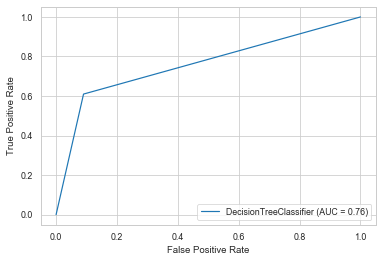


 Confussion Matrix:
 [[6739  668]
 [ 254  397]]


In [228]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt)))
pred_probs_test = dt_default.predict_proba(X_test)
print("ROC for the test dataset:","{:.1%}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1])))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_dt))
plot_roc_curve(dt_default, X_test, y_test, drop_intermediate=False)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.76, our model seems to be doing fair on the test dataset.

In [229]:
confusion_dt = metrics.confusion_matrix( y_test, y_test_pred_dt)

TN = confusion_dt[0,0] # true positive 
TP = confusion_dt[1,1] # true negatives
FP = confusion_dt[0,1] # false positives
FN = confusion_dt[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  61.0%
Specificity:  91.0%
False postive rate: 9.0%
Positive predictive value: 37.3%
Negative predictive value: 96.4%


### Conclusion:- From Decision Tree (Default Hyperparameters) 

<div class="alert alert-block alert-success">
    

###   Clasification Report for Test data
                     
                 precision    recall  f1-score   support

           0       0.96      0.91      0.94      7407
           1       0.37      0.61      0.46       651

#### Accuracy:  88.6%
#### F1 score:  46.3%
#### Recall:  61.0%
#### Precision:  37.3%
#### ROC for the test dataset: 76.0%

### Model 2.2) Hyper-parameter tuning for the Decision Tree

In [230]:
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

In [231]:
params = {
    "max_depth": [3,5,10,20],
    "min_samples_leaf": [5,10,20,50],
    'min_samples_split': [5,10,20,50],
    'criterion': ["gini", "entropy"]
}

In [232]:
grid_search = GridSearchCV(estimator=dt,
                           param_grid=params,
                           cv=4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [233]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 128 candidates, totalling 512 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 512 out of 512 | elapsed:  5.7min finished


Wall time: 5min 50s


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50],
                         'min_samples_split': [5, 10, 20, 50]},
             scoring='recall', verbose=1)

#### Grid_search.cv_results_ :- This function helps us to try out different combinations of hyperparameters which ultimately eased our process of figuring out these best values.

In [234]:
score_dt = pd.DataFrame(grid_search.cv_results_)
score_dt.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0           1.86          0.14             0.04            0.01   
1           1.83          0.13             0.04            0.00   
2           1.75          0.03             0.03            0.01   
3           1.91          0.02             0.04            0.00   
4           1.74          0.03             0.04            0.01   

  param_criterion param_max_depth param_min_samples_leaf  \
0            gini               3                      5   
1            gini               3                      5   
2            gini               3                      5   
3            gini               3                      5   
4            gini               3                     10   

  param_min_samples_split                                             params  \
0                       5  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
1                      10  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
2                      20  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
3                      50  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   
4                       5  {'criterion': 'gini', 'max_depth': 3, 'min_sam...   

   split0_test_score  split1_test_score  split2_test_score  split3_test_score  \
0               0.81               0.84               0.82               0.83   
1               0.81               0.84               0.82               0.83   
2               0.81               0.84               0.82               0.83   
3               0.81               0.84               0.82               0.83   
4               0.81               0.84               0.82               0.83   

   mean_test_score  std_test_score  rank_test_score  
0             0.82            0.01              113  
1             0.82            0.01              113  
2             0.82            0.01              113  
3             0.82            0.01              113  
4             0.82            0.01              113

In [235]:
grid_search.best_score_

0.9321885955325842

<div class="alert alert-block alert-info">
    
#### Grid_search.best_estimator_  :- When the grid search is called with various params, it chooses the one with the highest score based on the given scorer function. Best estimator gives the information of the params that resulted in the highest score or in simple term Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. 

#### Inference:- Since we have selected recall for our scoring, So Grid search best estimator will provide us the best estimator which will give us the information of the params that resulted in the highest `Recall` score.
    
#### We have selected recall for scoring as our buisness requirement is to identify almost all customers who are likely to churn. High recall means model will correctly identify almost all customers who are likely to churn.

In [236]:
dt_best = grid_search.best_estimator_
dt_best

DecisionTreeClassifier(criterion='entropy', max_depth=10, min_samples_leaf=5,
                       min_samples_split=5, random_state=42)

<div class="alert alert-block alert-info">

#### Inference:- Based on the Grid Search Hyperparameter tuning method, we identified the best parameters for the Decision Tree from Grid search best estimator as:-  criterion='entropy', max_depth=10, min_samples_leaf=5, min_samples_split=5.
   
- From these parameters (criterion='entropy') helps us to determines how the impurity of a split is measured, (max_depth) helps us to limit the max number of levels in each decision tree to 10, (min_samples_leaf) helps us to find min number of data points allowed in a leaf node to 5, (min_samples_split) helps us to find minimum number of data points a node must contain in order to consider splitting i.e. to 5   

- By applying these parameters and tuning the model, we will able to improve the metrics that we received from the default parametes of Decision Tree.

In [237]:
y_train_pred_dt_hp = dt_best.predict(X_train)
y_test_pred_dt_hp = dt_best.predict(X_test)

In [238]:
print(classification_report(y_train, dt_best.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      0.93      0.94     17283
           1       0.93      0.96      0.94     17283

    accuracy                           0.94     34566
   macro avg       0.94      0.94      0.94     34566
weighted avg       0.94      0.94      0.94     34566



#### Making predictions on the test set

Accuracy:  88.0%
F1 score:  49.5%
Recall:  72.8%
Precision:  37.4%
ROC for the test dataset: 84.8%

 Clasification Report:
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      7407
           1       0.37      0.73      0.49       651

    accuracy                           0.88      8058
   macro avg       0.67      0.81      0.71      8058
weighted avg       0.93      0.88      0.90      8058



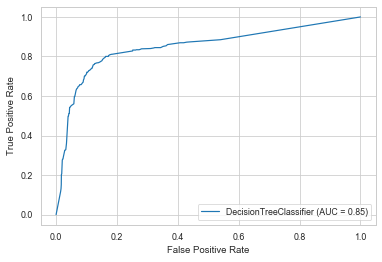


 Confussion Matrix:
 [[6615  792]
 [ 177  474]]


In [239]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_dt_hp)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_dt_hp)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_dt_hp)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_dt_hp)))
pred_probs_test = dt_best.predict_proba(X_test)
print("ROC for the test dataset:","{:.1%}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1])))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_dt_hp))
plot_roc_curve(dt_best, X_test, y_test, drop_intermediate=False)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_dt_hp))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.85, our model seems to be doing good on the test dataset.

In [240]:
confusion_dt_hp = metrics.confusion_matrix( y_test, y_test_pred_dt_hp)

TN = confusion_dt_hp[0,0] # true positive 
TP = confusion_dt_hp[1,1] # true negatives
FP = confusion_dt_hp[0,1] # false positives
FN = confusion_dt_hp[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  72.8%
Specificity:  89.3%
False postive rate: 10.7%
Positive predictive value: 37.4%
Negative predictive value: 97.4%


In [241]:
dt_best.feature_importances_

array([7.51185441e-04, 9.36876245e-04, 4.38464673e-03, 0.00000000e+00,
       7.31165951e-04, 3.62261340e-03, 4.36768786e-03, 8.77102145e-04,
       0.00000000e+00, 2.12564307e-03, 2.93652703e-03, 9.08349238e-03,
       1.94983953e-03, 1.79514503e-03, 1.32306924e-01, 8.68379988e-04,
       2.18127537e-03, 1.25648265e-03, 6.27386515e-05, 2.42624208e-03,
       8.81910869e-04, 7.49836410e-04, 3.38119447e-03, 0.00000000e+00,
       1.99776679e-04, 7.72781335e-04, 1.06263016e-03, 2.42611113e-03,
       1.44197688e-03, 1.86475391e-03, 4.70219051e-03, 2.35063858e-03,
       9.13780568e-04, 0.00000000e+00, 1.23665862e-03, 6.18071964e-04,
       1.62987555e-03, 4.68823005e-03, 0.00000000e+00, 0.00000000e+00,
       7.08522321e-03, 2.61506781e-03, 3.91044804e-04, 4.14688141e-03,
       3.54404825e-03, 3.13624322e-03, 1.64180161e-02, 3.25209476e-03,
       7.33825722e-04, 0.00000000e+00, 1.86837245e-03, 1.14864075e-03,
       2.11219542e-02, 8.69158846e-03, 4.46605162e-03, 1.59992049e-03,
      

In [242]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": dt_best.feature_importances_
})

In [243]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

Varname  Imp
79          total_ic_mou_8 0.37
14           roam_og_mou_8 0.13
127  total_rech_data_amt_8 0.09
100     last_day_rch_amt_8 0.04
94        total_rech_amt_8 0.04
128                 Tenure 0.03
52          total_og_mou_8 0.02
46            spl_og_mou_7 0.02
103        max_rech_data_8 0.01
11           roam_ic_mou_8 0.01

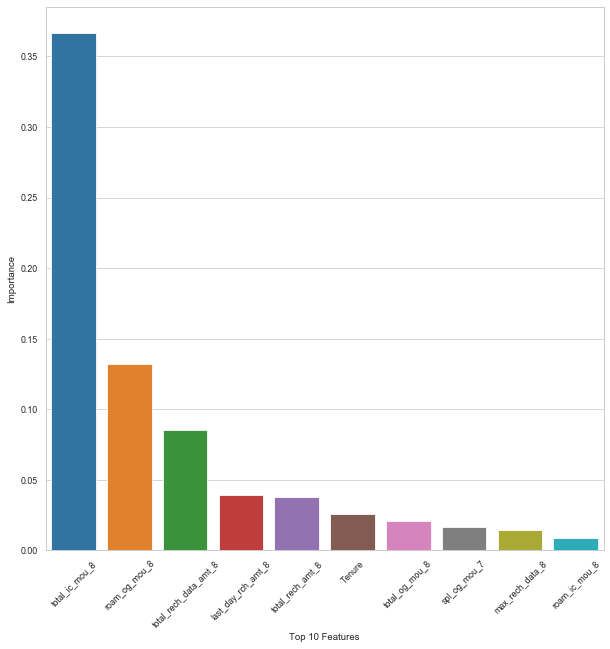

In [244]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=45)
plt.show()

### Conclusion

<div class="alert alert-block alert-info">
    
Based on our Decision Tree (Hyperparameter Tuning) model, some features are identified which contribute most to a customer getting churned.
  
1)  total_ic_mou_8:	0.37<br>
2)	roam_og_mou_8:	0.13<br>
3)	total_rech_data_amt_8:	0.09<br>
4)	last_day_rch_amt_8:	0.04<br>
5)	total_rech_amt_8:	0.04<br>
6)  Tenure:	0.03<br>
7)	total_og_mou_8:	0.02<br>
8)	spl_og_mou_7:	0.02<br>
9)   max_rech_data_8:	0.01<br>
10)  roam_ic_mou_8:	0.01 <br> 

### Conclusions from Decision Tree (Hyperparameter Tuning) :- 
Total incoming minute of use for Month 8, Roaming outgoing minute of use for Month 8, Total recharge data amount for Month 8, Last day of recharge amount for Month 8, Total recharge amount for Month 8, Tenure, Total outgoing minute of use for Month 8, Special outgoing minute of use for Month 7, Maximum recharge of data for Month 8, Roaming incoming minute of use for Month 8 are the most important predictor variables to predict churn.

<div class="alert alert-block alert-success">
    
###      Clasification Report for Train data
                
               precision    recall  f1-score   support

           0       0.96      0.93      0.94     17283
           1       0.93      0.96      0.94     17283


#### --------------------------------------------------------------------------------------------------------------
###     Clasification Report for Test data
                
               precision    recall  f1-score   support

           0       0.97      0.89      0.93      7407
           1       0.37      0.73      0.49       651              
    
#### Accuracy:  88.0%
#### F1 score:  49.5%
#### Recall:  72.8%
#### Precision:  37.4%
#### ROC for the test dataset: 84.8%

### Model 3.1) Using Random Forest (Default Hyperparameters)

In [245]:
# Lets import Random Forest libraries
from sklearn.ensemble import RandomForestClassifier

# Lets create a Random Forest with the default hyper parameters
rf_default = RandomForestClassifier(random_state=100, oob_score=True)

#### Fitting the Random Forest with default hyperparameters

In [246]:
# Lets fit the Random Forest with default hyperparameters
rf_default.fit(X_train, y_train)

RandomForestClassifier(oob_score=True, random_state=100)

In [247]:
rf_default.oob_score_

0.9661806399351964

In [248]:
y_train_pred_rf = rf_default.predict(X_train)
y_test_pred_rf = rf_default.predict(X_test)

In [249]:
print(classification_report(y_train, y_train_pred_rf))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17283
           1       1.00      1.00      1.00     17283

    accuracy                           1.00     34566
   macro avg       1.00      1.00      1.00     34566
weighted avg       1.00      1.00      1.00     34566



#### Making predictions on the test set

Accuracy:  93.1%
F1 score:  60.5%
Recall:  65.3%
Precision:  56.4%
ROC for the test dataset: 92.3%

 Clasification Report:
               precision    recall  f1-score   support

           0       0.97      0.96      0.96      7407
           1       0.56      0.65      0.61       651

    accuracy                           0.93      8058
   macro avg       0.77      0.80      0.78      8058
weighted avg       0.94      0.93      0.93      8058



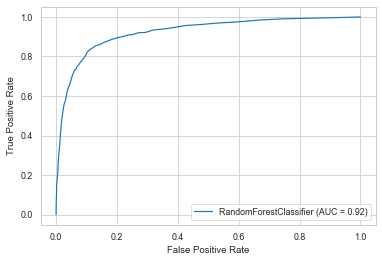


 Confussion Matrix:
 [[7079  328]
 [ 226  425]]


In [250]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf)))
pred_probs_test = rf_default.predict_proba(X_test)
print("ROC for the test dataset:","{:.1%}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1])))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_rf))
plot_roc_curve(rf_default, X_test, y_test, drop_intermediate=False)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.92, our model seems to be doing good on the test dataset.

In [251]:
confusion_rf = metrics.confusion_matrix( y_test, y_test_pred_rf)

TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  65.3%
Specificity:  95.6%
False postive rate: 4.4%
Positive predictive value: 56.4%
Negative predictive value: 96.9%


### Conclusion:- From Random Forest (Default Hyperparameters) 

<div class="alert alert-block alert-success">
    
###              Clasification Report for Test data
                     
                 precision    recall  f1-score   support

           0       0.97      0.96      0.96      7407
           1       0.56      0.65      0.61       651
    
#### Accuracy:  93.1%
#### F1 score:  60.5%
#### Recall:  65.3%
#### Precision:  56.4%
#### ROC for the test dataset: 92.3%

### Model 3.2) Hyper-parameter tuning for the Random Forest

In [252]:
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [253]:
params = {
    'max_depth': [10,20],
    'min_samples_leaf': [5,10],
    'n_estimators': [50,100],
    'min_samples_split': [5,10],
    'max_features': [10,20],
    'criterion': ["gini", "entropy"]
}

In [254]:
grid_search = GridSearchCV(estimator=rf,
                           param_grid=params,
                           cv = 4,
                           n_jobs=-1, verbose=1, scoring="recall")

In [255]:
%%time
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 64 candidates, totalling 256 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed: 14.3min
[Parallel(n_jobs=-1)]: Done 256 out of 256 | elapsed: 22.0min finished


Wall time: 22min 6s


GridSearchCV(cv=4, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20], 'max_features': [10, 20],
                         'min_samples_leaf': [5, 10],
                         'min_samples_split': [5, 10],
                         'n_estimators': [50, 100]},
             scoring='recall', verbose=1)

#### Grid_search.cv_results_ :- This function helps us to try out different combinations of hyperparameters which ultimately eased our process of figuring out these best values.

In [256]:
score_rf = pd.DataFrame(grid_search.cv_results_)
score_rf.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0          10.81          0.41             4.08            0.09   
1          19.14          0.14             4.03            0.15   
2          10.51          0.21             3.19            0.55   
3          19.12          0.23             1.58            0.22   
4          15.11          0.29             0.39            0.32   

  param_criterion param_max_depth param_max_features param_min_samples_leaf  \
0            gini              10                 10                      5   
1            gini              10                 10                      5   
2            gini              10                 10                      5   
3            gini              10                 10                      5   
4            gini              10                 10                     10   

  param_min_samples_split param_n_estimators  \
0                       5                 50   
1                       5                100   
2                      10                 50   
3                      10                100   
4                       5                 50   

                                              params  split0_test_score  \
0  {'criterion': 'gini', 'max_depth': 10, 'max_fe...               0.90   
1  {'criterion': 'gini', 'max_depth': 10, 'max_fe...               0.91   
2  {'criterion': 'gini', 'max_depth': 10, 'max_fe...               0.90   
3  {'criterion': 'gini', 'max_depth': 10, 'max_fe...               0.91   
4  {'criterion': 'gini', 'max_depth': 10, 'max_fe...               0.89   

   split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
0               0.95               0.94               0.94             0.94   
1               0.95               0.94               0.95             0.94   
2               0.95               0.94               0.94             0.94   
3               0.95               0.94               0.95             0.94   
4               0.94               0.94               0.94             0.93   

   std_test_score  rank_test_score  
0            0.02               49  
1            0.02               43  
2            0.02               49  
3            0.02               43  
4            0.02               63

In [257]:
grid_search.best_score_

0.9625650489212888

<div class="alert alert-block alert-info">
    
#### Grid_search.best_estimator_  :- When the grid search is called with various params, it chooses the one with the highest score based on the given scorer function. Best estimator gives the information of the params that resulted in the highest score or in simple term Estimator that was chosen by the search, i.e. estimator which gave highest score (or smallest loss if specified) on the left out data. 

#### Inference:- Since we have selected recall for our scoring, So Grid search best estimator will provide us the best estimator which will give us the information of the params that resulted in the highest `Recall` score.
    
#### We have selected recall for scoring as our buisness requirement is to identify almost all customers who are likely to churn. High recall means model will correctly identify almost all customers who are likely to churn.

In [258]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(criterion='entropy', max_depth=20, max_features=20,
                       min_samples_leaf=5, min_samples_split=5, n_estimators=50,
                       n_jobs=-1, random_state=42)

<div class="alert alert-block alert-info">

#### Inference:- Based on the Grid Search Hyperparameter tuning method, we identified the best parameters for the Random Forest from Grid search best estimator as - criterion='entropy', max_depth=20, min_samples_leaf=5, min_samples_split=5, n_estimators=50, max_features=20.

- From these parameters (criterion='entropy') helps us to determines how the impurity of a split is measured, (max_depth) helps us to limit the max number of levels in each decision tree to 20, (min_samples_leaf) helps us to find min number of data points allowed in a leaf node to 5, (min_samples_split) helps us to find minimum number of data points a node must contain in order to consider splitting i.e. to 5, (n_estimators) helps us to find number of trees in the forest to 50, (max_features) helps us to find number of features to consider when looking for the split to 20.

- By applying these parameters and tuning the model, we will able to improve the metrics that we received from the default parametes of Random Forest.

In [259]:
y_train_pred_rf_hp = rf_best.predict(X_train)
y_test_pred_rf_hp = rf_best.predict(X_test)

In [260]:
print(classification_report(y_train, rf_best.predict(X_train)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99     17283
           1       0.98      0.99      0.99     17283

    accuracy                           0.99     34566
   macro avg       0.99      0.99      0.99     34566
weighted avg       0.99      0.99      0.99     34566



#### Making predictions on the test set

Accuracy:  92.5%
F1 score:  60.6%
Recall:  71.1%
Precision:  52.9%
ROC for the test dataset: 92.9%

 Clasification Report:
               precision    recall  f1-score   support

           0       0.97      0.94      0.96      7407
           1       0.53      0.71      0.61       651

    accuracy                           0.93      8058
   macro avg       0.75      0.83      0.78      8058
weighted avg       0.94      0.93      0.93      8058



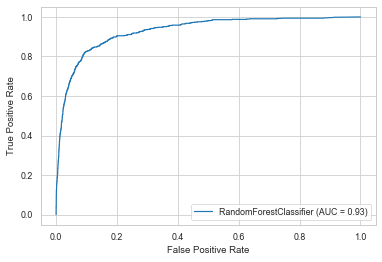


 Confussion Matrix:
 [[6994  413]
 [ 188  463]]


In [261]:
print ('Accuracy: ', '{:.1%}'.format(accuracy_score(y_test, y_test_pred_rf_hp)))
print ('F1 score: ', '{:.1%}'.format(f1_score(y_test, y_test_pred_rf_hp)))
print ('Recall: ', '{:.1%}'.format(recall_score(y_test, y_test_pred_rf_hp)))
print ('Precision: ', '{:.1%}'.format(precision_score(y_test, y_test_pred_rf_hp)))
pred_probs_test = rf_best.predict_proba(X_test)
print("ROC for the test dataset:","{:.1%}".format(metrics.roc_auc_score(y_test, pred_probs_test[:,1])))
print ('\n Clasification Report:\n', classification_report(y_test, y_test_pred_rf_hp))
plot_roc_curve(rf_best, X_test, y_test, drop_intermediate=False)
plt.show()
print ('\n Confussion Matrix:\n',confusion_matrix(y_test, y_test_pred_rf_hp))

<div class="alert alert-block alert-info">

As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

#### Inference:- Since we got a value of 0.93, our model seems to be doing excellent on the test dataset.

In [262]:
confusion_rf_hp = metrics.confusion_matrix( y_test, y_test_pred_rf_hp)

TN = confusion_rf_hp[0,0] # true positive 
TP = confusion_rf_hp[1,1] # true negatives
FP = confusion_rf_hp[0,1] # false positives
FN = confusion_rf_hp[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print("Sensitivity: " ,'{:.1%}'.format(TP / float(TP+FN)))

# Let us calculate specificity
print("Specificity: " ,'{:.1%}'.format(TN / float(TN+FP)))

# Calculate false postive rate - predicting churn when customer does not have churned
print("False postive rate:" ,'{:.1%}'.format(FP/ float(TN+FP)))

# positive predictive value 
print("Positive predictive value:" ,'{:.1%}'.format(TP / float(TP+FP)))

# Negative predictive value
print("Negative predictive value:" ,'{:.1%}'.format(TN / float(TN+ FN)))

Sensitivity:  71.1%
Specificity:  94.4%
False postive rate: 5.6%
Positive predictive value: 52.9%
Negative predictive value: 97.4%


In [263]:
rf_best.feature_importances_

array([0.004492  , 0.00593639, 0.03238022, 0.00344624, 0.00450666,
       0.0040205 , 0.00380126, 0.00379568, 0.01116782, 0.00195218,
       0.00436029, 0.05547983, 0.00251022, 0.00582167, 0.05649468,
       0.0033246 , 0.00396975, 0.01152757, 0.00428607, 0.00418875,
       0.01633089, 0.00217138, 0.00399945, 0.00215532, 0.00160452,
       0.00224974, 0.00212503, 0.00384139, 0.00516909, 0.01415458,
       0.0045029 , 0.00465656, 0.0029278 , 0.00275624, 0.00355803,
       0.00281924, 0.0013302 , 0.0009281 , 0.00051872, 0.0037138 ,
       0.00614127, 0.00695585, 0.00069635, 0.00110465, 0.00133239,
       0.00532179, 0.01149928, 0.00480193, 0.00405192, 0.        ,
       0.00345145, 0.00524105, 0.01863407, 0.00497605, 0.0053152 ,
       0.02555059, 0.00417505, 0.00456888, 0.04485461, 0.00396412,
       0.00351004, 0.00400565, 0.00439635, 0.00588402, 0.07037518,
       0.00410035, 0.00341881, 0.00223486, 0.00356816, 0.00397141,
       0.00389655, 0.00156057, 0.00140031, 0.00137551, 0.00307

In [264]:
imp_df = pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_best.feature_importances_
})

In [265]:
imp_feat= imp_df.sort_values(by="Imp", ascending=False)
imp_feat.head(10)

Varname  Imp
79          total_ic_mou_8 0.08
64            loc_ic_mou_8 0.07
14           roam_og_mou_8 0.06
11           roam_ic_mou_8 0.06
58        loc_ic_t2m_mou_8 0.04
94        total_rech_amt_8 0.04
97          max_rech_amt_8 0.04
100     last_day_rch_amt_8 0.03
2                   arpu_8 0.03
127  total_rech_data_amt_8 0.03

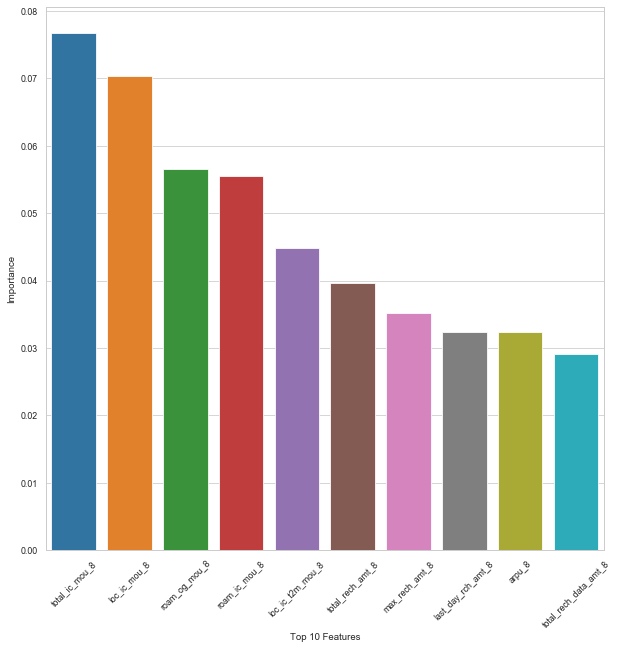

In [266]:
plt.figure(figsize=(10, 10))
ax = sns.barplot(x='Varname', y= 'Imp', data=imp_feat[0:10])
ax.set(xlabel = 'Top 10 Features', ylabel = 'Importance')
plt.xticks(rotation=45)
plt.show()

### Conclusion

<div class="alert alert-block alert-info">
    
Based on our Random Forest (Hyperparameters Tuning) model, some features are identified which contribute most to a customer getting churned.
   
1)  total_ic_mou_8:	0.08<br>
2)	loc_ic_mou_8:	0.07<br>
3)	roam_og_mou_8:	0.06<br>
4)	roam_ic_mou_8:	0.06<br>
5)	loc_ic_t2m_mou_8:	0.04<br>
6)	total_rech_amt_8:	0.04<br>
7)	max_rech_amt_8:	0.04<br>
8)	last_day_rch_amt_8:	0.03<br>
9)	arpu_8:	0.03<br>
10)	total_rech_data_amt_8:	0.03<br>

### Conclusions from Random Forest (Hyperparameters Tuning) :- 
Total incoming minute of usage for Month 8, Local incoming minute of use for Month 8, Roaming outgoing minute of usage for Month 8, Roaming incoming minute of use for Month 8, Local incoming t2m minute of usage for Month 8, Total recharge amount for Month 8, Maximum recharge amount for Month 8, Last day recharge amount for Month 8, Average revenue per usage for Month 8, Total recharge data amount for Month 8 are the most important predictor variables to predict churn.

<div class="alert alert-block alert-success">
    
###  Clasification Report for Train data
                
                precision    recall  f1-score   support

           0       0.99      0.98      0.99     17283
           1       0.98      0.99      0.99     17283   
    
#### --------------------------------------------------------------------------------------------------------------
###   Clasification Report for Test data
                                  
                precision    recall  f1-score   support

           0       0.97      0.94      0.96      7407
           1       0.53      0.71      0.61       651
#### Accuracy: 92.6%
#### F1 score: 60.6%
#### Recall: 71.1%
#### Precision: 52.9%
#### ROC for the test dataset: 92.89
    

<div class="alert alert-block alert-info">

### Compilation of models For Test data

## Logistic Regression Model                             
                                                        
####   Classification Report                                         
                     
             precision  recall  f1-score   support

       0       0.98      0.71      0.82      7407
       1       0.20      0.85      0.33       651 
#### Accuracy: 71.9%¶
#### ROC: 87.0%

### ----------------------------------------------------------------------------------------------

## Decision Tree (Default Hyperparameters) Model

#### Clasification Report 
             precision  recall  f1-score   support

       0       0.96      0.91      0.94      7407
       1       0.37      0.61      0.46       651
#### Accuracy: 88.6%¶
#### ROC: 76.0%

### ----------------------------------------------------------------------------------------------

## Decision Tree (Hyperparameter Tuning) Model

#### Clasification Report 
             precision   recall  f1-score   support

        0       0.97      0.89      0.93      7407
        1       0.37      0.73      0.49       651  
#### Accuracy: 88.0%¶
#### ROC: 84.8%

### ----------------------------------------------------------------------------------------------

## Random Forest (Default Hyperparameters) Model

#### Clasification Report 
             precision  recall  f1-score   support

       0       0.97      0.96      0.96      7407
       1       0.56      0.65      0.61       651 
#### Accuracy: 93.1%¶
#### ROC: 92.3%

### ----------------------------------------------------------------------------------------------

## Random Forest (Hyperparameters Tuning) Model

#### Clasification Report 
             precision    recall  f1-score   support

           0       0.97      0.94      0.96      7407
           1       0.53      0.71      0.61       651        
#### Accuracy: 92.5%
#### ROC: 92.9%

<div class="alert alert-block alert-success">
    
### From the above Compilation of models, it is clear that Logistic Regression is the best model from 3 models i.e
    
 Model 1:Logistic Regression <br>
 Model 2.1: Decision Tree  (Default Hyperparameters)<br>
 Model 2.2: Decision Tree  (Hyperparameter Tuning)<br>
 Model 3.1: Random Forest (Default Hyperparameters)<br>
 Model 3.2: Random Forest (Hyperparameters Tuning)<br>
 
    
### Model Consideration:-
    
- Based on the accuracy, ROC and recall of different models, we will consider Logistic Regression as our final model.
- The test accuracy is 72%, recall is 85% and ROC is 87% .
- The recall for churn is 0.85, which is highest among all other models. <b>Since our buisness objective is more important to identify churners than the non-churners accurately. High recall means model will correctly identify almost all customers who are likely to churn.</b>
- Hence Logistic Regression model is chosen based on its performance on `Recall metric`. 

### Step 7: Final Conclusion on basis of Logistic Regression 

In [267]:
# lets find the most important predictor variables on basis of their coefficient to predict churn.

feature_importance = new_params
Final_imp_feat= pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False)
Final_imp_feat.rename(columns = {'index':'Imp_feature', 0:'Imp'}, inplace = True)
Final_imp_feat

Imp_feature   Imp
0               arpu_7  0.48
2     std_og_t2m_mou_8 -0.18
1          onnet_mou_8 -0.20
5         loc_ic_mou_7 -0.52
3     std_og_t2f_mou_8 -0.67
11         sachet_2g_8 -0.72
10        monthly_2g_8 -0.72
7         spl_ic_mou_8 -0.77
12          aug_vbc_3g -0.79
6         std_ic_mou_8 -0.82
9   last_day_rch_amt_8 -0.87
8     total_rech_num_8 -0.93
4     loc_ic_t2f_mou_8 -1.22

<div class="alert alert-block alert-success">
    
<b> Inference:  We could see the Top 13 features which contribute most towards the probability of a customer getting churned.</b>
    
</div>

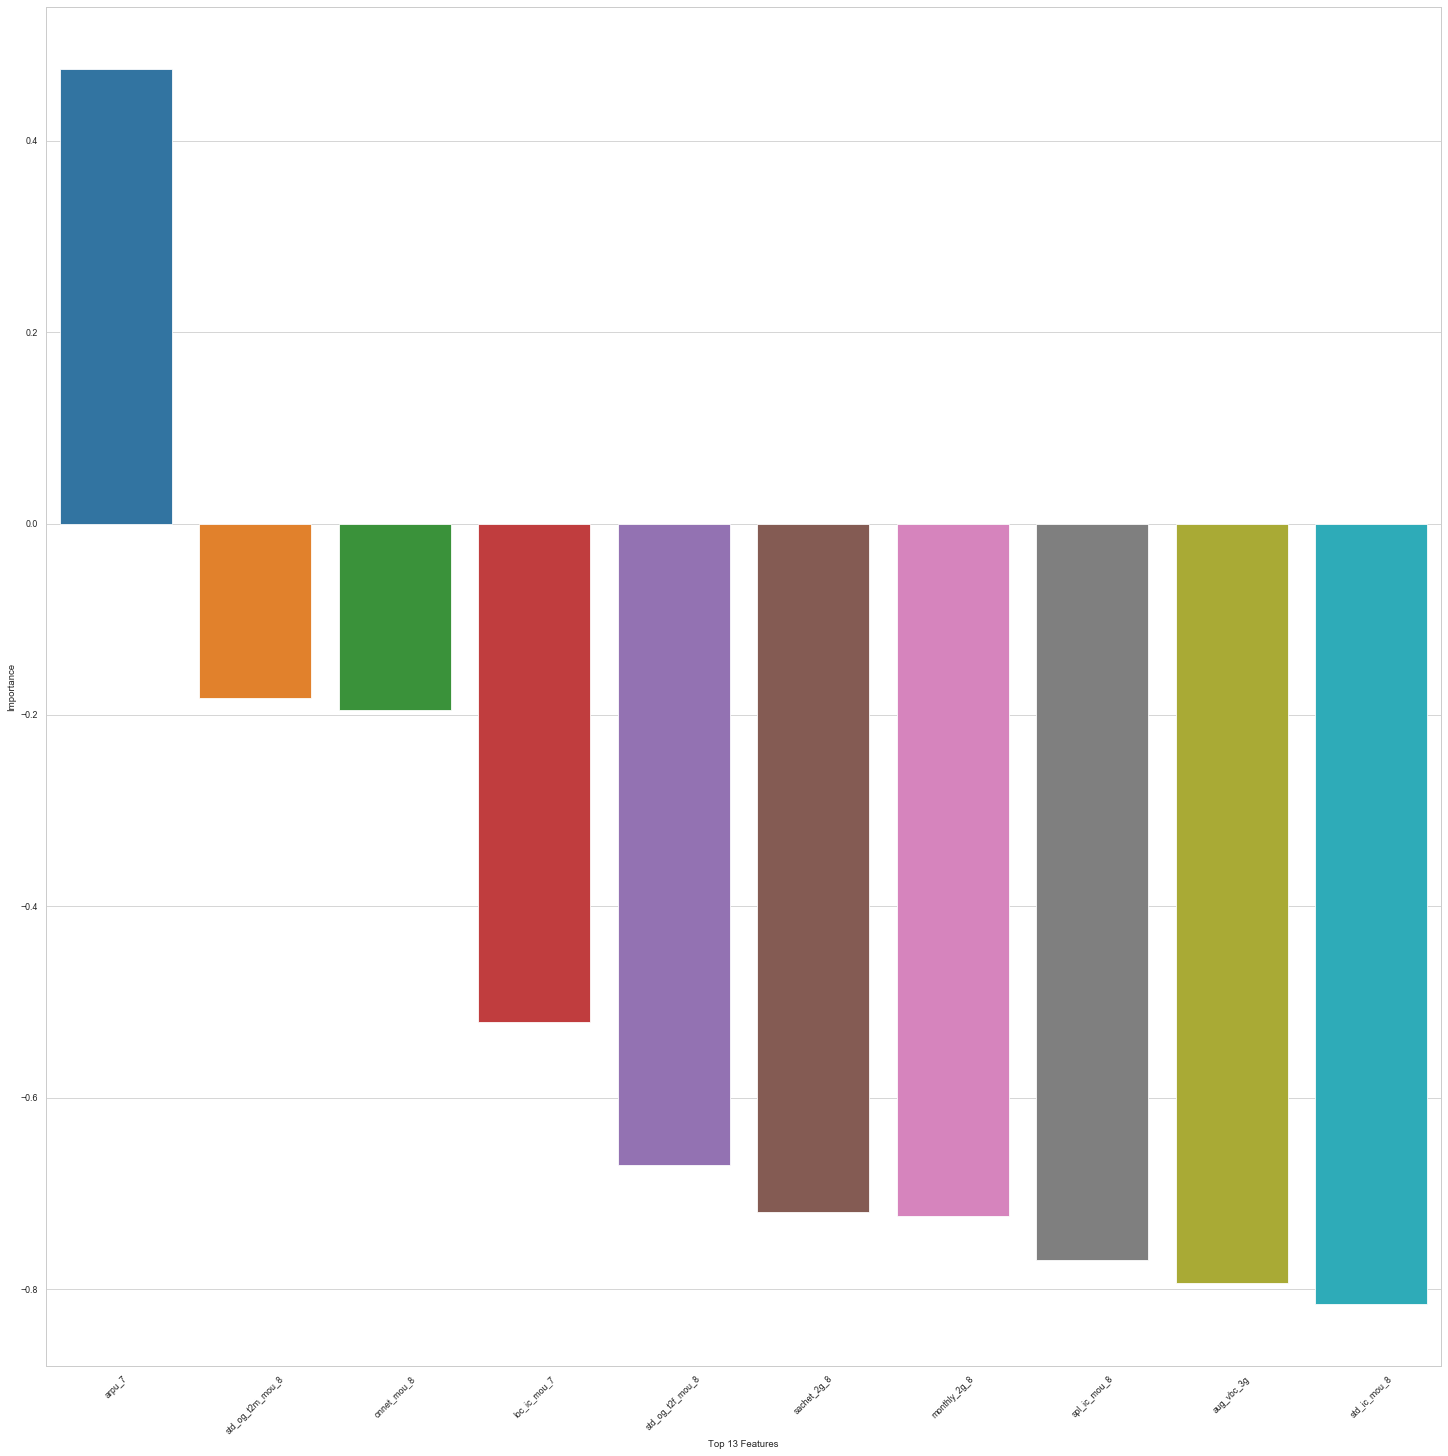

In [271]:
# Plot to show the most important predictor variables with their coefficient to predict churn.

plt.figure(figsize=(25, 25))
ax = sns.barplot(x='Imp_feature', y= 'Imp', data=Final_imp_feat[0:10])
ax.set(xlabel = 'Top 13 Features', ylabel = 'Importance')
plt.xticks(rotation=45)
plt.show()

### Lets observe the behaviour of churn customers with the help of the above mentioned variables which contribute most towards the probability of a customer getting churned.

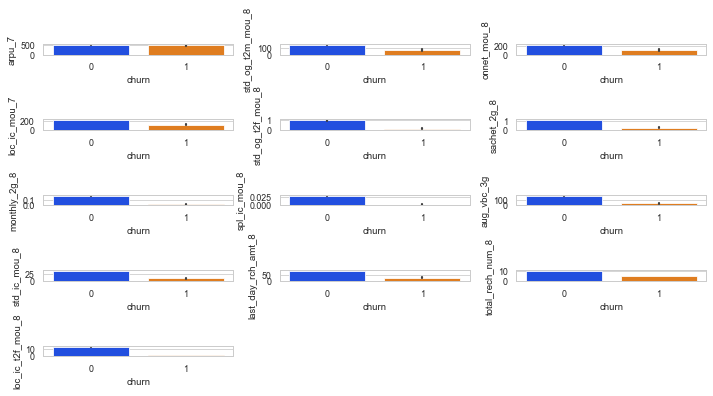

In [272]:
# Lets observe the behaviour of churn customers with the help of important variables which contribute most 
# towards the probability of a customer getting churned.

fig= plt.figure(figsize=(10, 5))
plt.subplot(5, 3, 1)
sns.barplot(x='churn', y='arpu_7', data=telecom_hv_cust, palette=("bright"))
plt.subplot(5, 3, 2)
sns.barplot(x='churn', y='std_og_t2m_mou_8', data=telecom_hv_cust, palette=("bright"))
plt.subplot(5, 3, 3)
sns.barplot(x='churn', y='onnet_mou_8', data=telecom_hv_cust, palette=("bright"))
fig.tight_layout()
plt.subplot(5, 3, 4)
sns.barplot(x='churn', y='loc_ic_mou_7', data=telecom_hv_cust, palette=("bright"))
plt.subplot(5, 3, 5)
sns.barplot(x='churn', y='std_og_t2f_mou_8', data=telecom_hv_cust, palette=("bright"))
plt.subplot(5, 3, 6)
sns.barplot(x='churn', y='sachet_2g_8', data=telecom_hv_cust, palette=("bright"))
fig.tight_layout()
plt.subplot(5, 3, 7)
sns.barplot(x='churn', y='monthly_2g_8', data=telecom_hv_cust, palette=("bright"))
plt.subplot(5, 3, 8)
sns.barplot(x='churn', y='spl_ic_mou_8', data=telecom_hv_cust, palette=("bright"))
plt.subplot(5, 3, 9)
sns.barplot(x='churn', y='aug_vbc_3g', data=telecom_hv_cust, palette=("bright"))
fig.tight_layout()
plt.subplot(5, 3, 10)
sns.barplot(x='churn', y='std_ic_mou_8', data=telecom_hv_cust, palette=("bright"))
plt.subplot(5, 3, 11)
sns.barplot(x='churn', y='last_day_rch_amt_8', data=telecom_hv_cust, palette=("bright"))
plt.subplot(5, 3, 12)
sns.barplot(x='churn', y='total_rech_num_8', data=telecom_hv_cust, palette=("bright"))
fig.tight_layout()
plt.subplot(5, 3, 13)
sns.barplot(x='churn', y='loc_ic_t2f_mou_8', data=telecom_hv_cust, palette=("bright"))
plt.show()

<div class="alert alert-block alert-success">
    
Based on our logical regression model, some features are identified which contribute most to a customer getting churned.

The churn probability of a customer increases with increase in values of the following features in descending order:<br>

#### Features with Positive Coefficient:
    
1) arpu_7:	0.48<br>
    
    
The churn probability of a customer increases with decrease in values of the following features in descending order:<br>

#### Features with Negative Coefficient:<br>	

1)	std_og_t2m_mou_8:	-0.18<br>
2)	onnet_mou_8:	-0.20<br>
3)	loc_ic_mou_7:	-0.52<br>
4)	std_og_t2f_mou_8:	-0.67<br>
5)	sachet_2g_8:	-0.72<br>
6)	monthly_2g_8:	-0.72<br>
7)	spl_ic_mou_8:	-0.77<br>
8)	aug_vbc_3g:	-0.79<br>
9)	std_ic_mou_8:	-0.82<br>
10)	last_day_rch_amt_8:	-0.87<br>
11)	total_rech_num_8:	-0.93<br>
12)	loc_ic_t2f_mou_8:	-1.22<br>

### Conclusions from Logistic Regression:- 
Std outgoing minute of usage for Month 8, Onnet minute of usage for Month 8, Local incoming minute of usage for Month 7, sachet 2g usage for Month 8, Monthly 2g usage for Month 8, Special incoming minute of usage for Month 8, 3g Volume base cost for Month 8, Std incoming minute of usage for Month 8, Last day recharge amount for Month 8, Total recharge number for Month 8, Local incoming minute of usage for Month 8 are the most important predictor variables to predict churn.

<div class="alert alert-block alert-info">

### Step 8: Business Insights and Recommendation of strategies to manage churn customer based on our observations.

    1. Lesser the STD outgoing minute of usage to other operators mobile higher is the probability of getting churn. So Telecom company needs to provide offers to the customers, whose STD outgoing to other operators mobile had decreased.Offers such as STD-like-plan which will help them to opt when they required. Telecom company can also provide "STD free minutes" which customer can opt as per his / her requirements of STD calling.  
    
    2. Telecom company needs to pay attention to the onnet minutes of usage, lesser the onnet minutes of usage higher is the probability of getting churn. Telecom company should provide some plans like "Unlimited Calls" within same operator. 
    
    3. Telecom company should focus on local incoming calls. Lesser the local incoming minutes of usage higher is the probability of getting churn. In an ideal situation, lesser local incoming minutes might be due to poor network or call drop issue which can be improvised by adding more towers or working on connectivity issue.
    
    4. Telecom company needs to provide offers to them whose STD outgoing to operator's fixed line had decreased. Lesser the STD outgoing minute of usage to fixed line higher is the probability of getting churn. Offers like "Fixed STD--plan which can be opt by those customer whose major call attempts are done to Fixed line operator. And also "Fixed STD Minutes" which can be opt as per requirements which may not be monthly can be alternatively. 
    
    5. Telecom company should focus on 2g Sachet. Lesser the use of sachet for 2g higher is the probability of getting churn. We can introduce plans like "One Time Trial Pack" which can be used by consumer as per their daily net usage, plans like charge for 2 week and get 1 day some mb of 2g for free.
    
    6. Telecom company should focus on 2g monthly. Lesser the use of 2g over monthly basis higher is the probability of getting churn. We can introduced plans like  "Pay for 30 & Use for 35 days". " Pay for 30 & Get CAshback of certain amount". We can tie up with service providers like Paytm / Phone pe etc.
    
    7. Telecom company should focus on Volume base cost for 3g. Lesser the use of 3g volume higher is the probability of getting churn. Telecom company should conduct a survey of such customer data which will help us to understand the details about the same. Accordingly we need to form a "Exclusive Well Trained Service Team" who will help to communicate about the best plan and offer customised plans as per thier requirements. 
    
    8. Telecom company should focus on Special incoming minute of usage. Lesser the use of Special incoming call higher is the probability of getting churn. Telecom company can offer them free calling to specific numbers may be 2, 4, 6 special numbers for them which will definately increase the usage as there wont be any restrictions for calling. This can be done depending on customers credibilty. 
    
    8. Lower the last day recharge amount higher the churn rate. Focus on customers whose last day recharge amount has decreased. This customers can be retained by providing them "Special Auto -Recharge Plan" which can be as per their last recharge amount. Telecom company can also offer "Data Plan" this will help customer to stay connected with help of internet. Both plans will completely  depend on the basis of customer usage.
    
    9. Lower the recharge number means higher the chance for getting churn, We should provide attractive offers like "Recharge for a month get additonal 5 days". Telecom company should engrossed our customer by offering them special plans for data usage and doing this completely based on customer past usage.  
    
    10. Customers with tenure less than 3 yrs are more likely to churn, Telecom company should provide below important services like :-
    1) Attractive offers.
    2) Enhance Customer Service
    3) Develop a Frequent Interaction / Communication calendar with Customer.
    4) Good Network Service.
    5) Build Trust through Relationships.
    6) Use Automation Service to re-engage customers.
    7) Leverage customer feedback survey on timely basis.
    8) Measure customer lifetime value.
    9) Train your customer with help of digital source of communication.
    10) Treat Costumer as your "KING:.